### ------------------------------------------------------
#### CASE STUDY 4: 
### ------------------------------------------------------







### An Exercise on real-reworld medical data using Logistic Regression and Imputation techniques. 
### The Medical data was collected over 10 years with over 130 hospitals contributing. 
### The goal is to understand the top 5 most important features and predict readmittance while dealing with ethical considerations and missing data. 

### Imports

In [2]:
# Start Here.
import pandas as pd  

In [4]:
# R-File data 
# site to look at columns and their description 
# https://www.sciencedirect.com/science/article/pii/S0957417416301592
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_det.html#sphx-glr-auto-example-model-selection-plot-det-py

# the data starts after the first 69 rows. Hence we skip the first 69 rows when loading the data with pandas. 
# file_names  = [
#     # 'Data_Science/Case_Study4/data/1year.arff',
#     # 'Data_Science/Case_Study4/data/2year.arff',
#     # 'Data_Science/Case_Study4/data/3year.arff',
#     # 'Data_Science/Case_Study4/data/4year.arff',
#     # 'Data_Science/Case_Study4/data/5year.arff'
#     '1year.arff',
#     '2year.arff',
#     '3year.arff',
#     '4year.arff',
#     '5year.arff'
# ]

# dataframes = []
# data = pd.read_csv()
# file_path = '/Users/tmc/Desktop/MS_SMU_Admin/05_2024Summer/QTW/Data_Science/Case_Study4/data'

# for filename in filnames:
#     data = pd.read_csv(file_path + filename, skiprows=69)
#     dataframes.append(data) 

file_names  = [
    '1year.arff',
    '2year.arff',
    '3year.arff',
    '4year.arff',
    '5year.arff'
]

dataframes = []
file_path = '/Users/tmc/Desktop/MS_SMU_Admin/05_2024Summer/QTW/Data_Science/Case_Study4/data/'

for filename in file_names:
    data = pd.read_csv(file_path + filename, skiprows=69, header=None)
    dataframes.append(data)


/var/folders/b9/m6ntk1l94mj0xc_5wxrc4dc40000gn/T/ipykernel_25905/893652289.py:40: DtypeWarning: Columns (0,1,2,5,6,8,9,10,13,17,21,23,24,28,34,35,37,47,50,54,56,58) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path + filename, skiprows=69, header=None)
/var/folders/b9/m6ntk1l94mj0xc_5wxrc4dc40000gn/T/ipykernel_25905/893652289.py:40: DtypeWarning: Columns (14,23) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path + filename, skiprows=69, header=None)
/var/folders/b9/m6ntk1l94mj0xc_5wxrc4dc40000gn/T/ipykernel_25905/893652289.py:40: DtypeWarning: Columns (0,1,2,5,6,7,9,10,13,14,15,16,17,21,23,24,25,28,33,34,35,37,47,49,50,56,58) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path + filename, skiprows=69, header=None)


Data 

In [5]:
dataframes[0].head()
# concatenate all the dataframes into one dataframe
all_data = pd.concat(dataframes)
all_data.head()

0        1        2       3        4        5         6        7   \
0   0.20055  0.37951  0.39641  2.0472   32.351  0.38825   0.24976   1.3305   
1   0.20912  0.49988  0.47225  1.9447   14.786        0   0.25834  0.99601   
2   0.24866  0.69592  0.26713  1.5548  -1.1523        0   0.30906  0.43695   
3  0.081483  0.30734  0.45879  2.4928   51.952  0.14988  0.092704   1.8661   
4   0.18732  0.61323   0.2296  1.4063  -7.3128  0.18732   0.18732   0.6307   

       8        9   ...        55       56       57        58      59      60  \
0  1.1389  0.50494  ...   0.12196  0.39718  0.87804  0.001924   8.416  5.1372   
1  1.6996  0.49788  ...    0.1213  0.42002    0.853         0  4.1486  3.2732   
2   1.309  0.30408  ...   0.24114  0.81774  0.76599   0.69484  4.9909   3.951   
3  1.0571  0.57353  ...  0.054015  0.14207  0.94598         0  4.5746  3.6147   
4  1.1559  0.38677  ...   0.13485  0.48431  0.86515   0.12444  6.3985  4.3158   

       61      62      63 64  
0  82.658  4.4158  7.4277  0  
1  107.35     3.4  60.987  0  
2  134.27  2.7185  5.2078  0  
3  86.435  4.2228  5.5497  0  
4  127.21  2.8692   7.898  0  

[5 rows x 65 columns]

In [6]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43405 entries, 0 to 5909
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       43405 non-null  object
 1   1       43405 non-null  object
 2   2       43405 non-null  object
 3   3       43405 non-null  object
 4   4       43405 non-null  object
 5   5       43405 non-null  object
 6   6       43405 non-null  object
 7   7       43405 non-null  object
 8   8       43405 non-null  object
 9   9       43405 non-null  object
 10  10      43405 non-null  object
 11  11      43405 non-null  object
 12  12      43405 non-null  object
 13  13      43405 non-null  object
 14  14      43405 non-null  object
 15  15      43405 non-null  object
 16  16      43405 non-null  object
 17  17      43405 non-null  object
 18  18      43405 non-null  object
 19  19      43405 non-null  object
 20  20      43405 non-null  object
 21  21      43405 non-null  object
 22  22      43405 non-null  obje

In [7]:
all_data.dtypes

0     object
1     object
2     object
3     object
4     object
       ...  
60    object
61    object
62    object
63    object
64     int64
Length: 65, dtype: object

In [8]:
all_data.shape

(43405, 65)

In [9]:
# EDA 
# Transform objects to objects to numeric datatypes
# Select columns of type 'object'
object_columns = all_data.select_dtypes(include=['object']).columns

# Convert selected columns to numeric
all_data[object_columns] = all_data[object_columns].apply(pd.to_numeric, errors='coerce')




In [10]:
all_data.describe()

0             1             2             3             4   \
count  43397.000000  43397.000000  43397.000000  43271.000000  4.331600e+04   
mean       0.035160      0.590212      0.114431      6.314702 -3.853466e+02   
std        2.994109      5.842748      5.439429    295.434425  6.124303e+04   
min     -463.890000   -430.870000   -479.960000     -0.403110 -1.190300e+07   
25%        0.003429      0.268980      0.021521      1.049500 -4.908000e+01   
50%        0.049660      0.471900      0.196610      1.569800 -1.034500e+00   
75%        0.129580      0.688320      0.403390      2.787450  5.063425e+01   
max       94.280000    480.960000     28.336000  53433.000000  1.250100e+06   

                 5             6             7             8             9   \
count  43397.000000  43397.000000  43311.000000  43396.000000  43397.000000   
mean      -0.056107      0.093478     12.640779      2.652166      0.626868   
std        7.201326      5.713075    505.894281     62.932732     14.670597   
min     -508.410000   -517.480000   -141.410000     -3.496000   -479.910000   
25%        0.000000      0.005776      0.430275      1.018500      0.295470   
50%        0.000000      0.059634      1.070400      1.195350      0.505970   
75%        0.089446      0.150880      2.615700      2.062500      0.709100   
max      543.250000    649.230000  53432.000000   9742.300000   1099.500000   

       ...            55            56            57            58  \
count  ...  4.327800e+04  43398.000000  4.332100e+04  43398.000000   
mean   ... -2.621959e+01     -0.010510  3.002644e+01      1.333288   
std    ...  5.327862e+03     13.674072  5.334454e+03    122.104445   
min    ... -1.108300e+06  -1667.300000 -1.986900e+02   -327.970000   
25%    ...  9.348500e-03      0.014649  8.753200e-01      0.000000   
50%    ...  5.294300e-02      0.119670  9.509600e-01      0.006366   
75%    ...  1.290975e-01      0.284605  9.926400e-01      0.236052   
max    ...  2.931500e+02    552.640000  1.108300e+06  23853.000000   

                 59             60            61            62             63  \
count  4.125300e+04   43303.000000  4.327800e+04  43271.000000   42593.000000   
mean   4.480858e+02      17.033202  1.502328e+03      9.343074      72.788592   
std    3.234560e+04     553.049406  1.392667e+05    124.177354    2369.339482   
min   -1.244000e+01     -12.656000 -2.336500e+06     -1.543200  -10677.000000   
25%    5.545500e+00       4.510150  4.214400e+01      3.097650       2.176800   
50%    9.791700e+00       6.636300  7.132600e+01      5.087600       4.282500   
75%    2.018100e+01      10.394500  1.172200e+02      8.598850       9.776200   
max    4.818700e+06  108000.000000  2.501600e+07  23454.000000  294770.000000   

                 64  
count  43405.000000  
mean       0.048174  
std        0.214137  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000  

[8 rows x 65 columns]

In [11]:
# Seperating original data from data we will impute and use for modeling 
# rename all_data to original data 
data = all_data.copy()
data.head()

0        1        2       3        4        5         6        7   \
0  0.200550  0.37951  0.39641  2.0472  32.3510  0.38825  0.249760  1.33050   
1  0.209120  0.49988  0.47225  1.9447  14.7860  0.00000  0.258340  0.99601   
2  0.248660  0.69592  0.26713  1.5548  -1.1523  0.00000  0.309060  0.43695   
3  0.081483  0.30734  0.45879  2.4928  51.9520  0.14988  0.092704  1.86610   
4  0.187320  0.61323  0.22960  1.4063  -7.3128  0.18732  0.187320  0.63070   

       8        9   ...        55       56       57        58      59      60  \
0  1.1389  0.50494  ...  0.121960  0.39718  0.87804  0.001924  8.4160  5.1372   
1  1.6996  0.49788  ...  0.121300  0.42002  0.85300  0.000000  4.1486  3.2732   
2  1.3090  0.30408  ...  0.241140  0.81774  0.76599  0.694840  4.9909  3.9510   
3  1.0571  0.57353  ...  0.054015  0.14207  0.94598  0.000000  4.5746  3.6147   
4  1.1559  0.38677  ...  0.134850  0.48431  0.86515  0.124440  6.3985  4.3158   

        61      62       63  64  
0   82.658  4.4158   7.4277   0  
1  107.350  3.4000  60.9870   0  
2  134.270  2.7185   5.2078   0  
3   86.435  4.2228   5.5497   0  
4  127.210  2.8692   7.8980   0  

[5 rows x 65 columns]

In [12]:
# There are missing values in the dataset, we are going to have to impute and justify how we imputed the missing values
pd.set_option('display.max_rows', None)

if any(data.isnull().sum()):
    print('There are missing values in the data')   
else:
    print('There are no missing values in the data')
data.isnull().sum()  



There are missing values in the data


0         8
1         8
2         8
3       134
4        89
5         8
6         8
7        94
8         9
9         8
10       44
11      134
12      127
13        8
14       36
15       95
16       94
17        8
18      128
19      127
20     5854
21        8
22      127
23      922
24        8
25       95
26     2764
27      812
28        8
29      127
30      127
31      368
32      134
33       94
34        8
35        8
36    18984
37        8
38      127
39      134
40      754
41      127
42      127
43      127
44     2147
45      135
46      297
47        9
48      127
49       94
50        8
51      301
52      812
53      812
54        1
55      127
56        7
57       84
58        7
59     2152
60      102
61      127
62      134
63      812
64        0
dtype: int64

In [13]:
#make copy of data frame to new variable all_data

# Get all columns with missing values
columns_with_missing = data.columns[data.isnull().any()].tolist()
# columns_with_missing

for column in columns_with_missing: 
    mean_value_feature = data[column].mean()
    data[column].fillna(mean_value_feature, inplace=True)
    # Check if imputation was successful
    if data[column].isnull().sum() == 0:
        print(f"Imputed {column} with mean value {mean_value_feature:.2f}")  # Format the mean to 2 decimal places for better readability
    else:
        print(f"Warning: {column} still has {all_data[column].isnull().sum()} missing values after imputation")


Imputed 0 with mean value 0.04
Imputed 1 with mean value 0.59
Imputed 2 with mean value 0.11
Imputed 3 with mean value 6.31
Imputed 4 with mean value -385.35
Imputed 5 with mean value -0.06
Imputed 6 with mean value 0.09
Imputed 7 with mean value 12.64
Imputed 8 with mean value 2.65
Imputed 9 with mean value 0.63
Imputed 10 with mean value 0.13
Imputed 11 with mean value 1.13
Imputed 12 with mean value 0.81
Imputed 13 with mean value 0.09
Imputed 14 with mean value 1991.89
Imputed 15 with mean value 1.41
Imputed 16 with mean value 13.80
Imputed 17 with mean value 0.10
Imputed 18 with mean value 0.16
Imputed 19 with mean value 243.02
Imputed 20 with mean value 3.88
Imputed 21 with mean value 0.11
Imputed 22 with mean value 0.14
Imputed 23 with mean value 0.27
Imputed 24 with mean value 0.39
Imputed 25 with mean value 1.26
Imputed 26 with mean value 1107.90
Imputed 27 with mean value 6.00
Imputed 28 with mean value 4.01
Imputed 29 with mean value 7.37
Imputed 30 with mean value 0.18
Impu

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43405 entries, 0 to 5909
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       43405 non-null  float64
 1   1       43405 non-null  float64
 2   2       43405 non-null  float64
 3   3       43405 non-null  float64
 4   4       43405 non-null  float64
 5   5       43405 non-null  float64
 6   6       43405 non-null  float64
 7   7       43405 non-null  float64
 8   8       43405 non-null  float64
 9   9       43405 non-null  float64
 10  10      43405 non-null  float64
 11  11      43405 non-null  float64
 12  12      43405 non-null  float64
 13  13      43405 non-null  float64
 14  14      43405 non-null  float64
 15  15      43405 non-null  float64
 16  16      43405 non-null  float64
 17  17      43405 non-null  float64
 18  18      43405 non-null  float64
 19  19      43405 non-null  float64
 20  20      43405 non-null  float64
 21  21      43405 non-null  float64
 22  22  

In [15]:
# convert target variable column 64 to name target and already one and zero so we dont need to encode it, we can just convert it to categorical
data.rename(columns={64: 'target'}, inplace=True)
# covert target variable to categorical dtype 
data['target'] = data['target'].astype('category')
# check if target variable is categorical
data['target'].dtype


CategoricalDtype(categories=[0, 1], ordered=False)

In [16]:
# Assign the 'target' column to y
y = data['target']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: category
Categories (2, int64): [0, 1]

In [24]:
# Drop the 'target' column from all_data_scaled and assign the result to X
X = data.drop('target', axis=1)
# X

In [25]:
X.shape
X.columns

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63],
      dtype='object')

In [26]:
y.shape

(43405,)

In [27]:
from sklearn.preprocessing import StandardScaler
# Create the scaler
scaler = StandardScaler()
# Fit and transform X
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
# Verify the result
X_scaled.head()

0         1         2         3         4         5         6   \
0  0.055244 -0.036066  0.051845 -0.014467  0.006827  0.061711  0.027358   
1  0.058107 -0.015462  0.065789 -0.014815  0.006540  0.007792  0.028860   
2  0.071314  0.018094  0.028076 -0.016137  0.006280  0.007792  0.037739   
3  0.015473 -0.048419  0.063315 -0.012957  0.007148  0.028607 -0.000136   
4  0.050825  0.003940  0.021175 -0.016640  0.006179  0.033807  0.016428   

         7         8         9   ...        54        55        56        57  \
0 -0.022382 -0.024049 -0.008312  ...  4.868103  0.004951  0.029818 -0.005470   
1 -0.023043 -0.015138 -0.008793  ... -0.076623  0.004951  0.031488 -0.005474   
2 -0.024150 -0.021345 -0.022005  ... -0.019121  0.004974  0.060576 -0.005491   
3 -0.021322 -0.025348 -0.003636  ...  0.183762  0.004939  0.011159 -0.005457   
4 -0.023766 -0.023778 -0.016368  ... -0.064033  0.004954  0.036190 -0.005472   

         58        59        60        61        62        63  
0 -0.010904 -0.013943 -0.021535 -0.010209 -0.039741 -0.027848  
1 -0.010920 -0.014078 -0.024910 -0.010031 -0.047934 -0.005028  
2 -0.005229 -0.014052 -0.023683 -0.009838 -0.053431 -0.028794  
3 -0.010920 -0.014065 -0.024292 -0.010182 -0.041298 -0.028648  
4 -0.009901 -0.014007 -0.023022 -0.009889 -0.052215 -0.027648  

[5 rows x 64 columns]

In [28]:
y.head()



0    0
1    0
2    0
3    0
4    0
Name: target, dtype: category
Categories (2, int64): [0, 1]

                                             |                                                                …


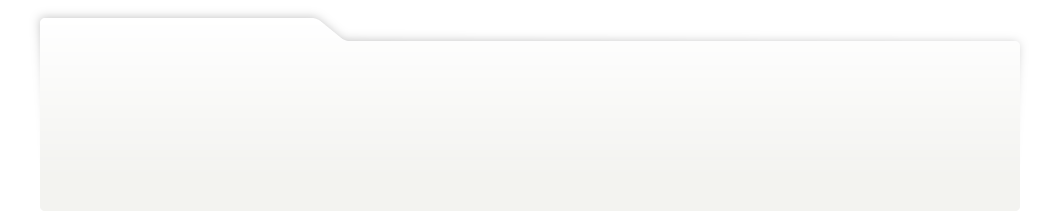
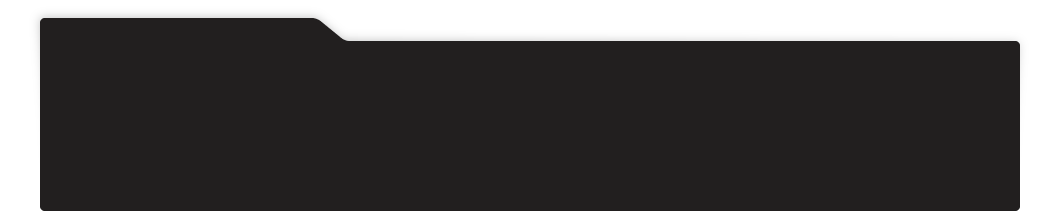
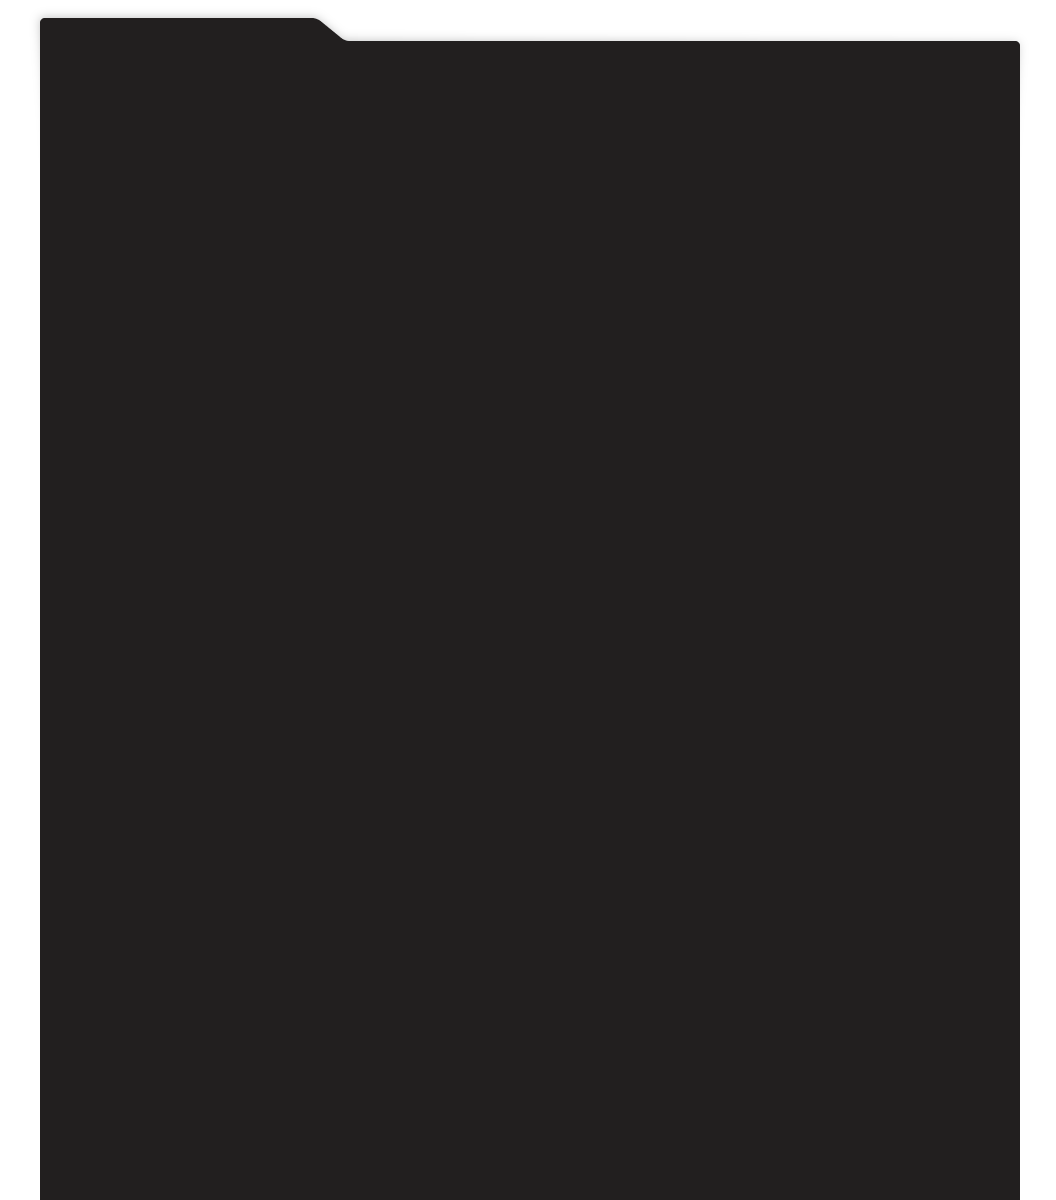
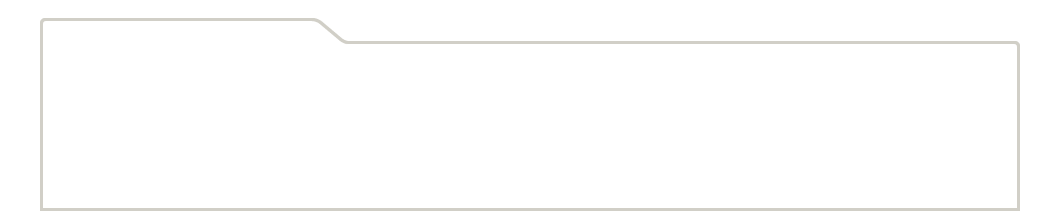
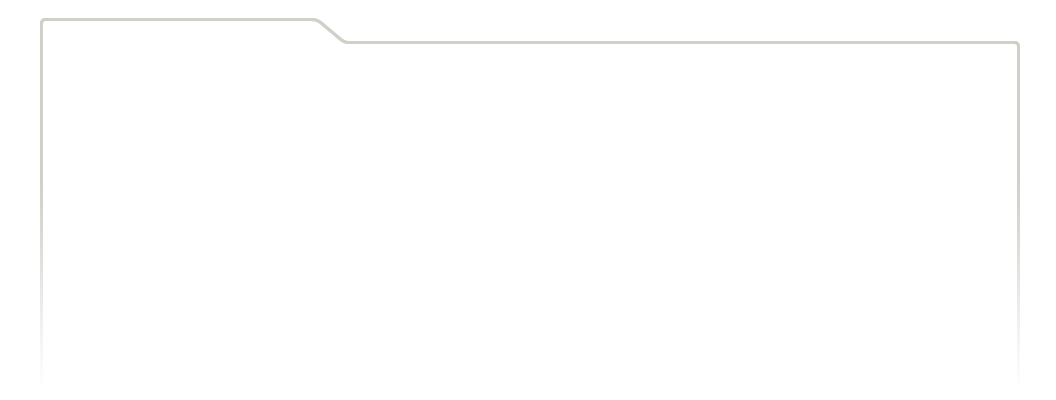
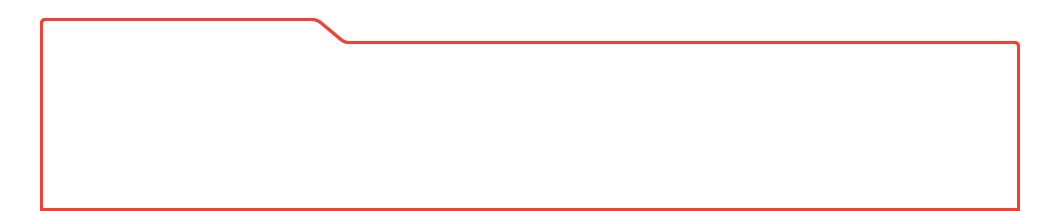
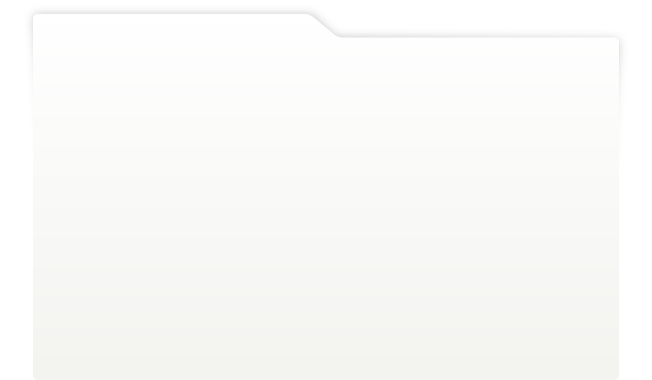
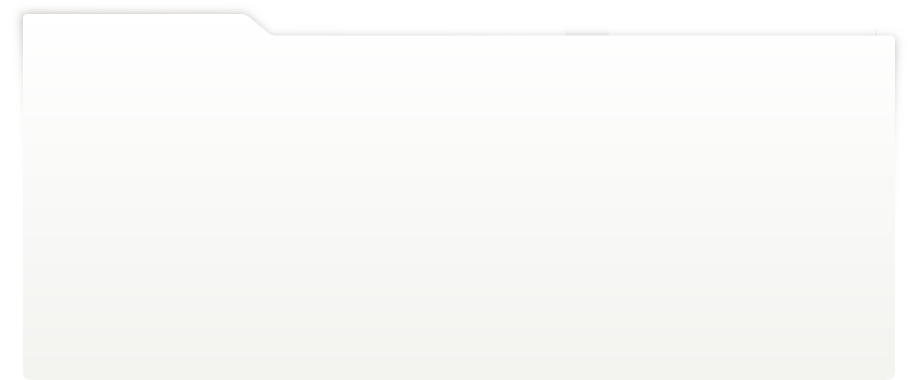
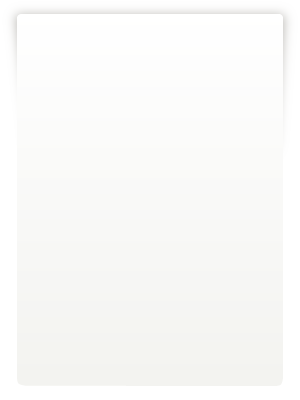
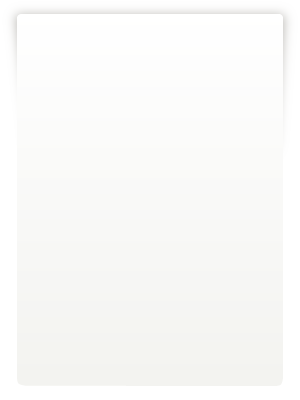
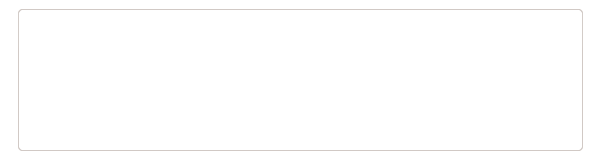
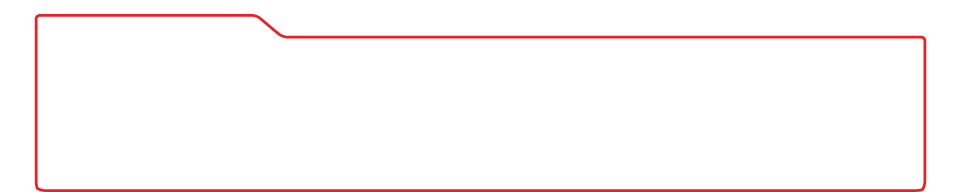
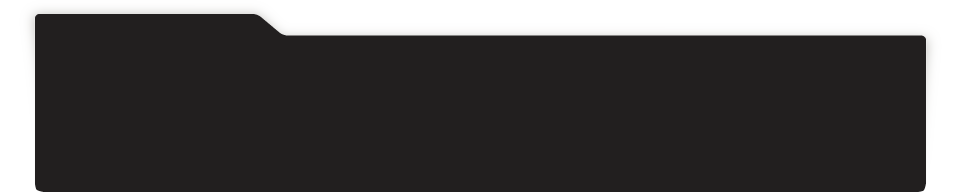
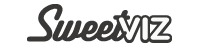
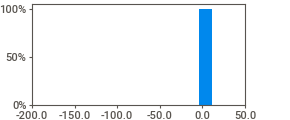
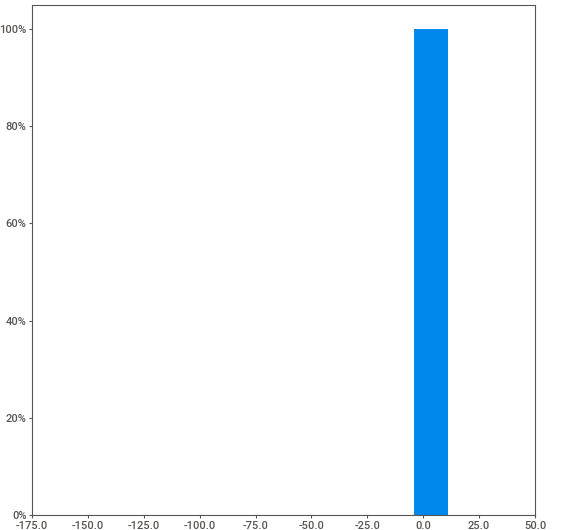
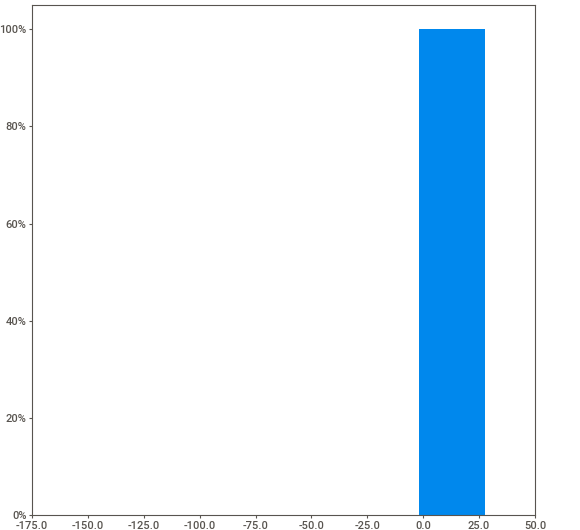
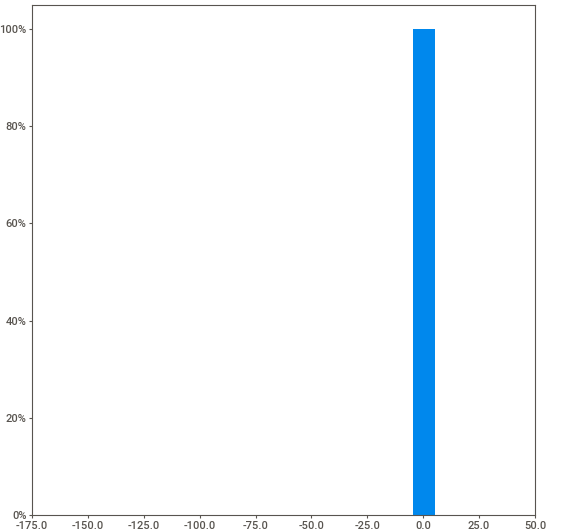
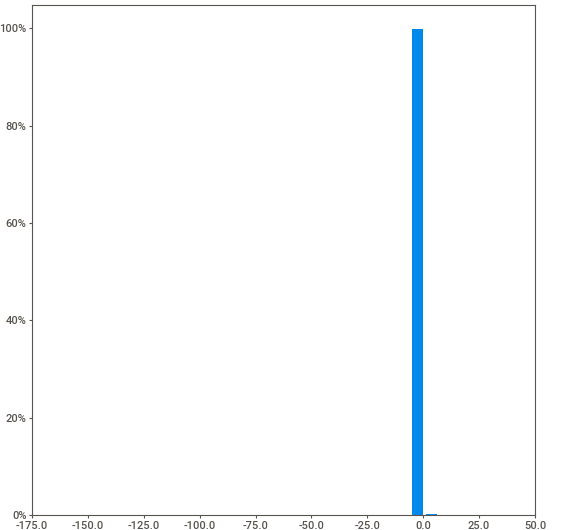
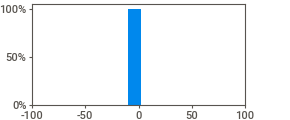
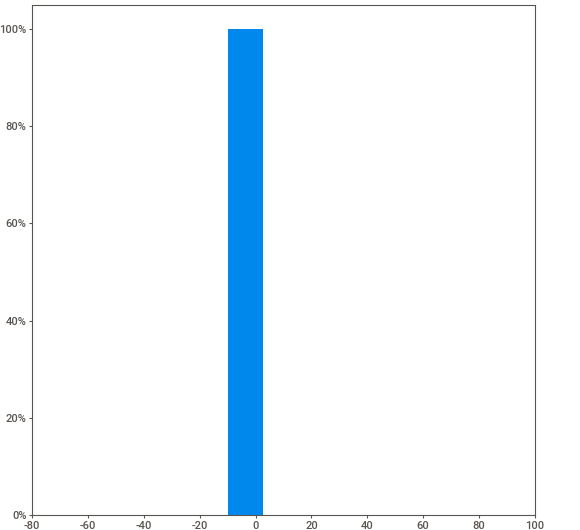
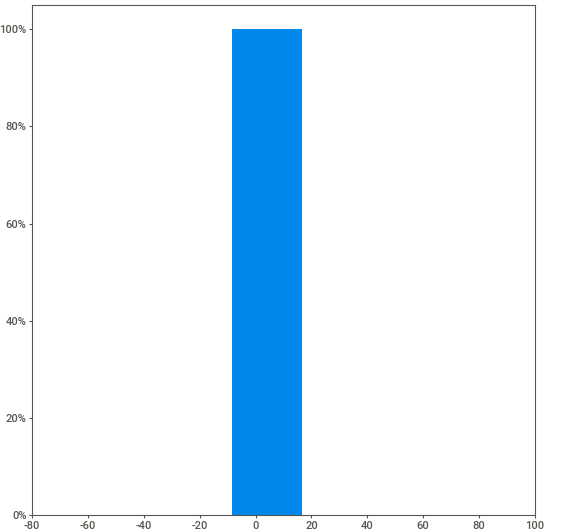
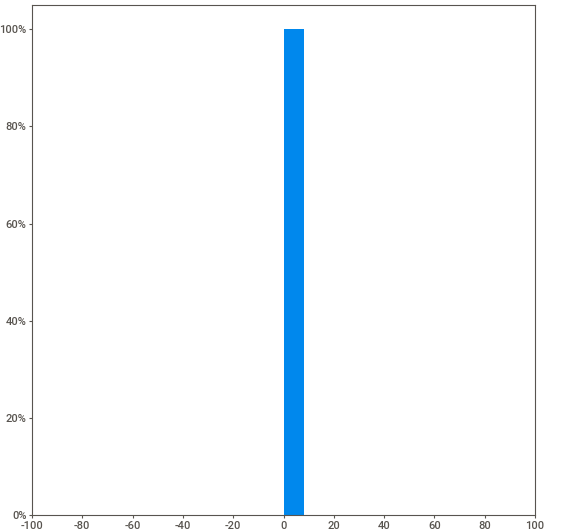
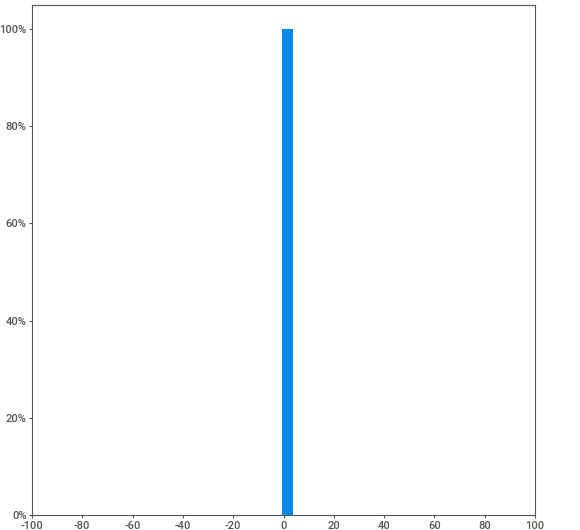
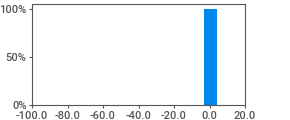
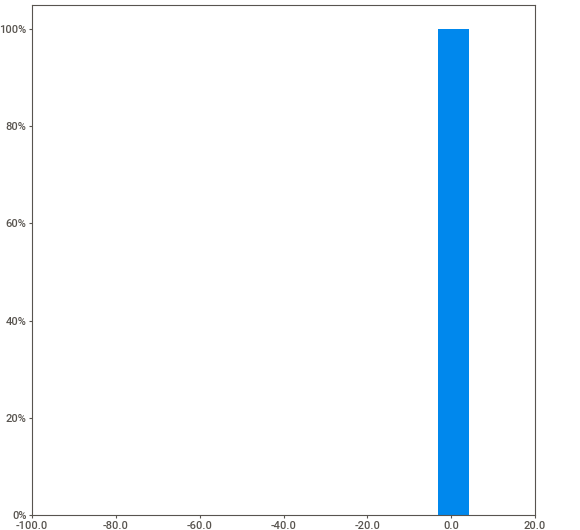
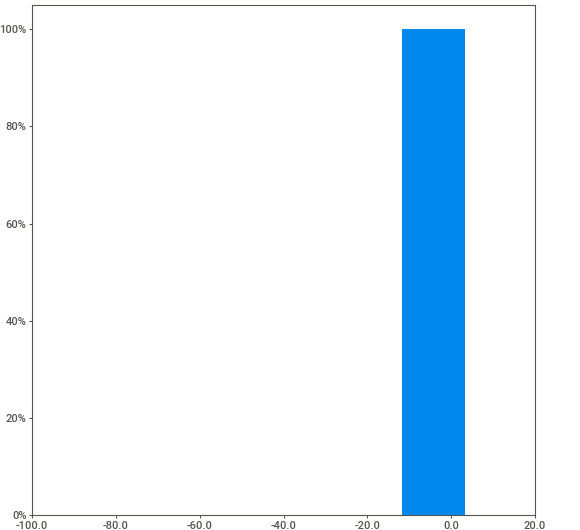
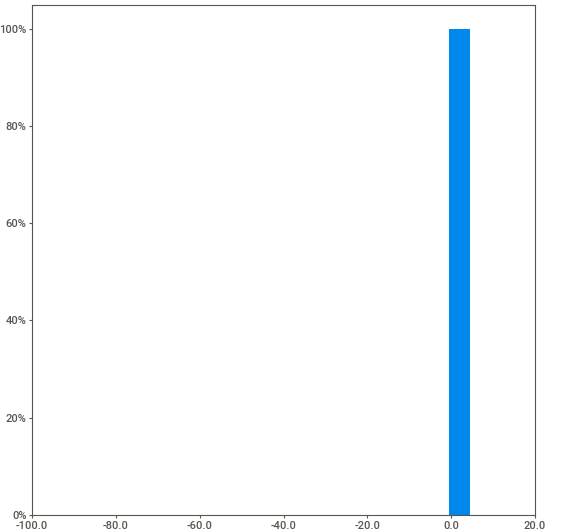
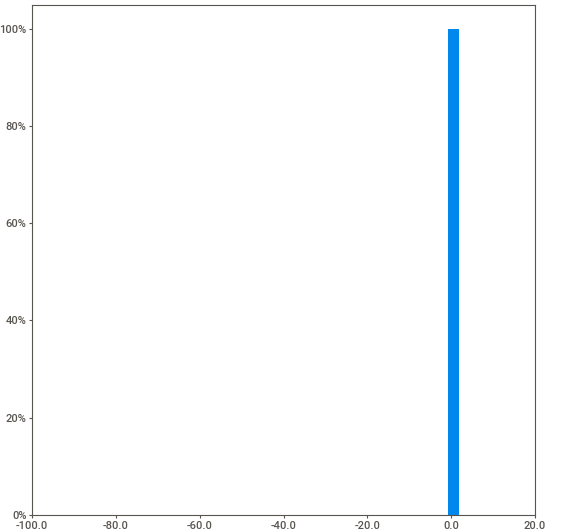
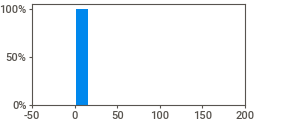
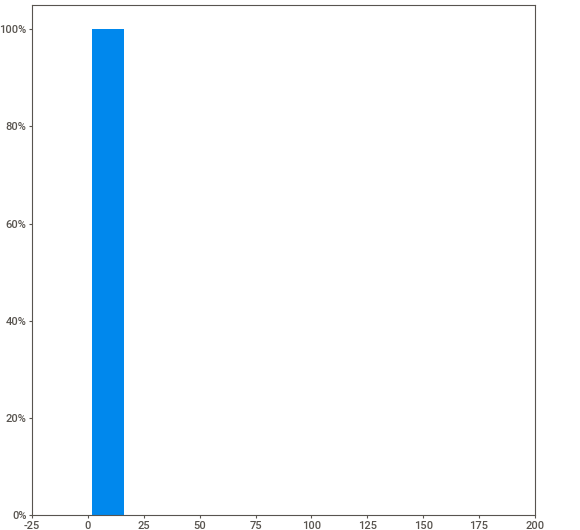
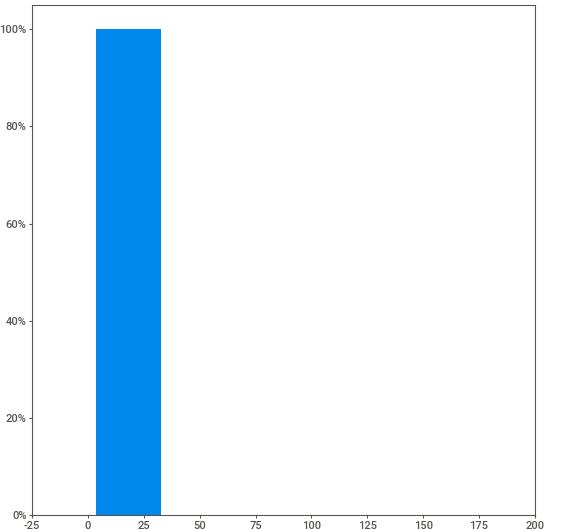
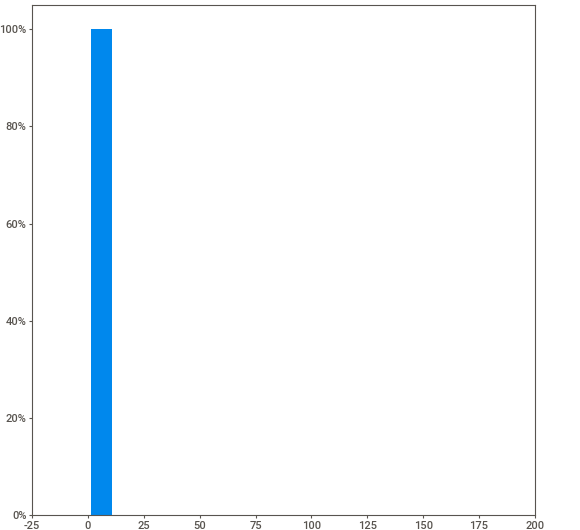
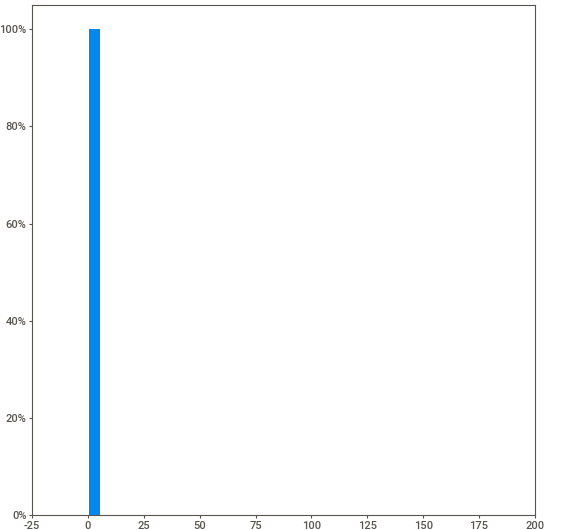
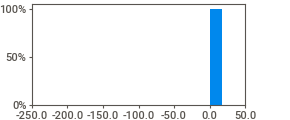
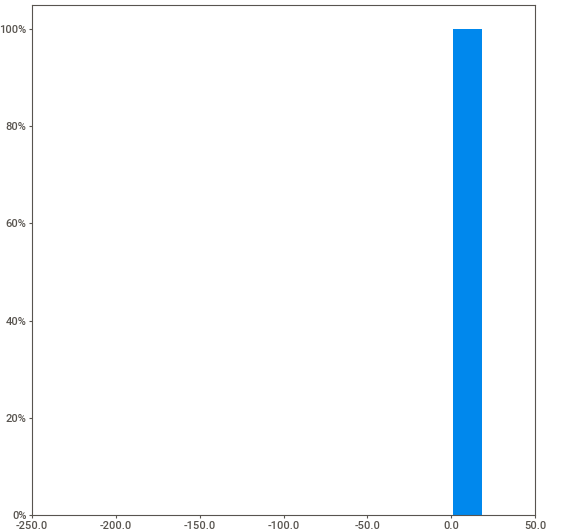
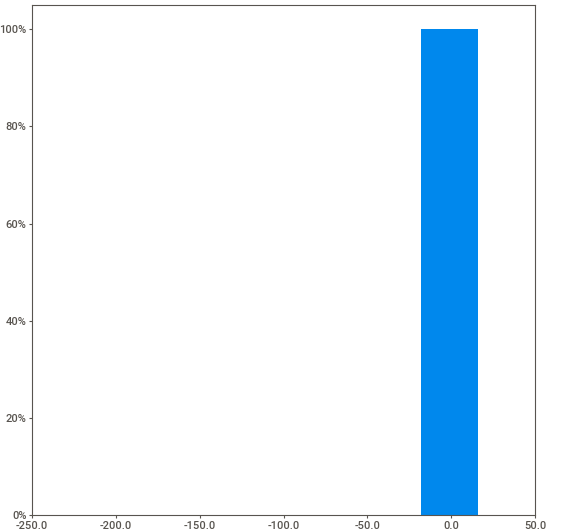
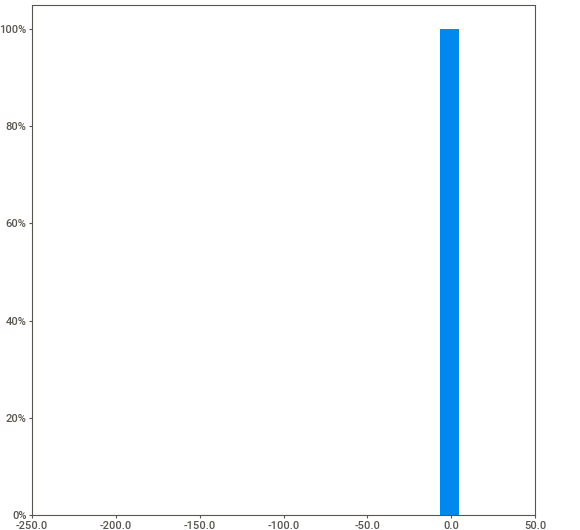
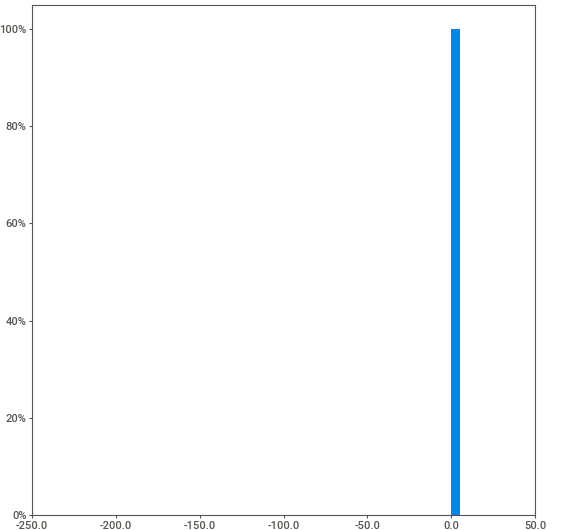
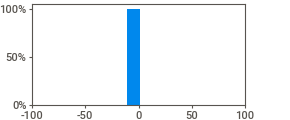
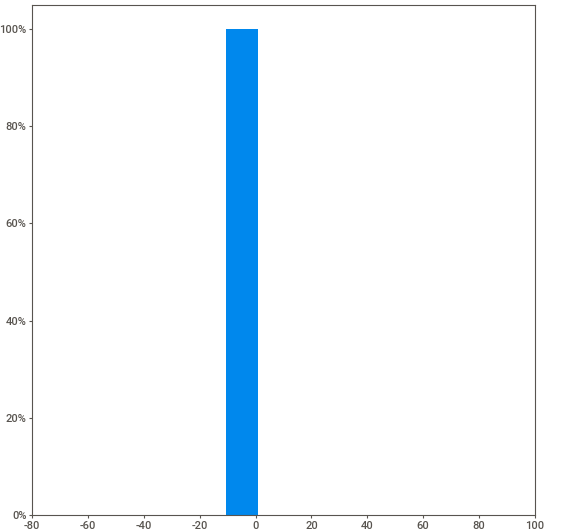
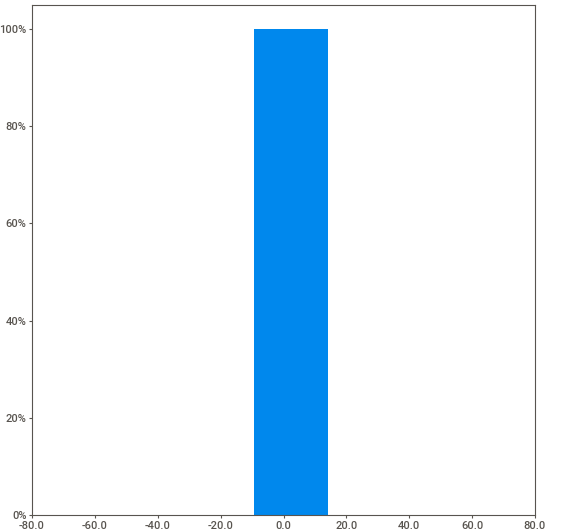
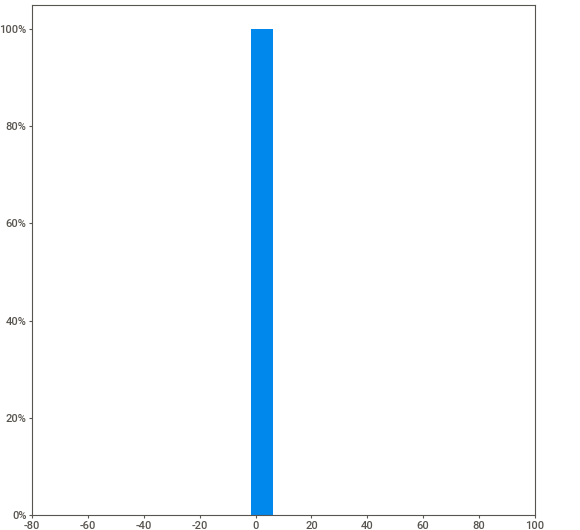
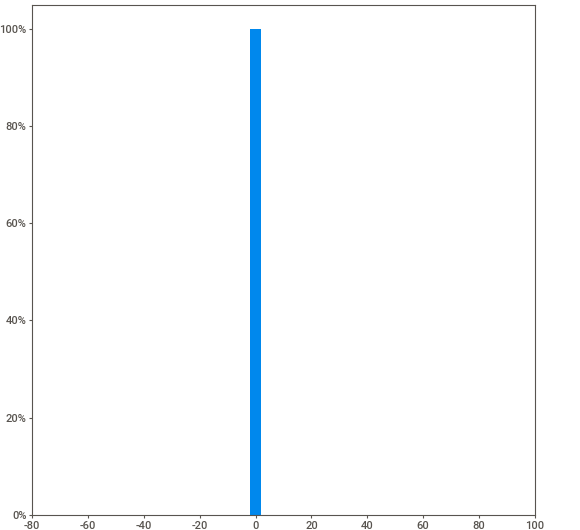
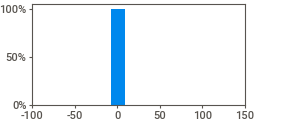
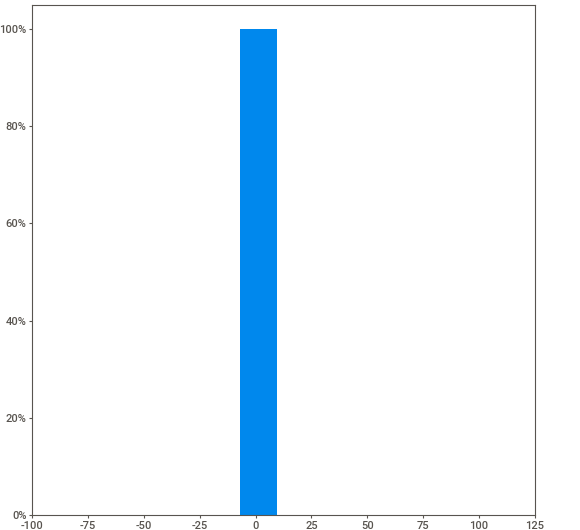
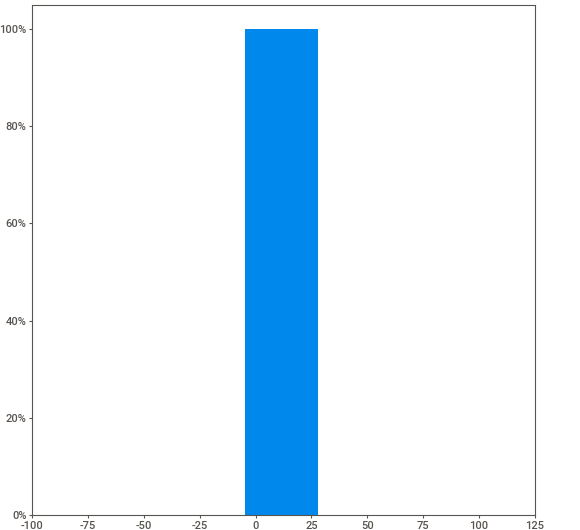
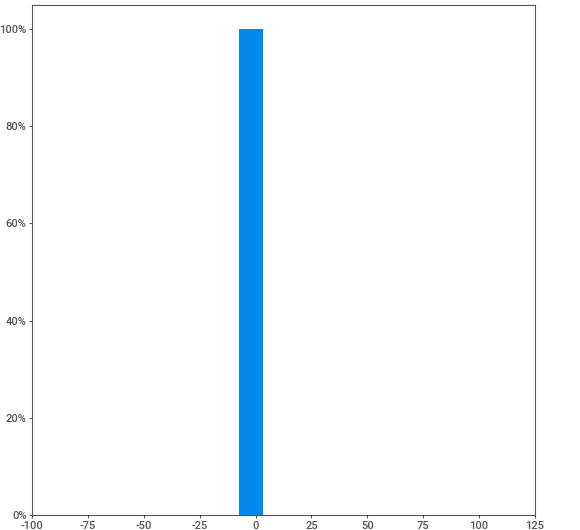
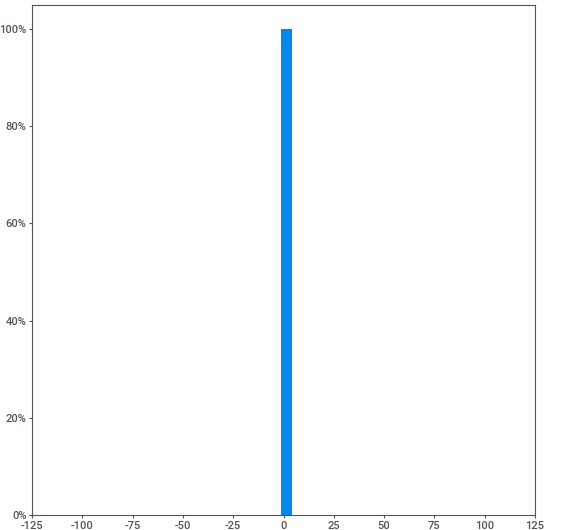
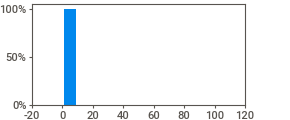
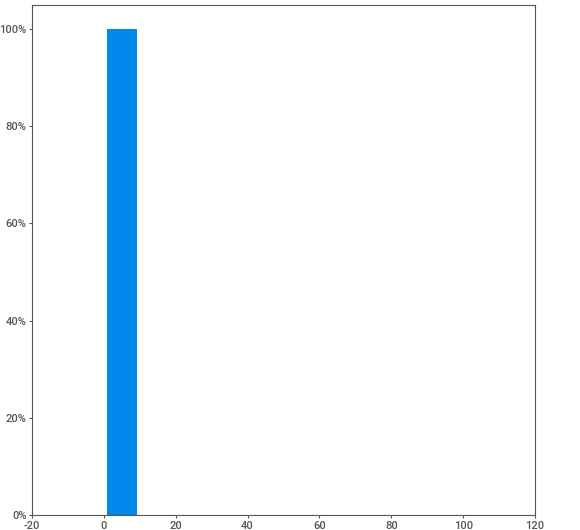
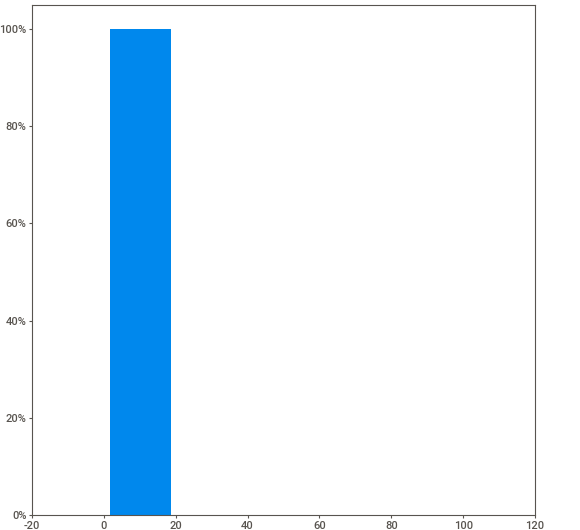
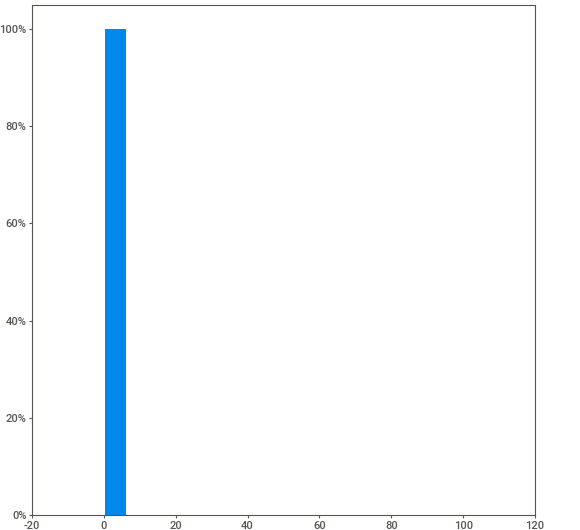
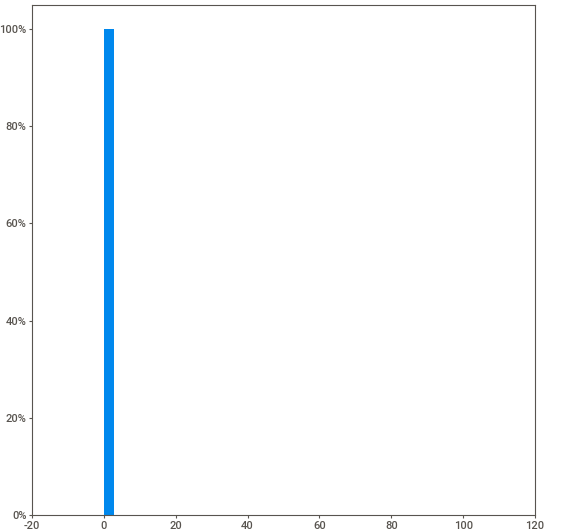
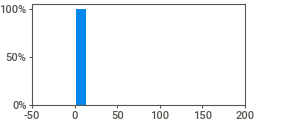
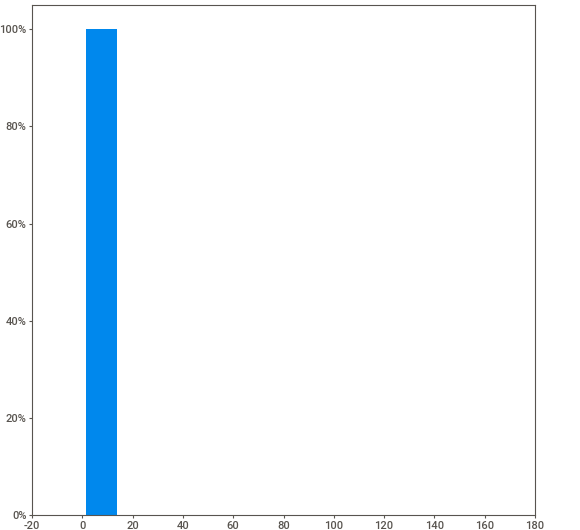
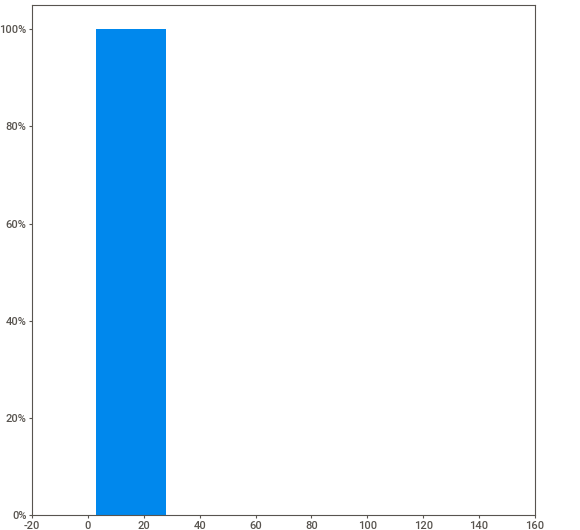
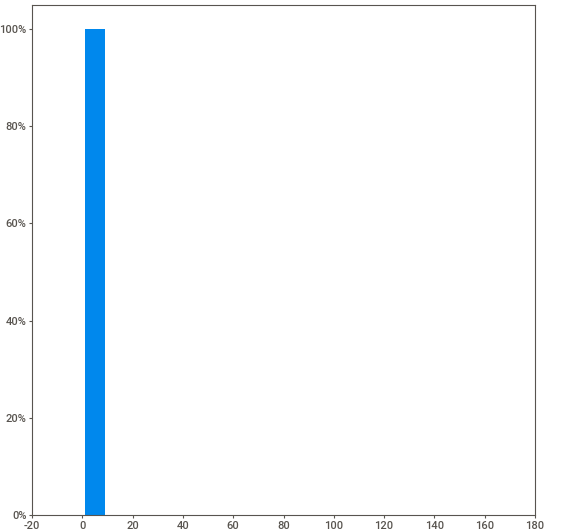
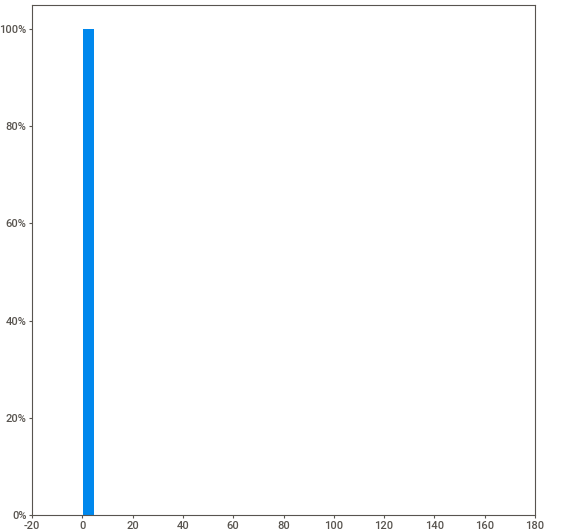
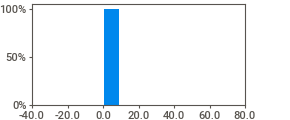
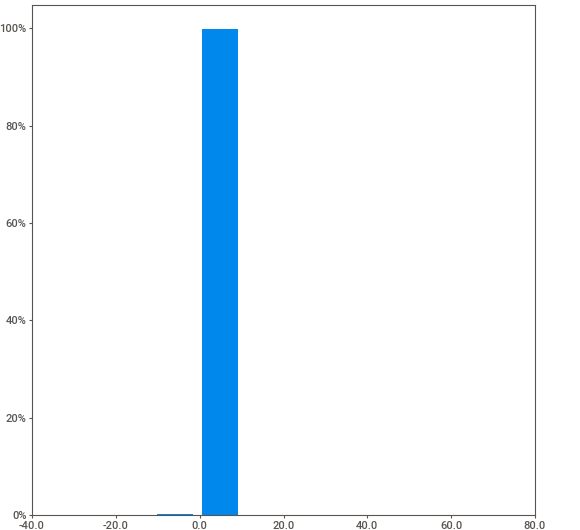
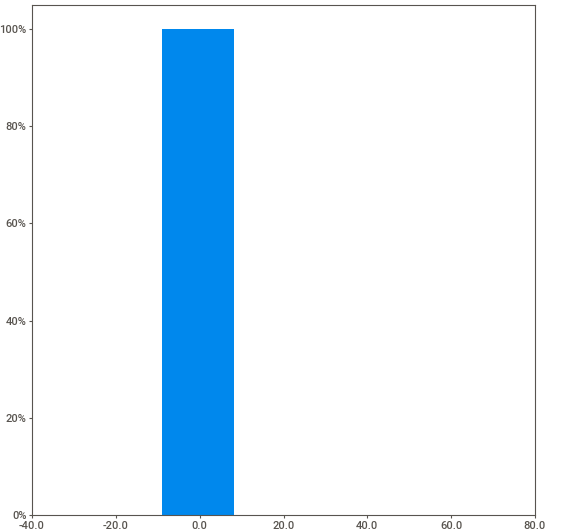
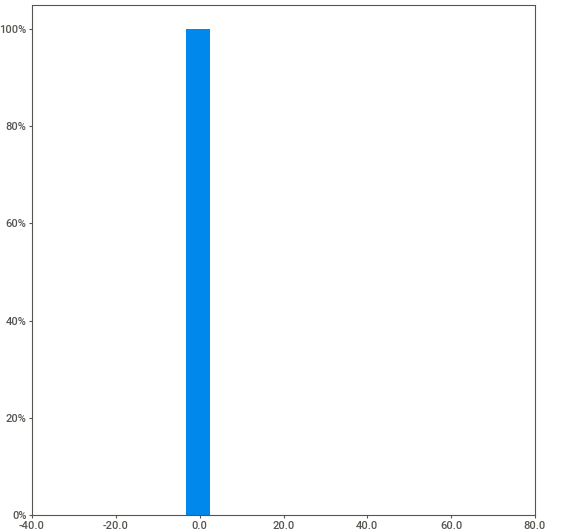
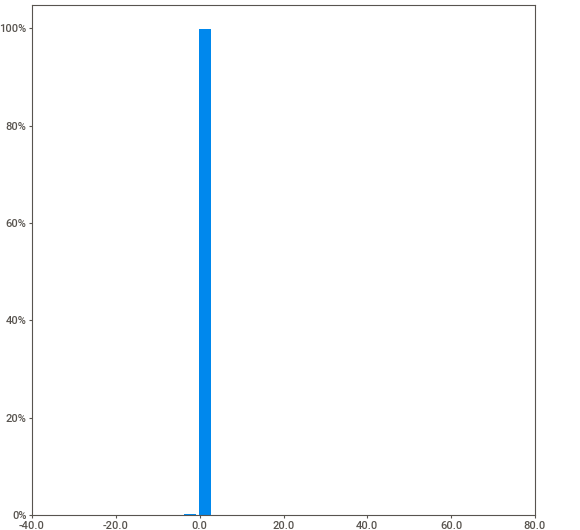
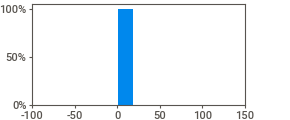
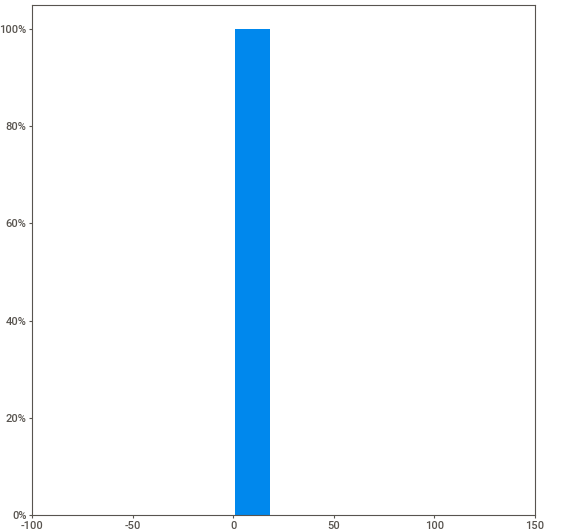
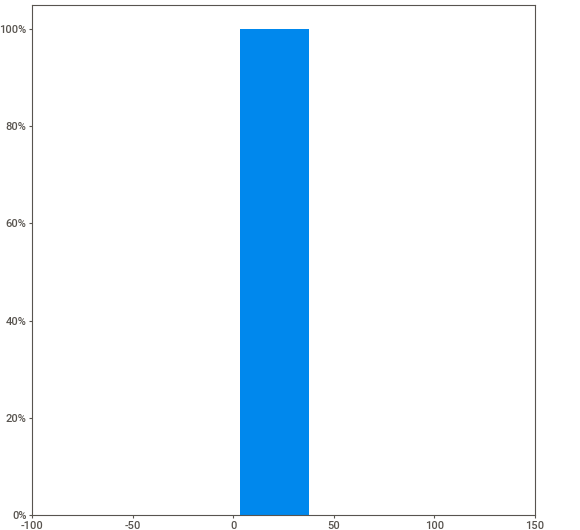
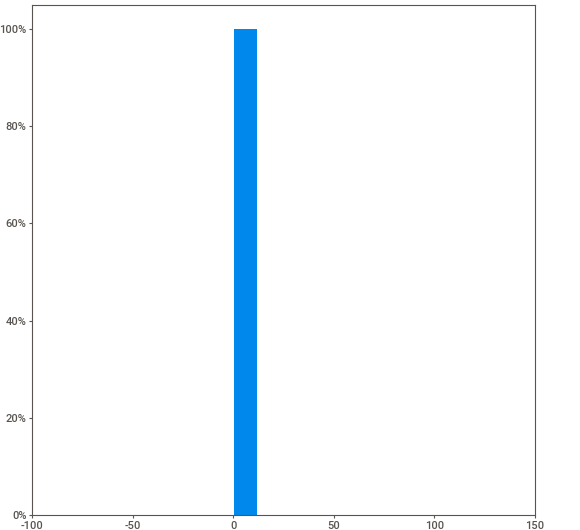
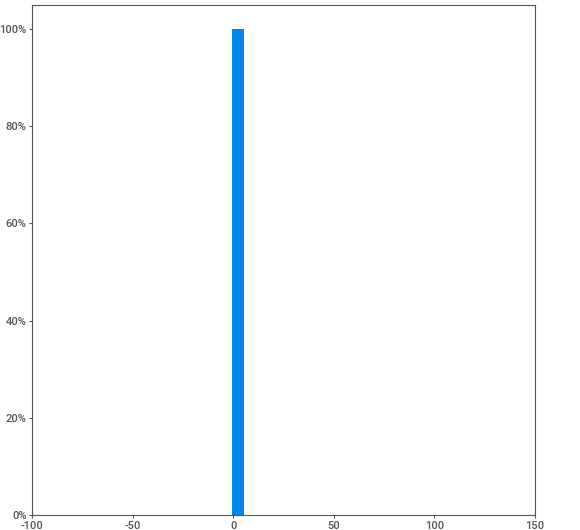
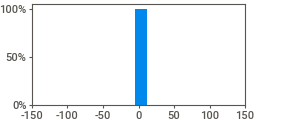
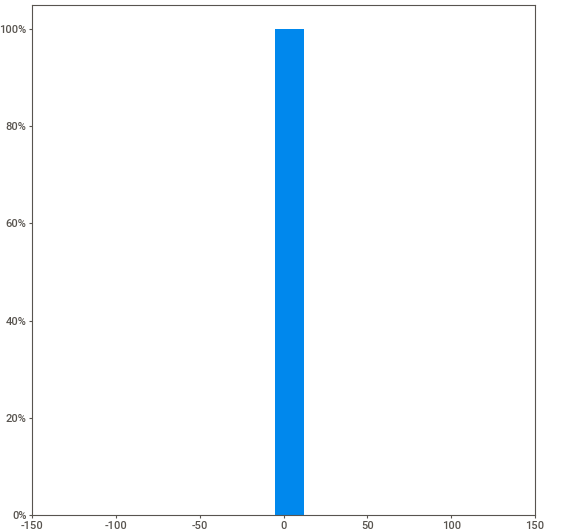
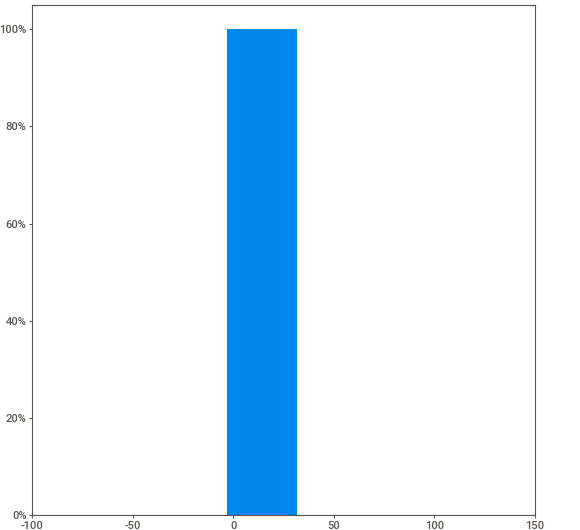
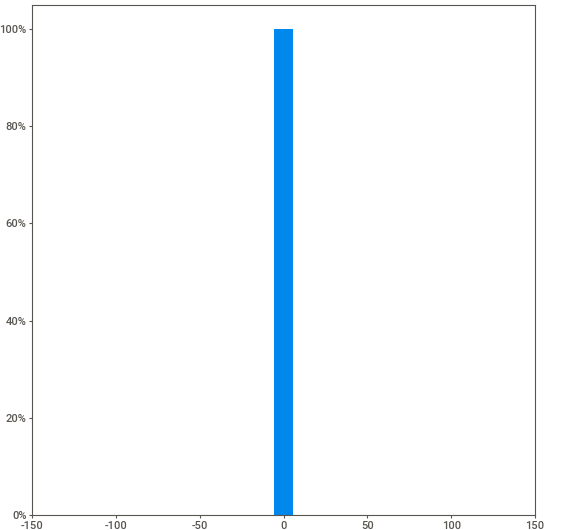
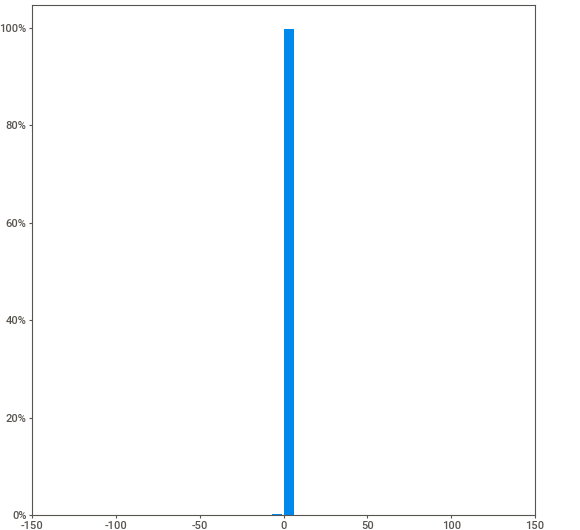
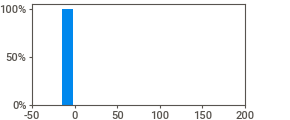
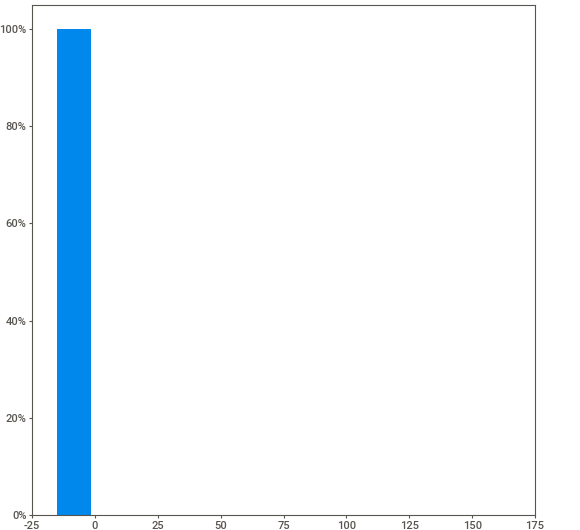
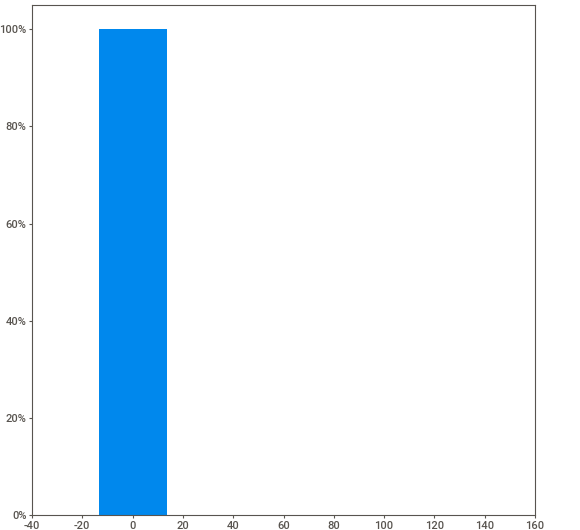
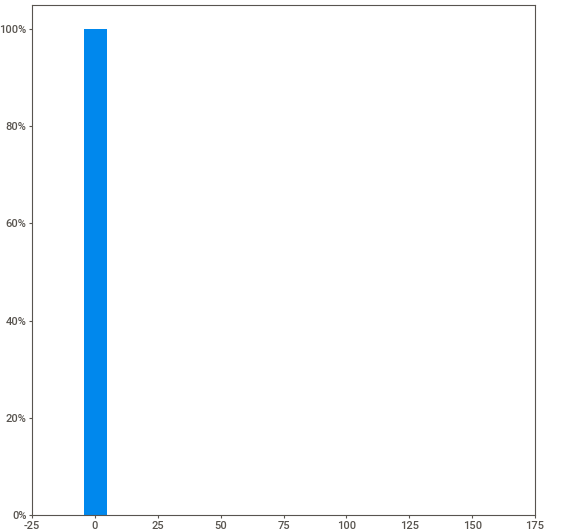
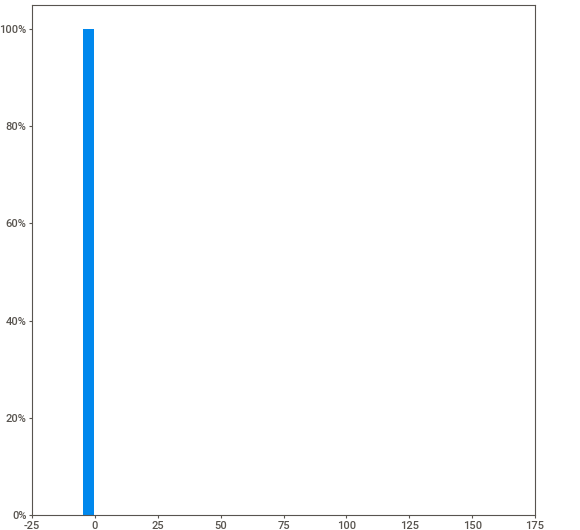
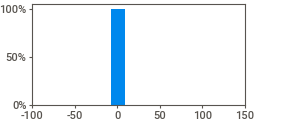
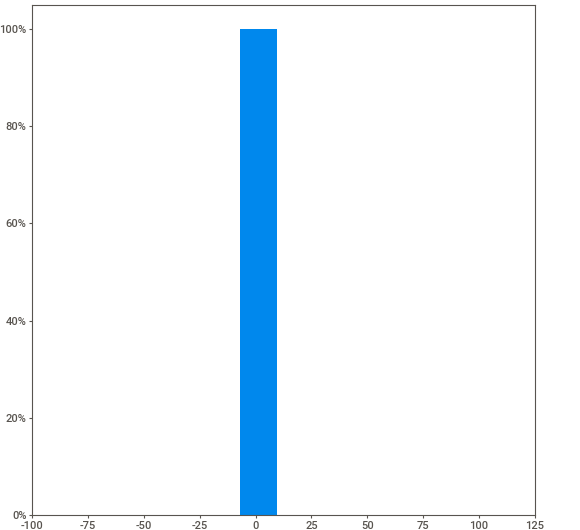
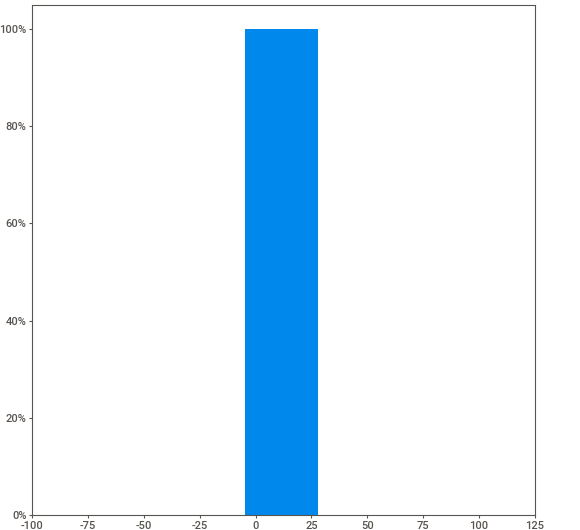
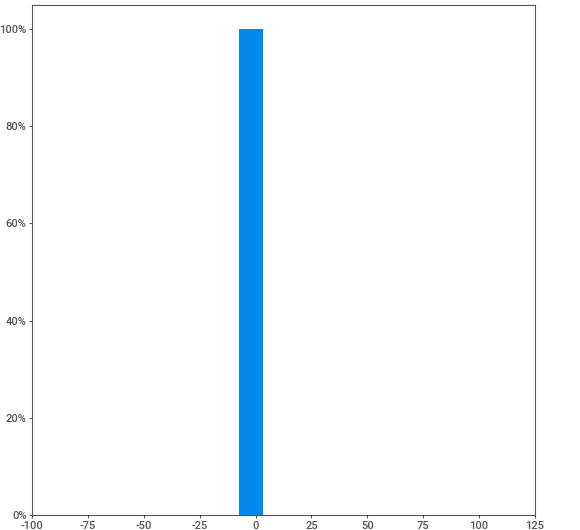
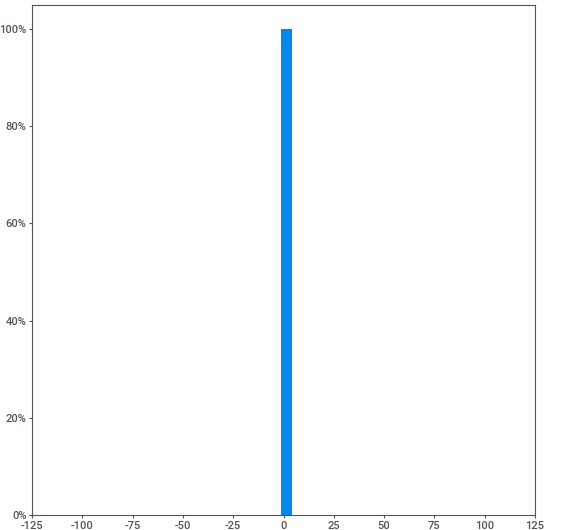
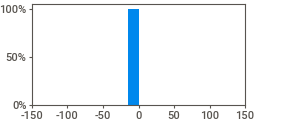
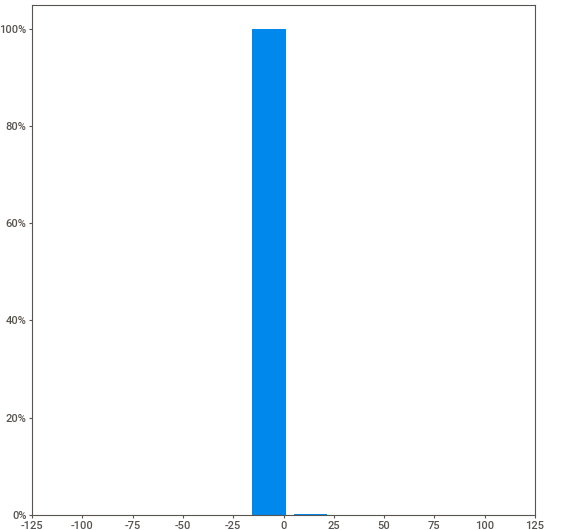
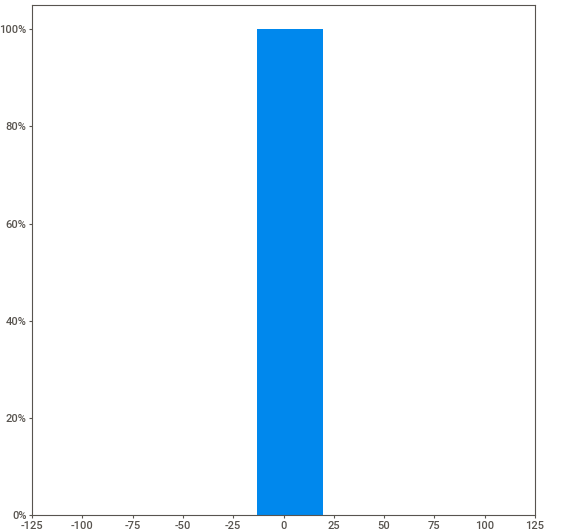
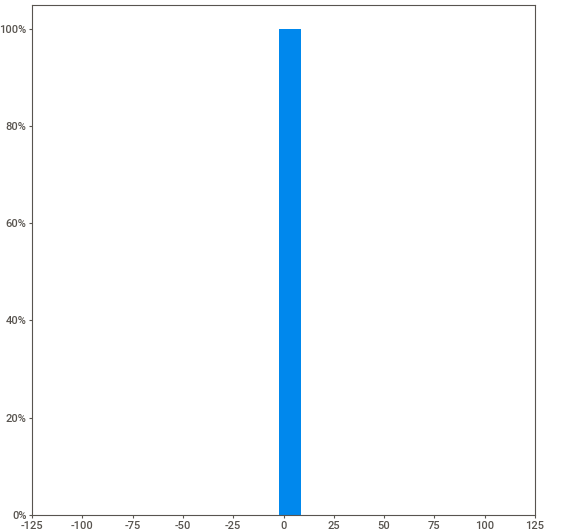
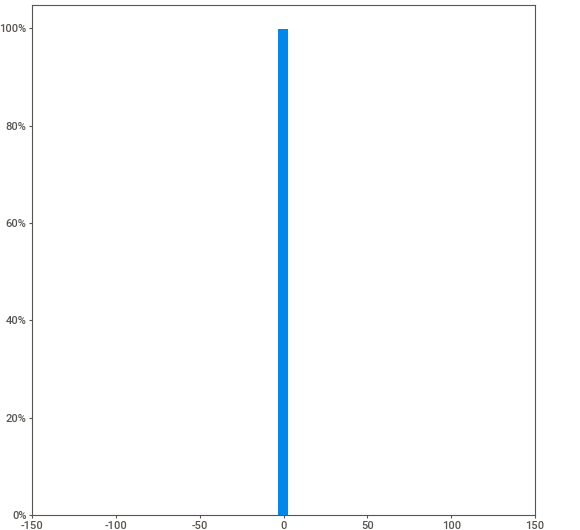
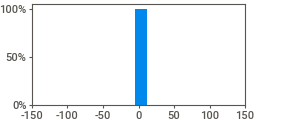
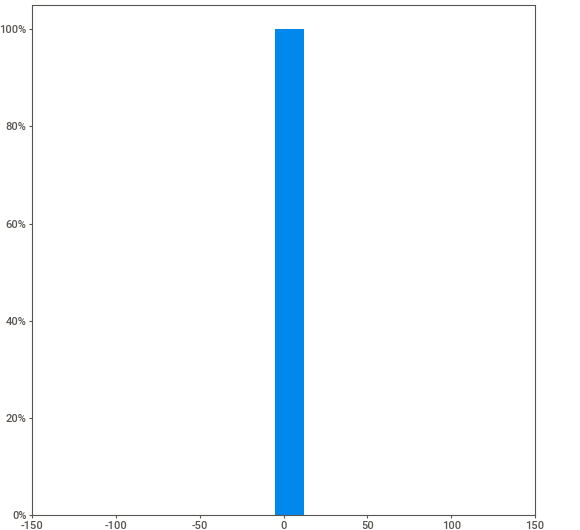
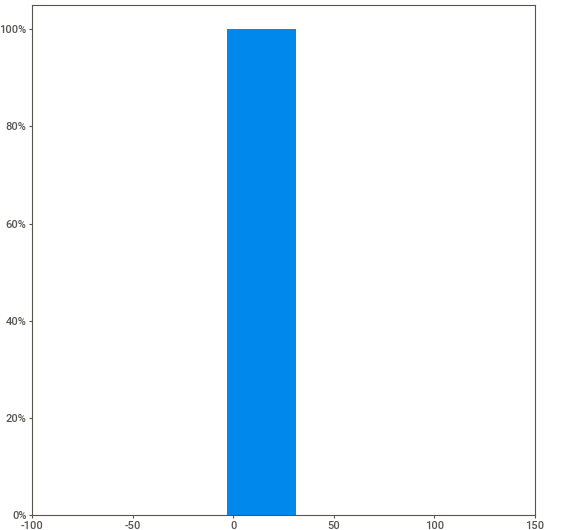
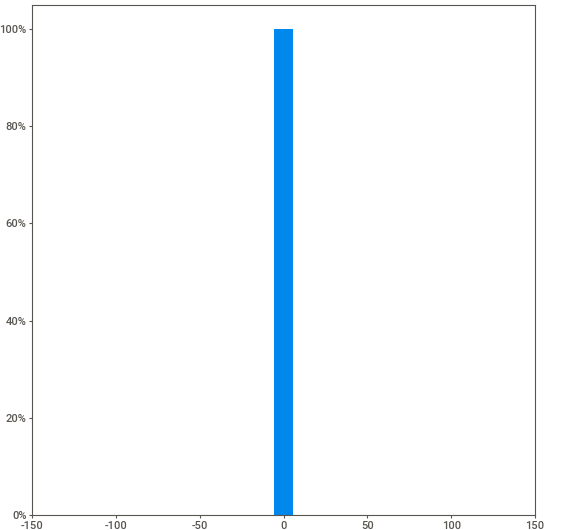
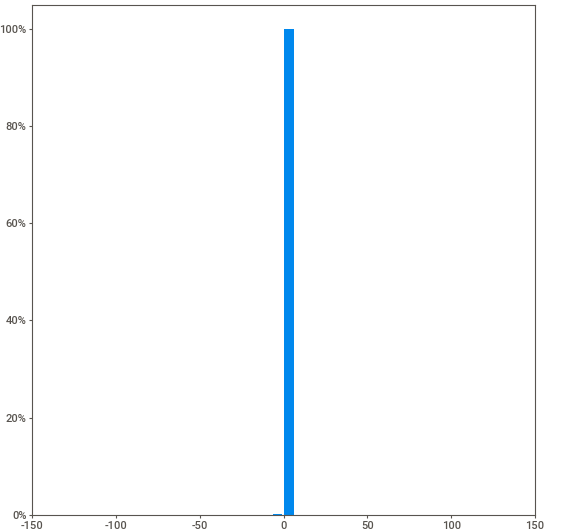
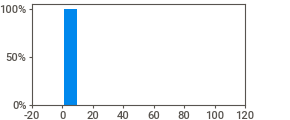
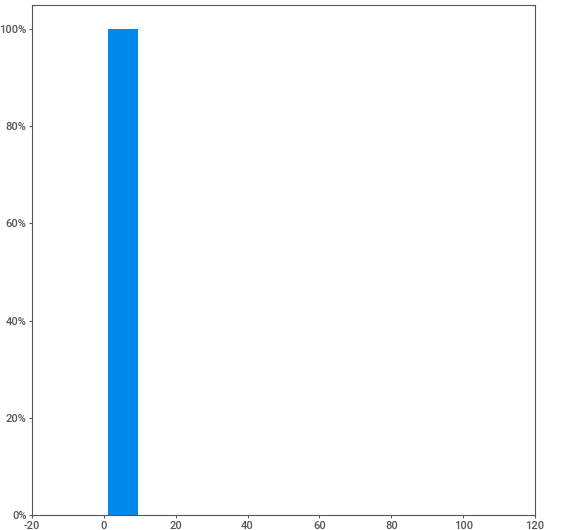
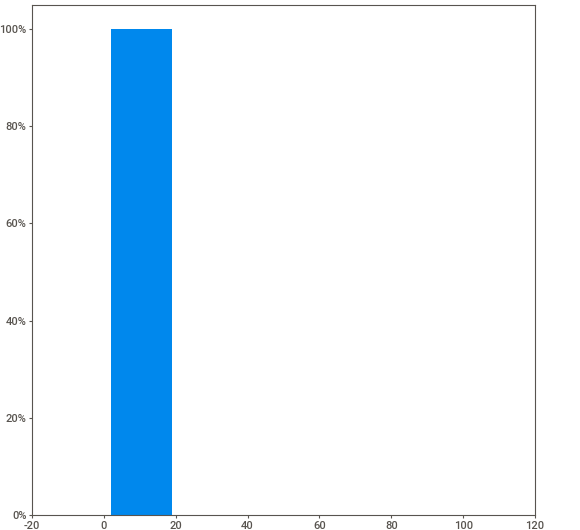
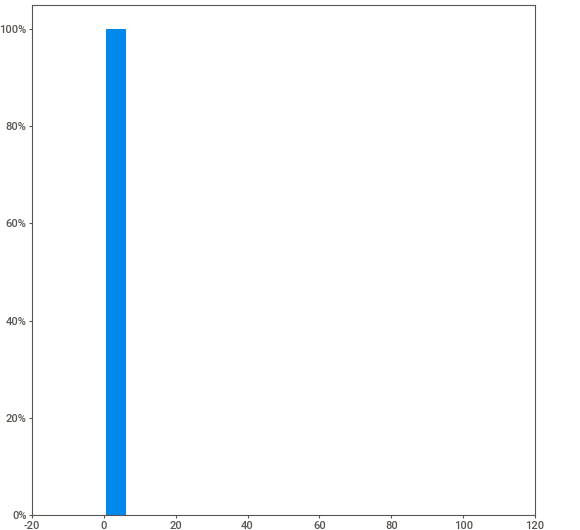
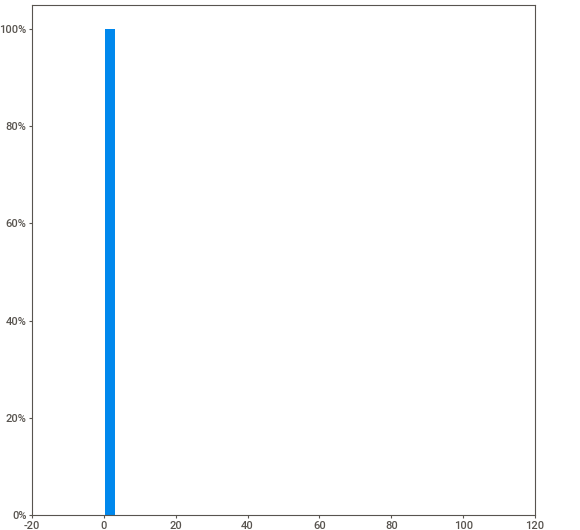
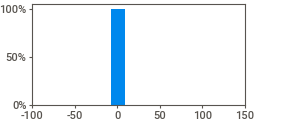
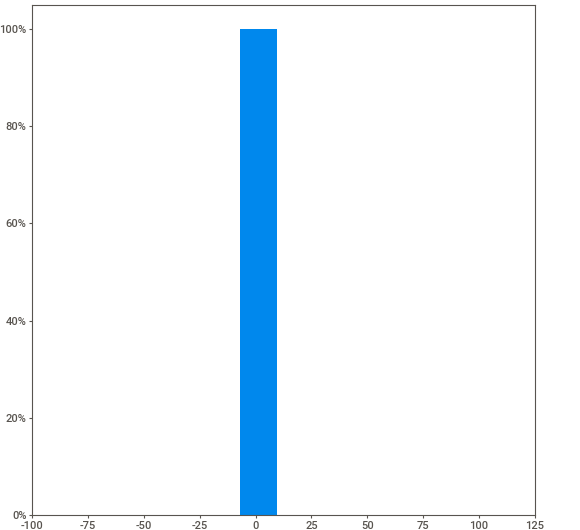
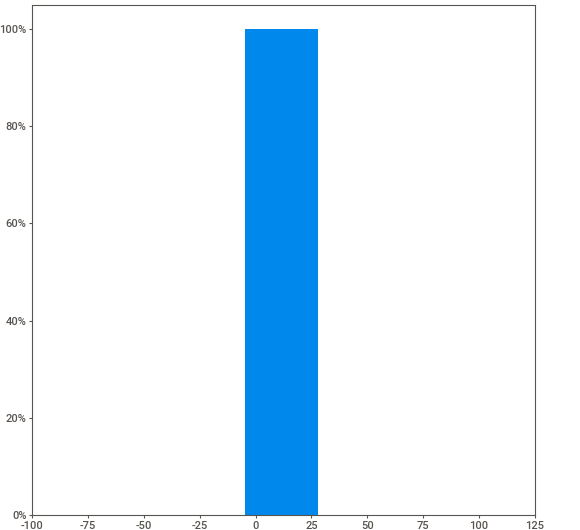
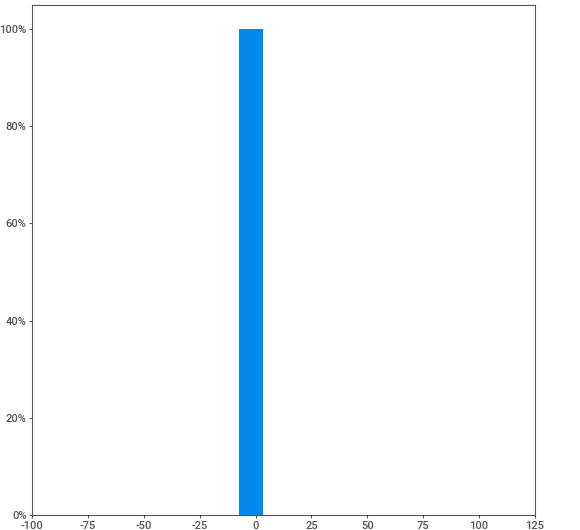
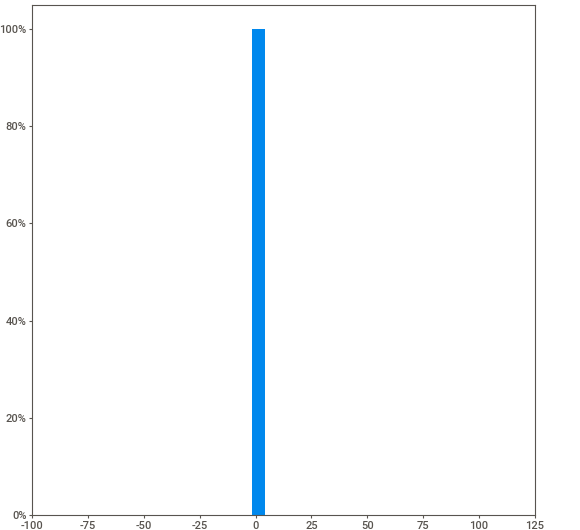
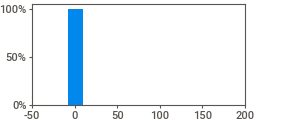
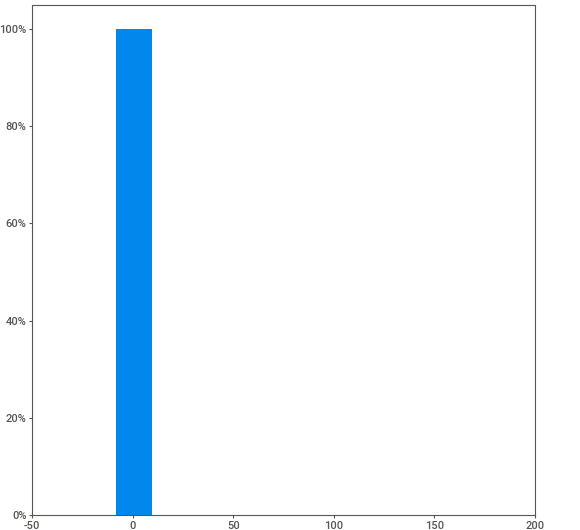
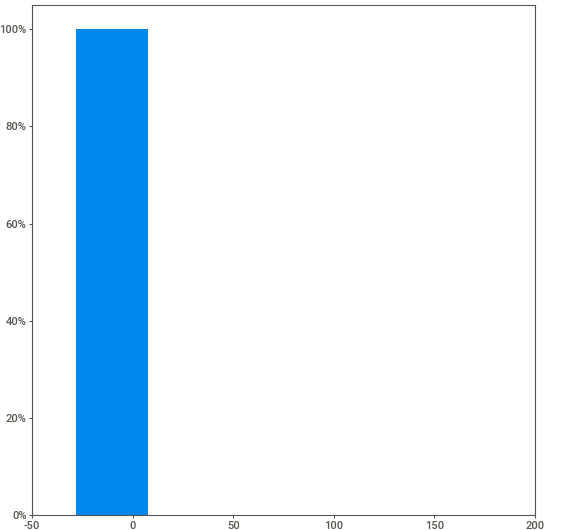
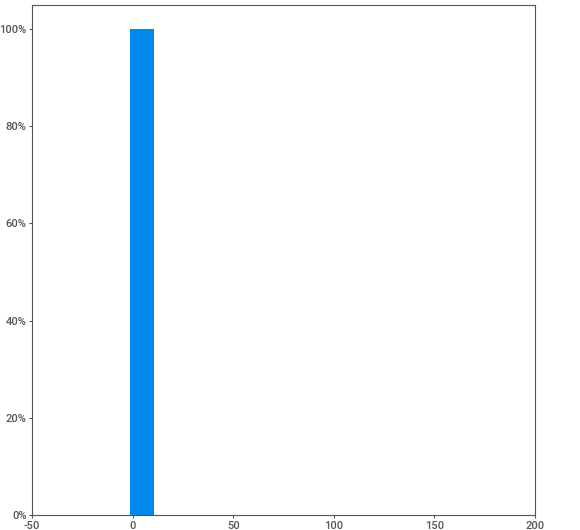
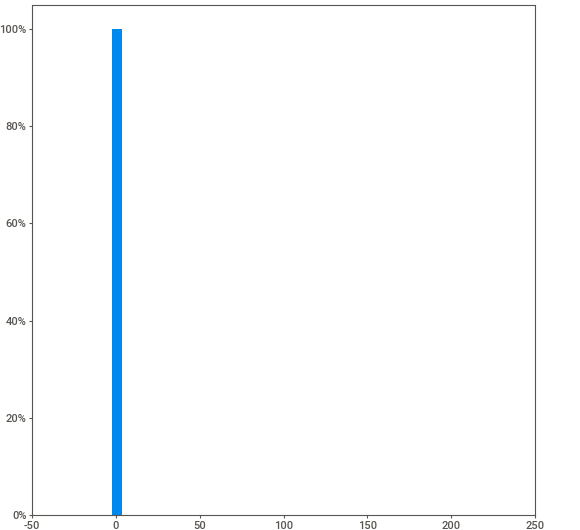
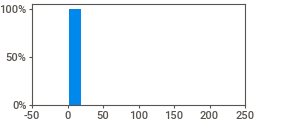
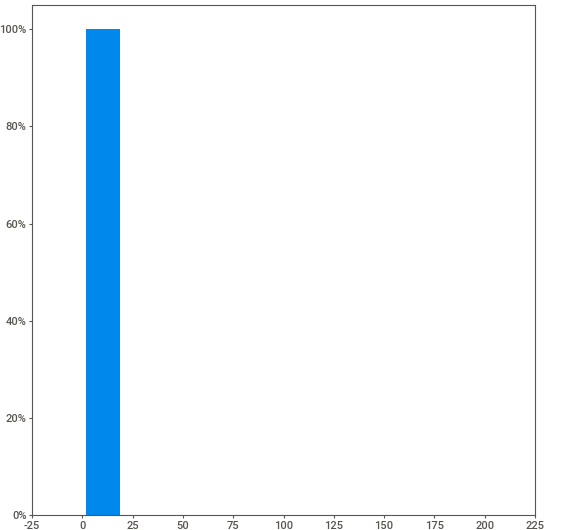
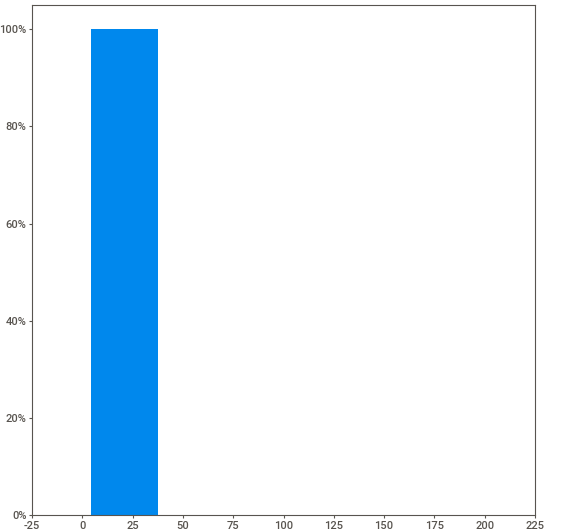
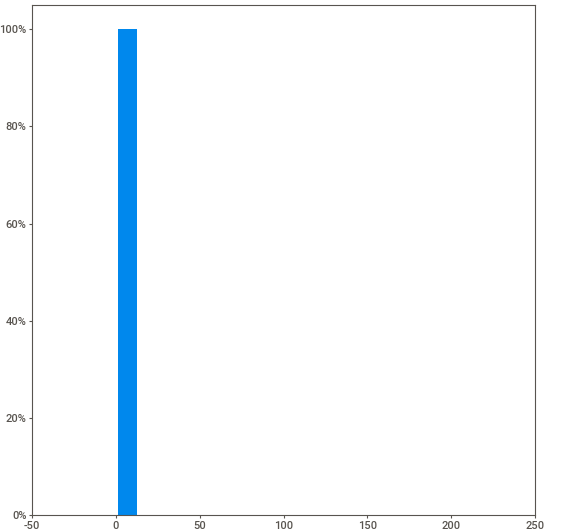
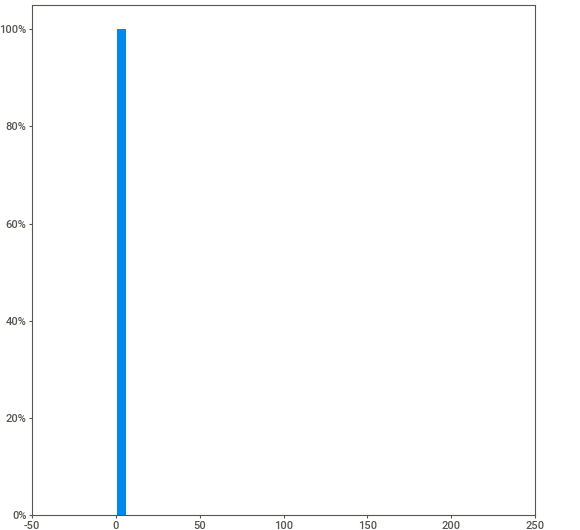
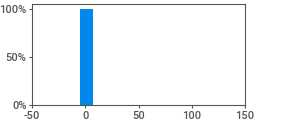
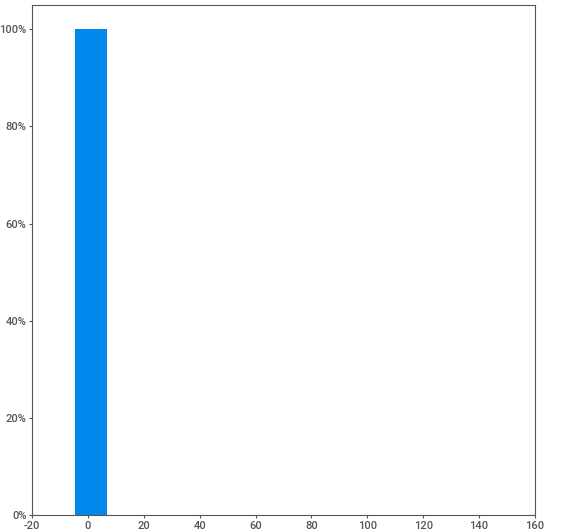
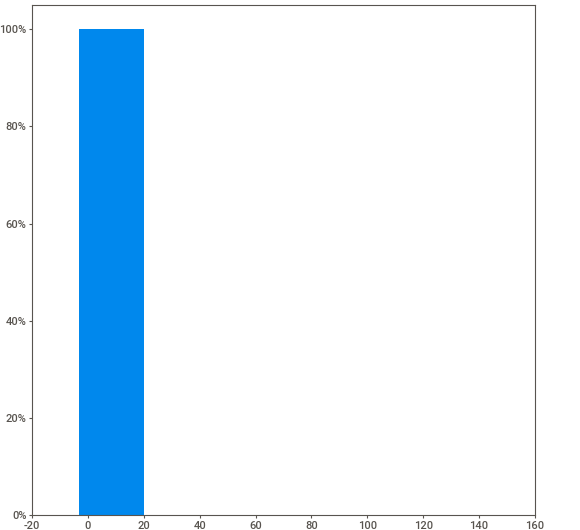
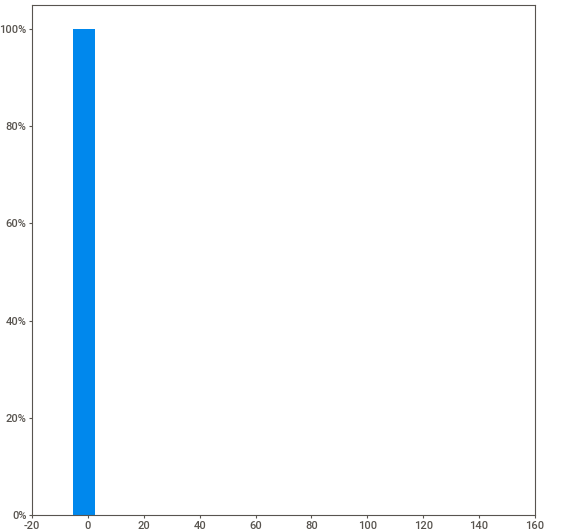
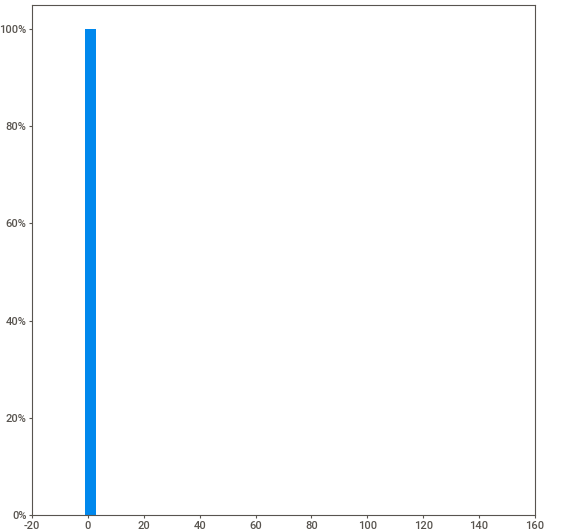
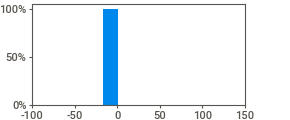
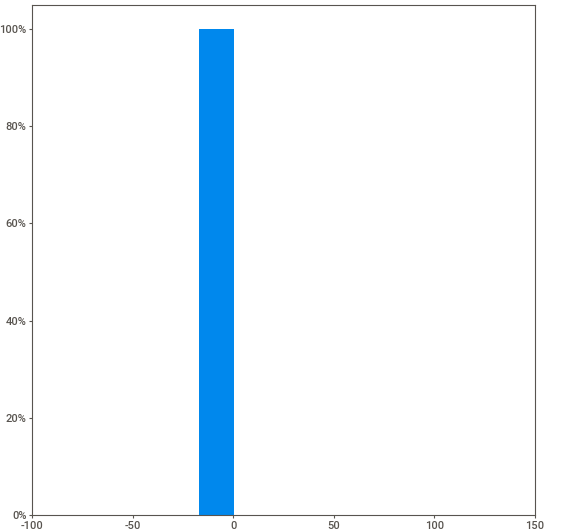
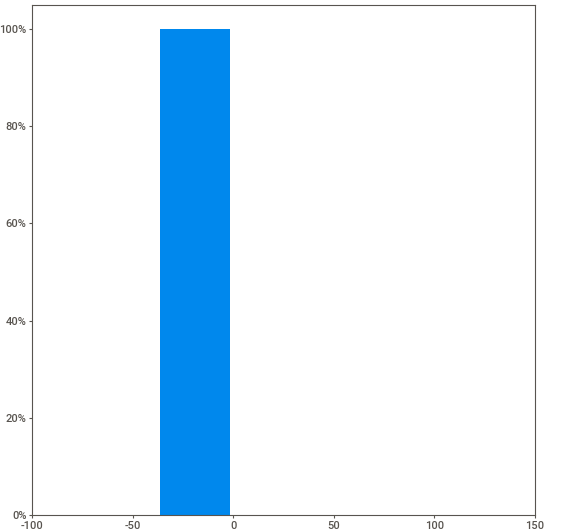
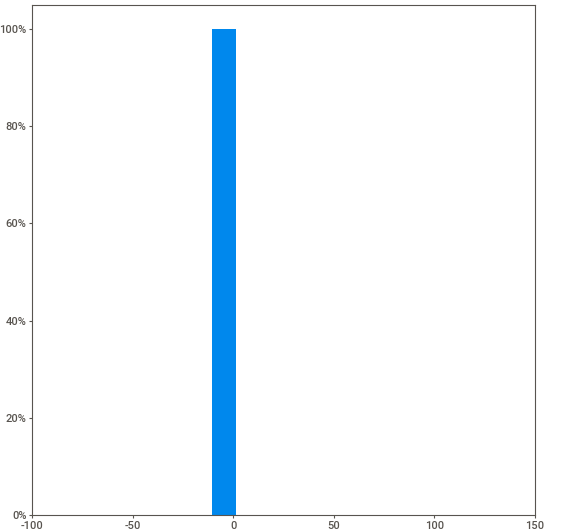
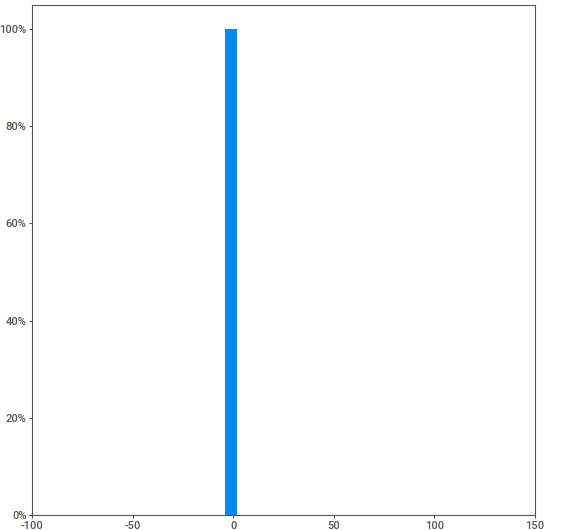
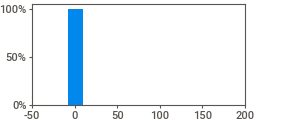
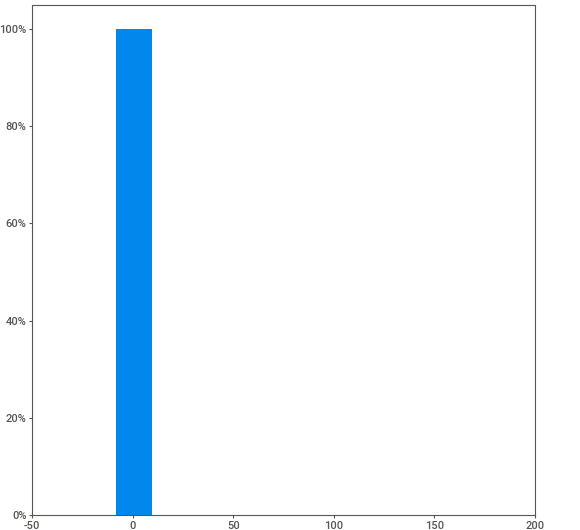
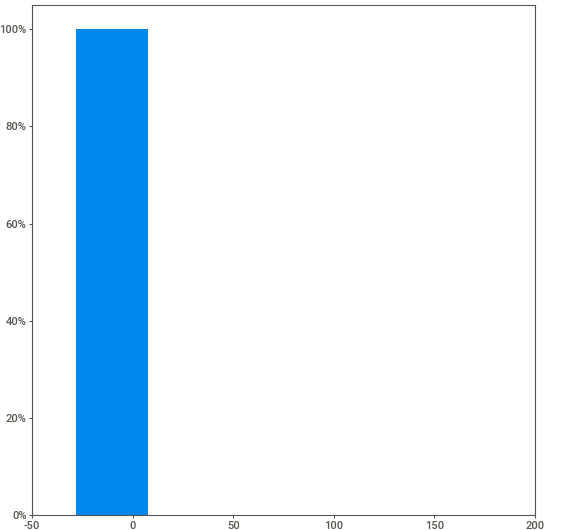
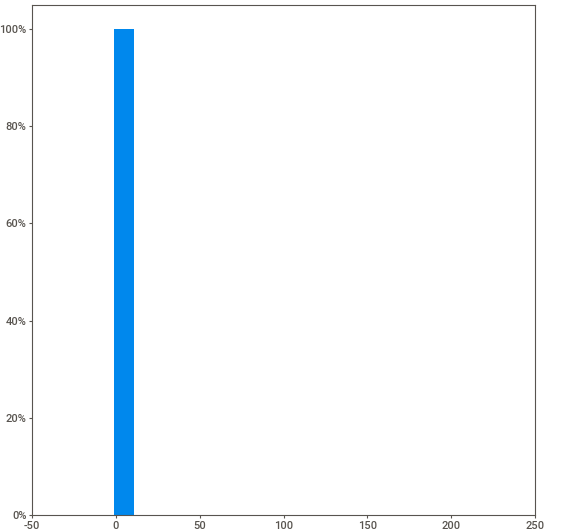
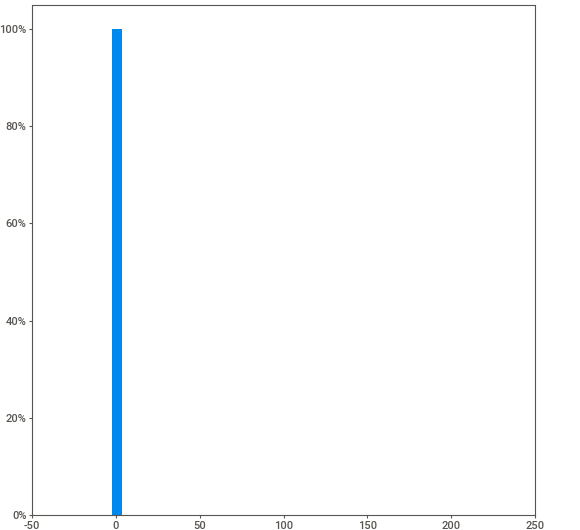
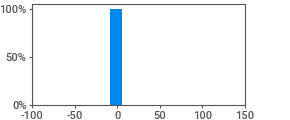
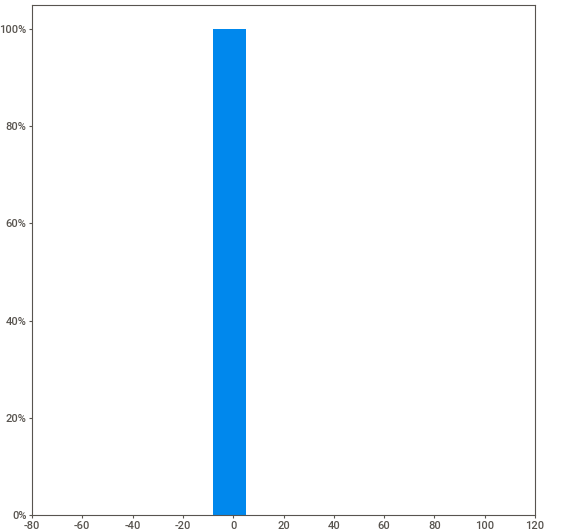
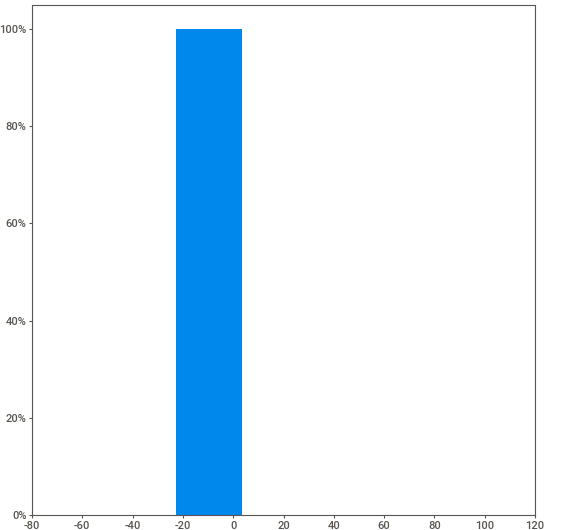
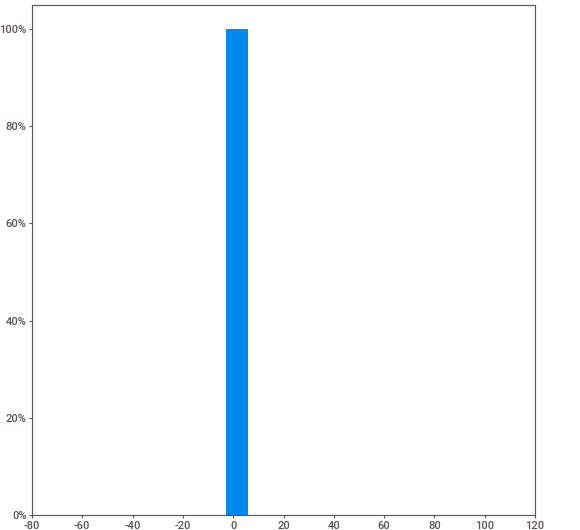
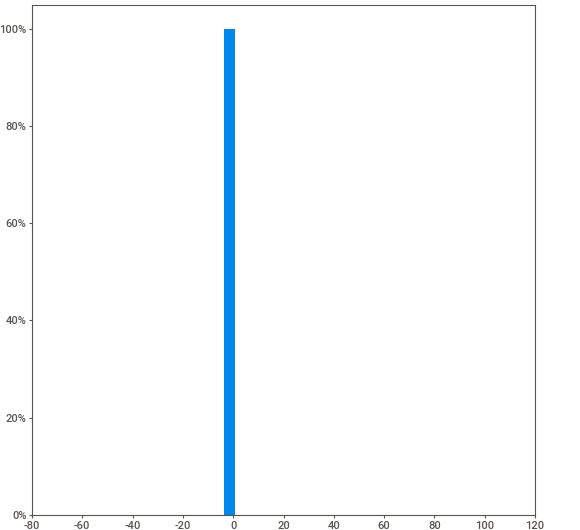
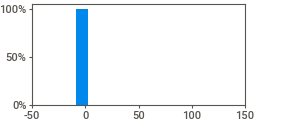
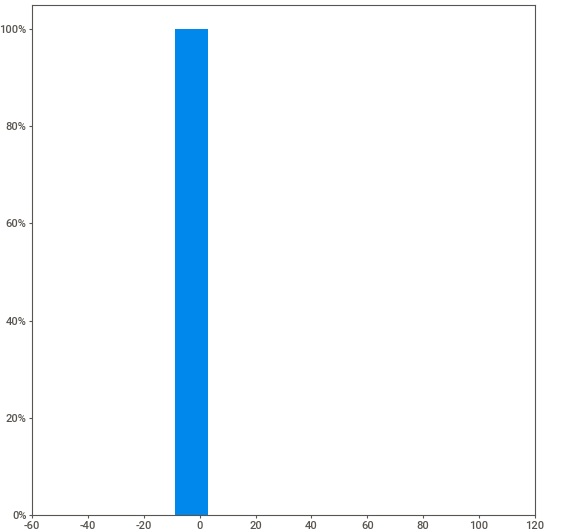
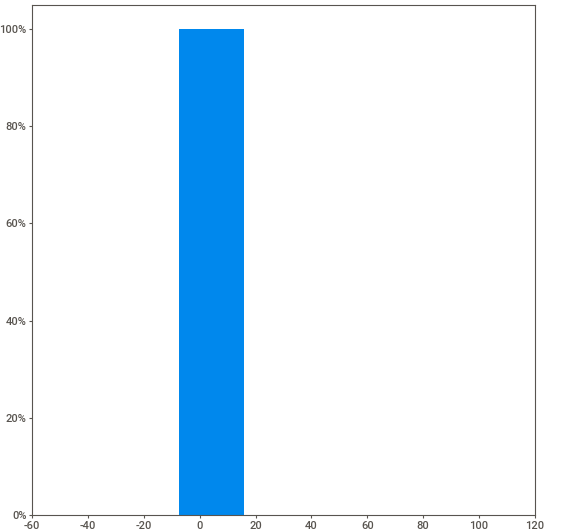
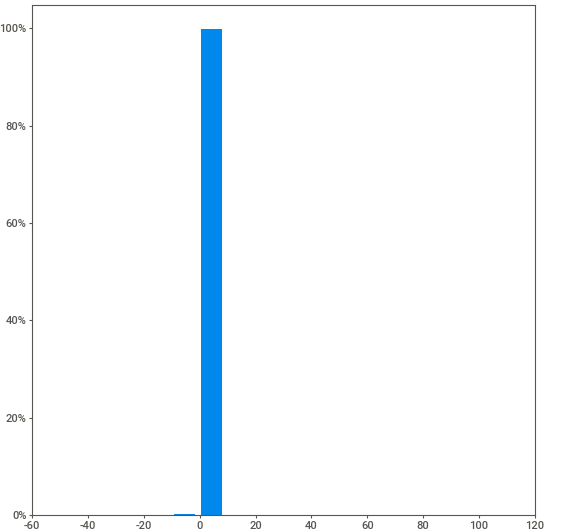
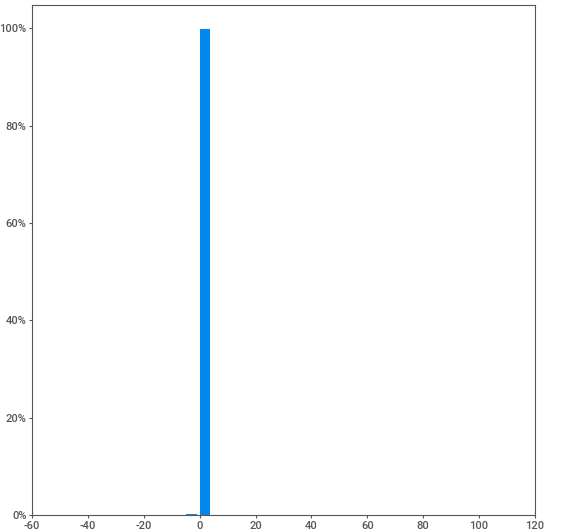
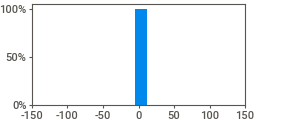
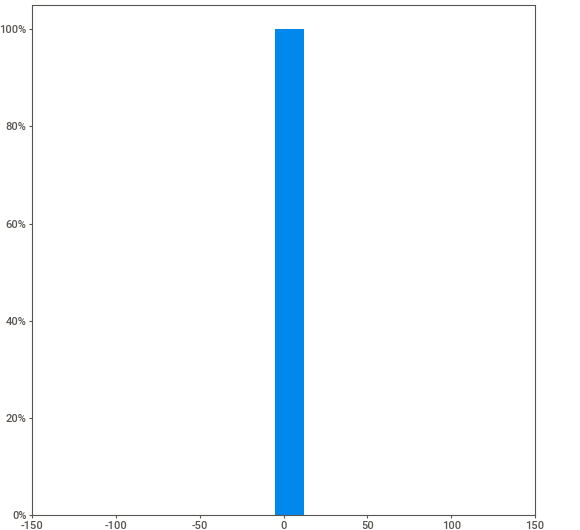
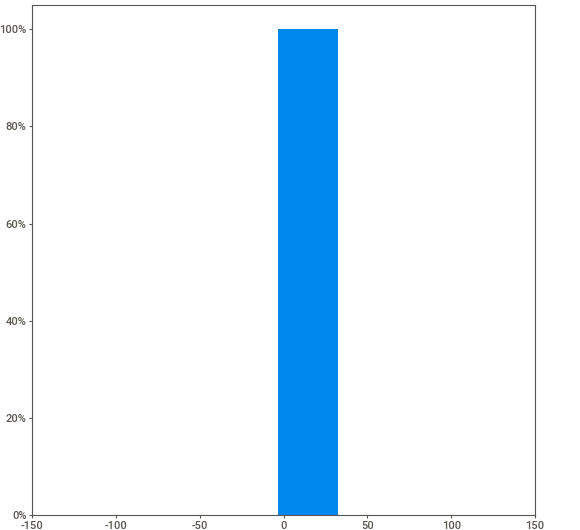
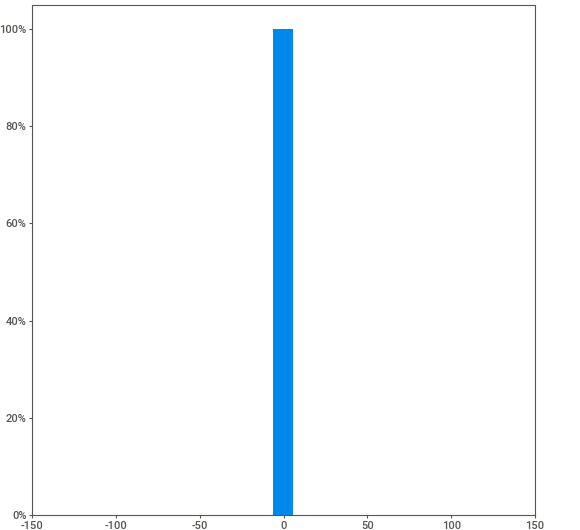
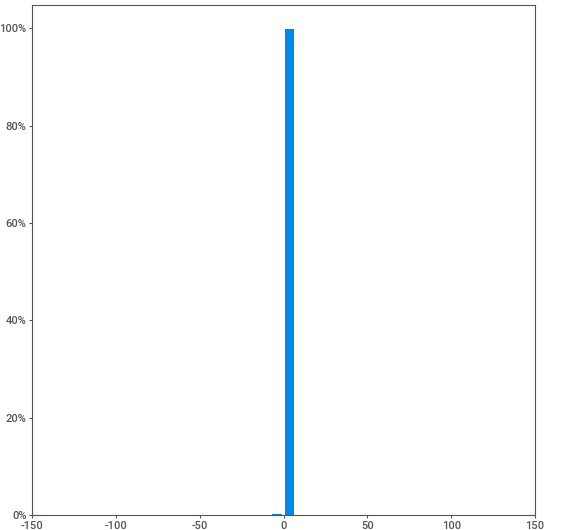
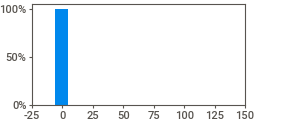
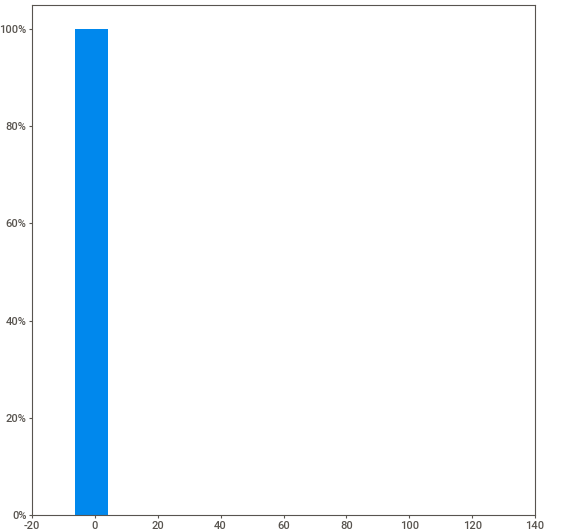
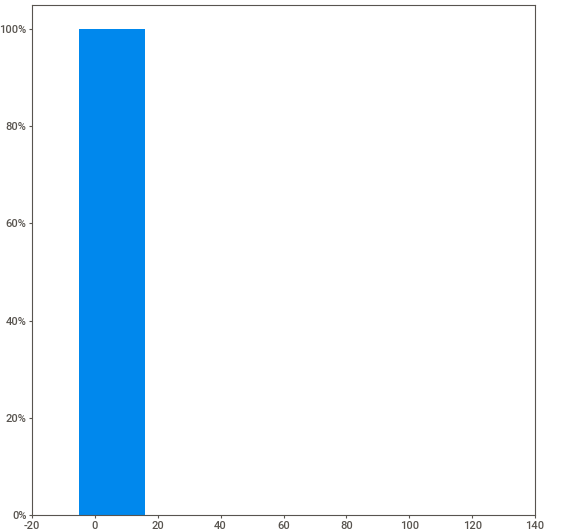
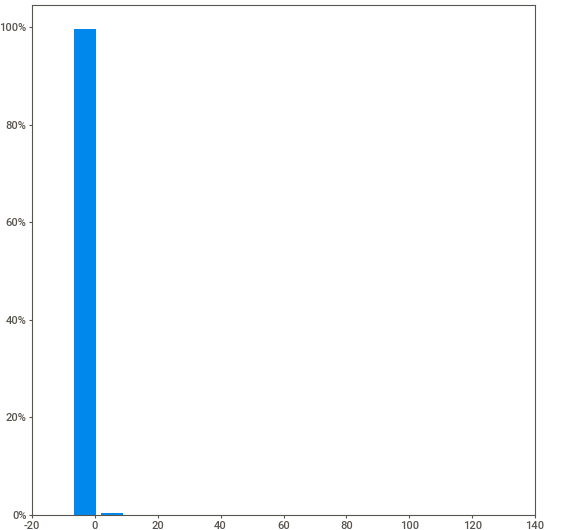
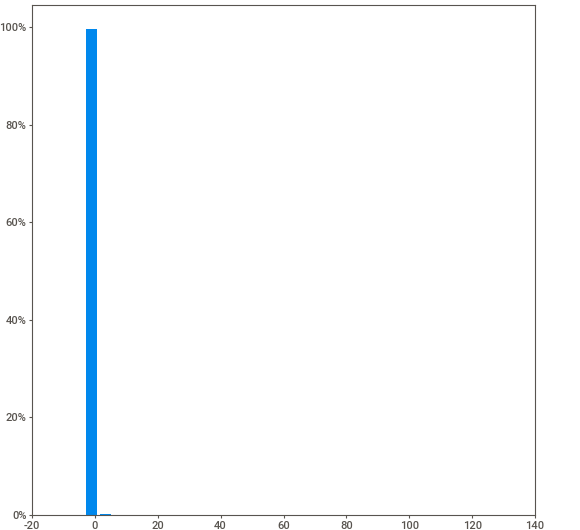
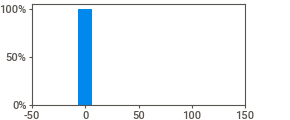
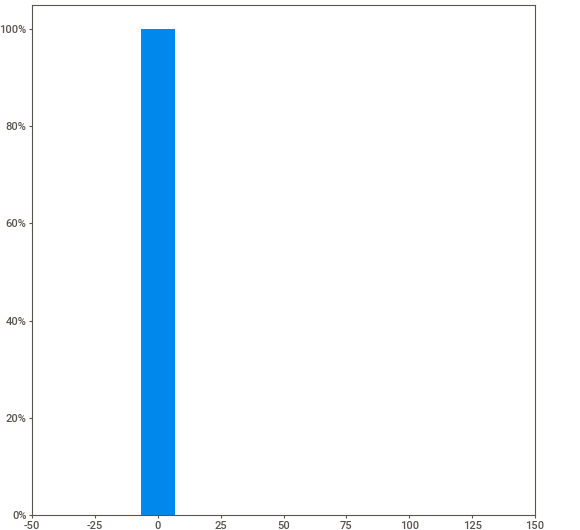
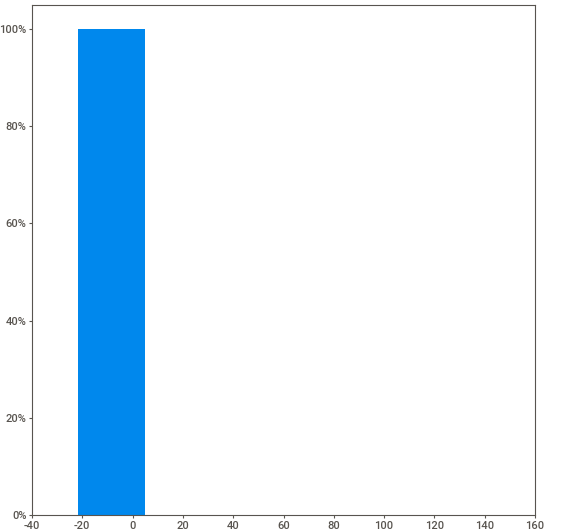
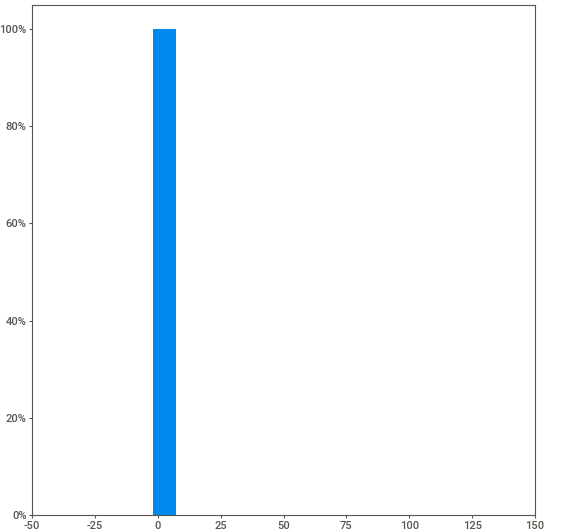
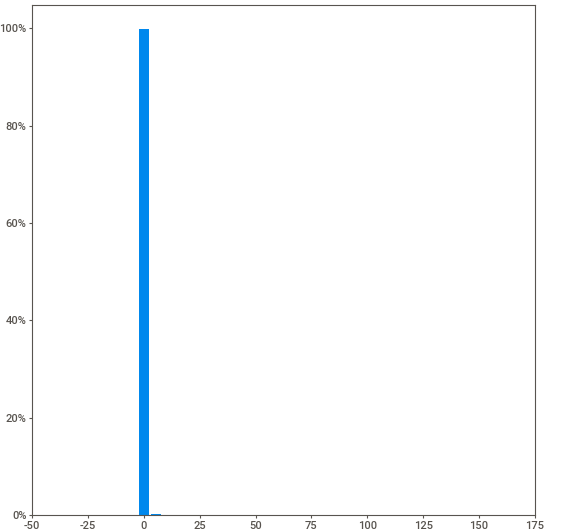
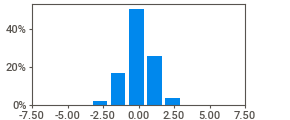
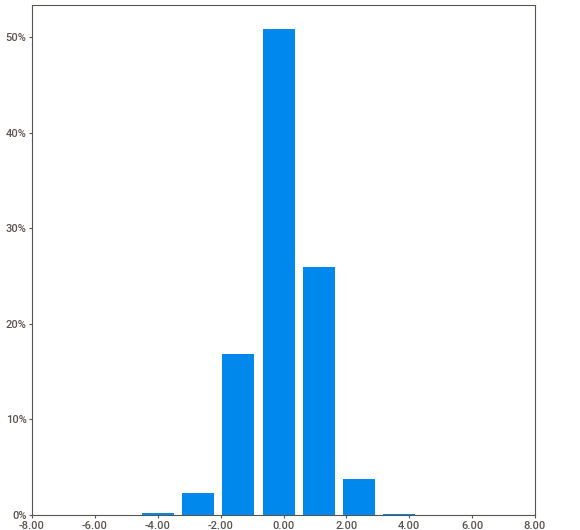
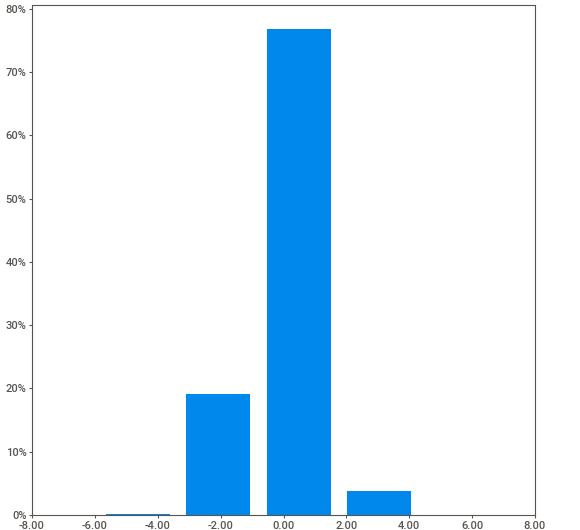
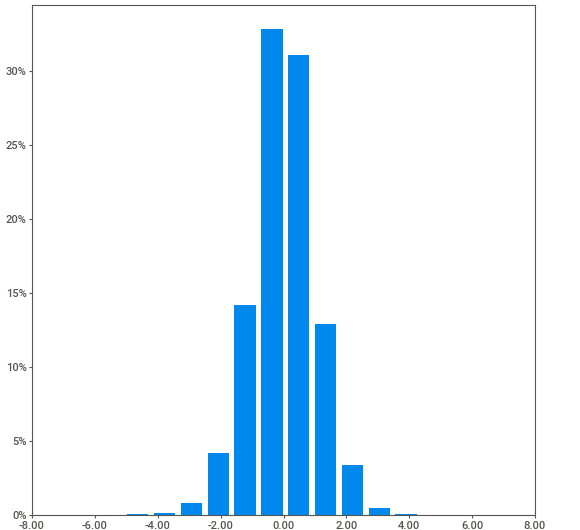
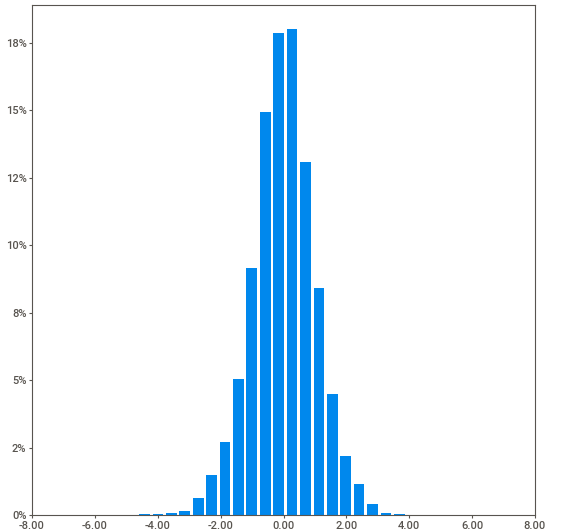
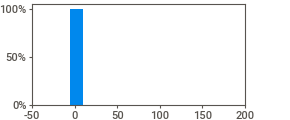
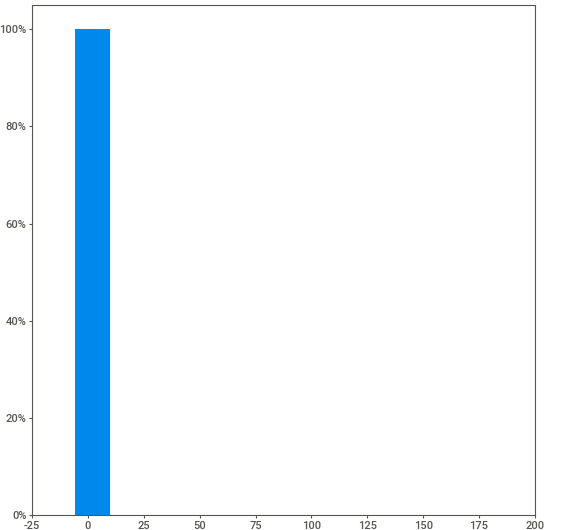
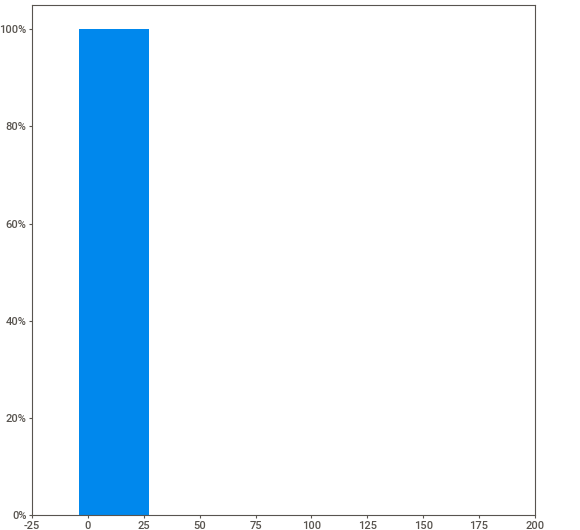
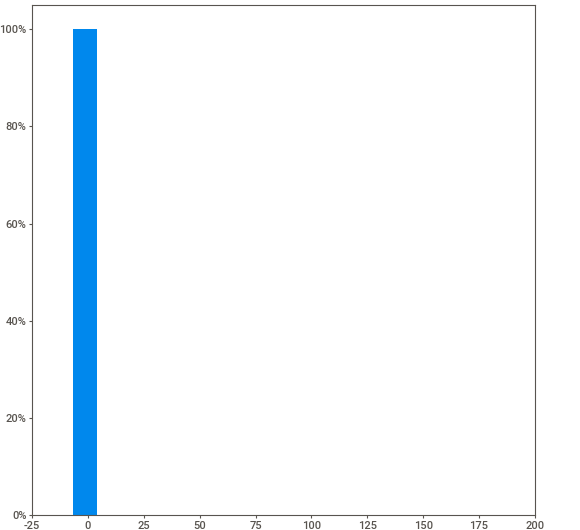
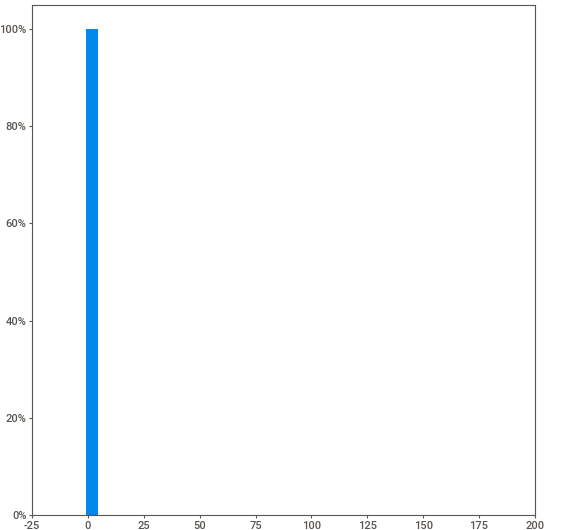
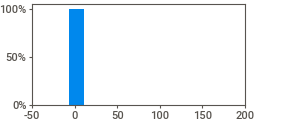
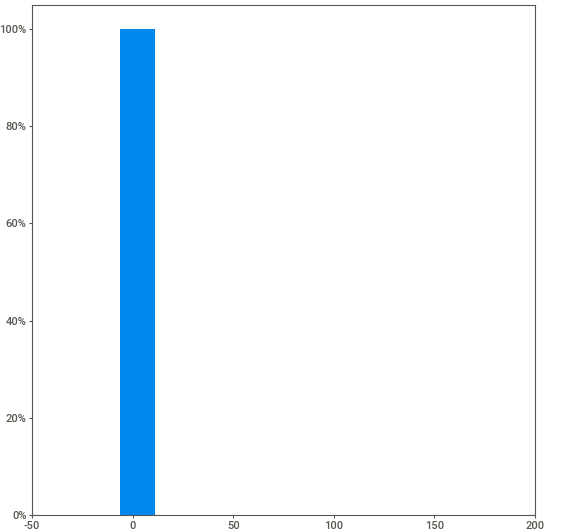
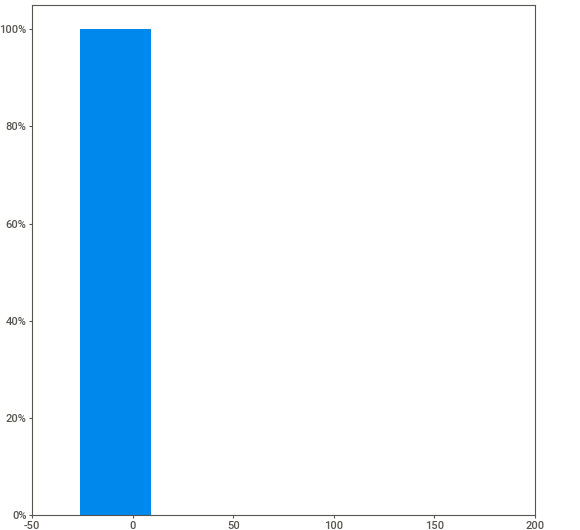
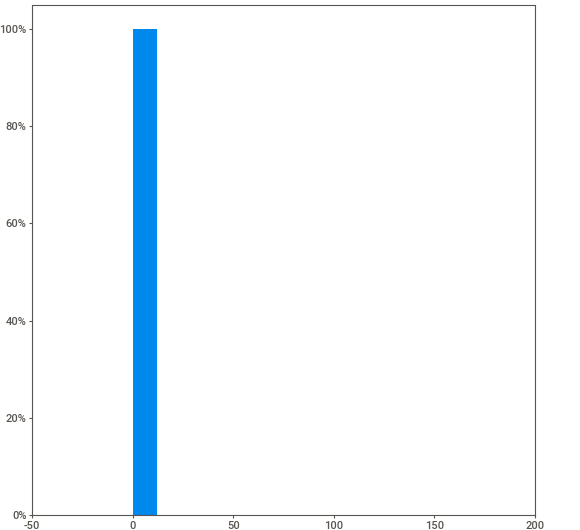
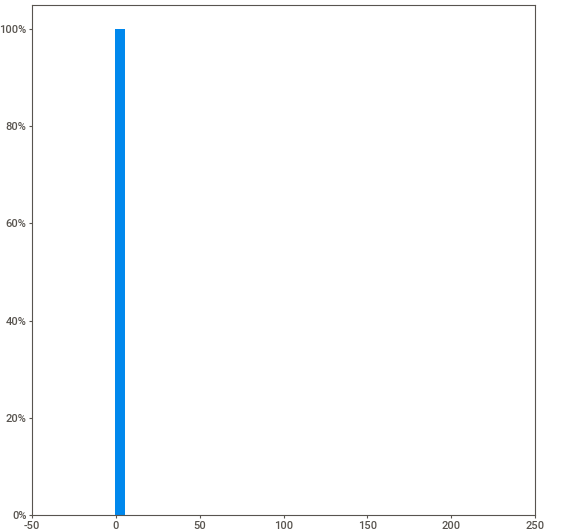
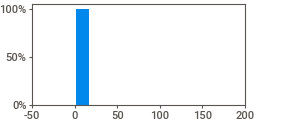
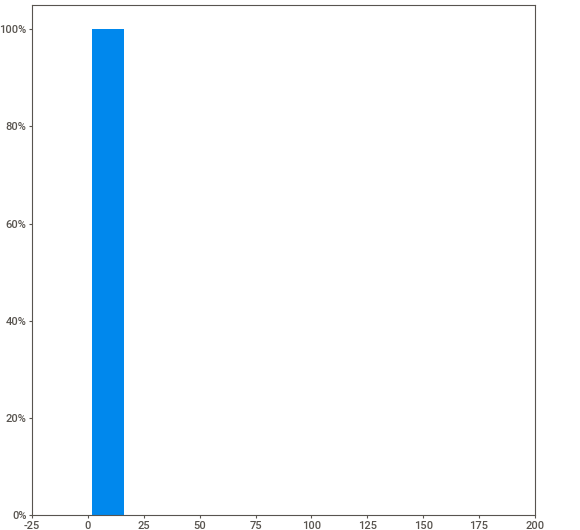
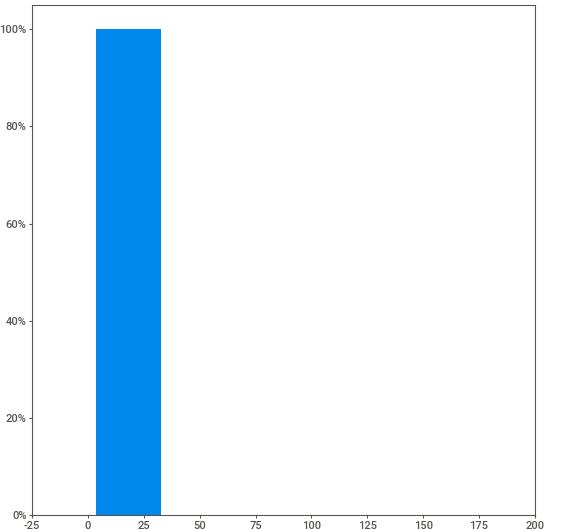
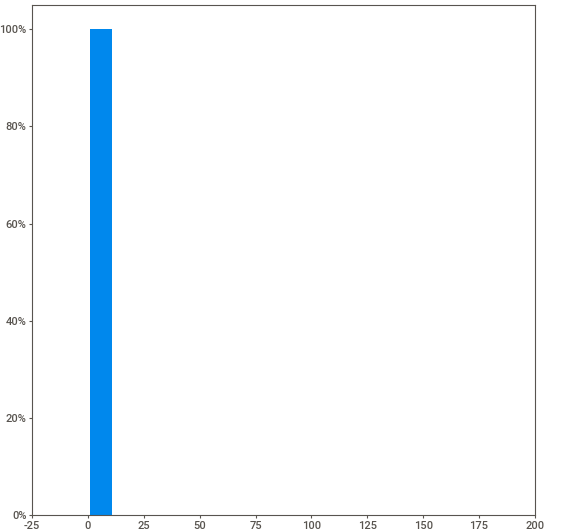
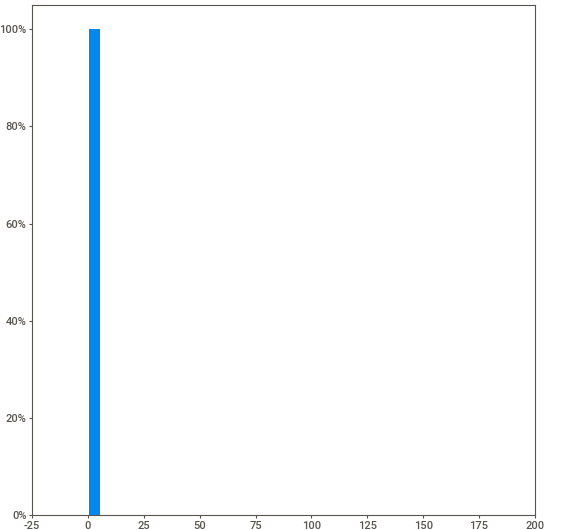
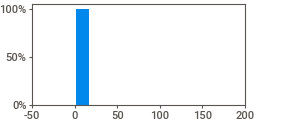
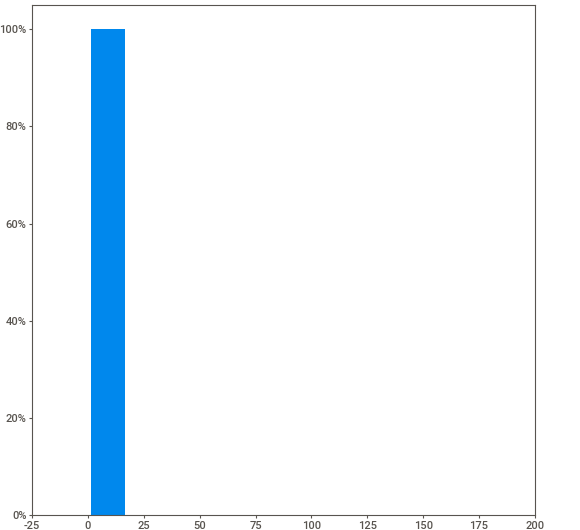
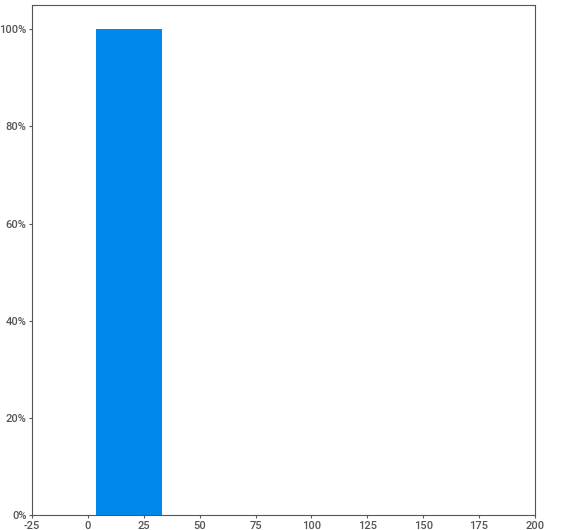
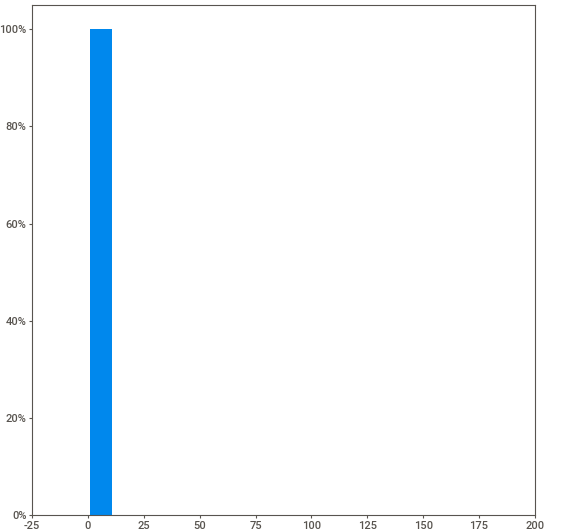
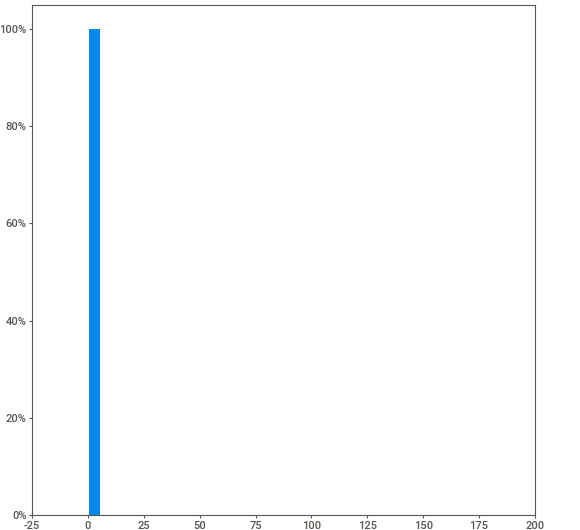
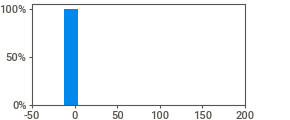
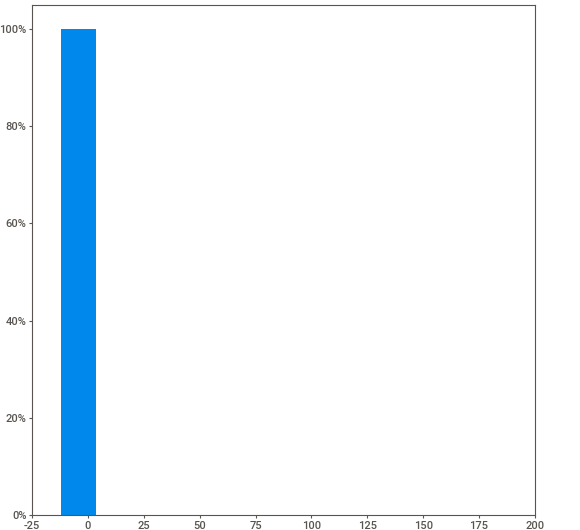
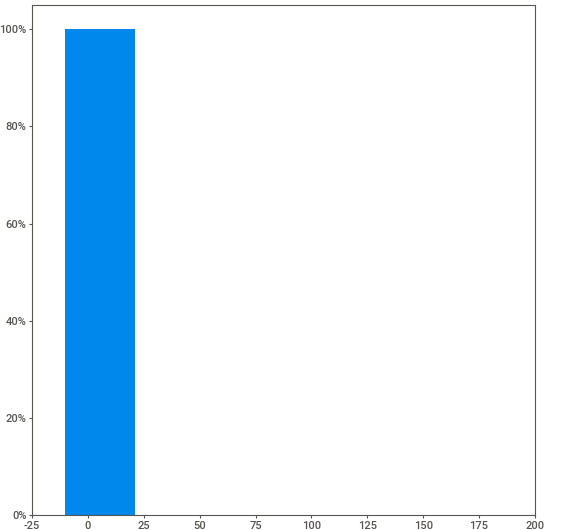
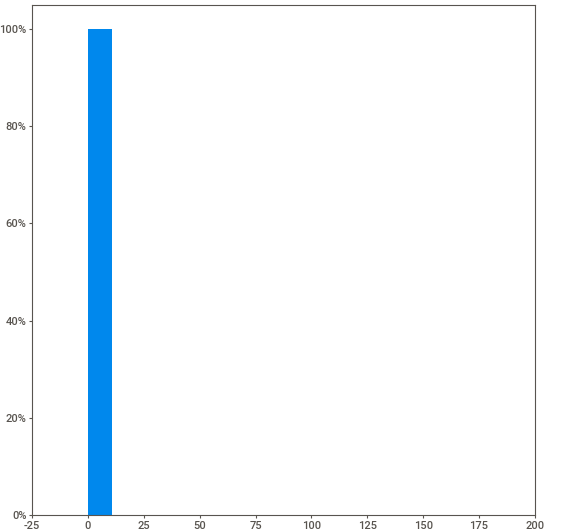
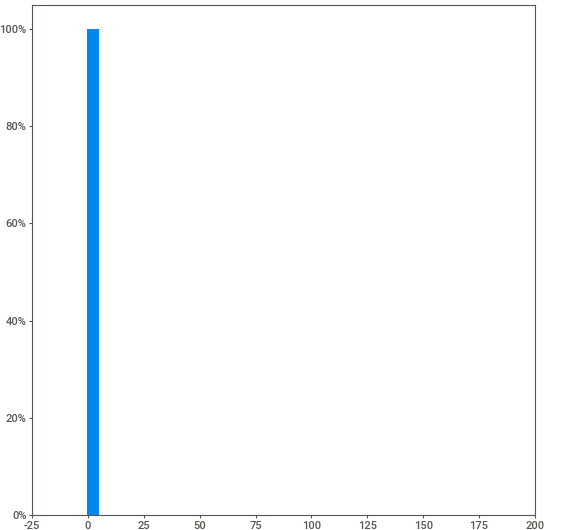
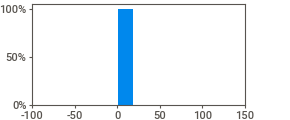
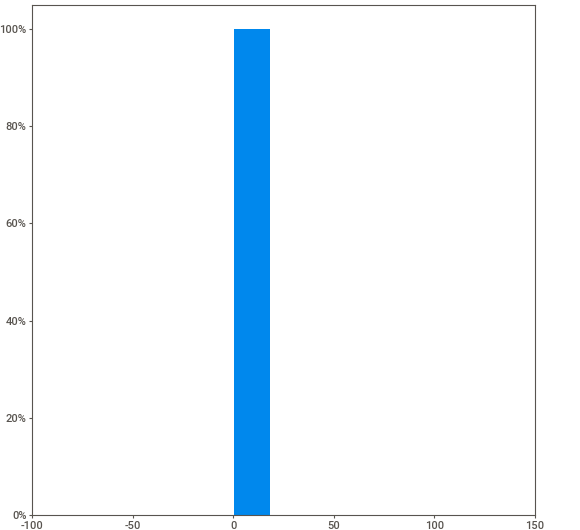
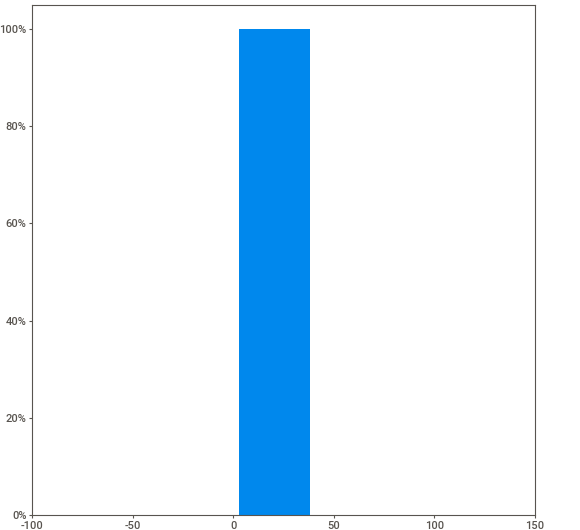
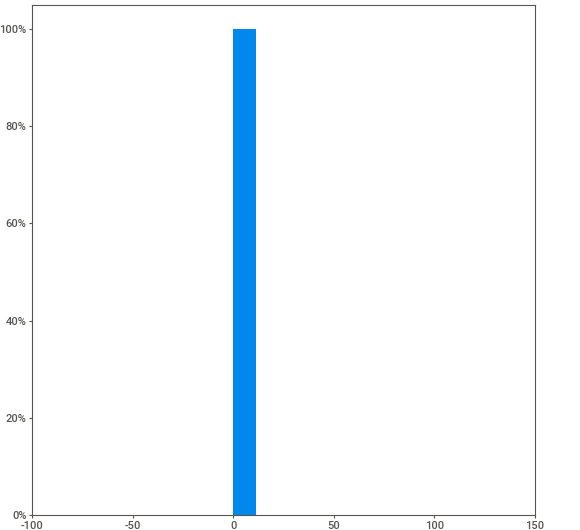
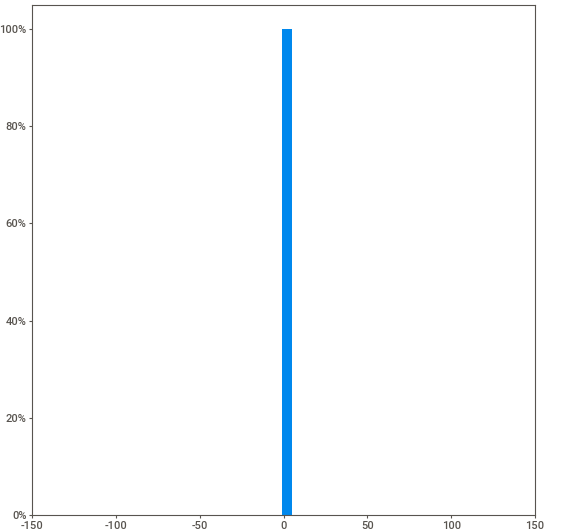
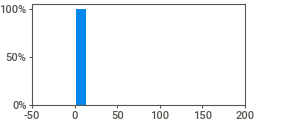
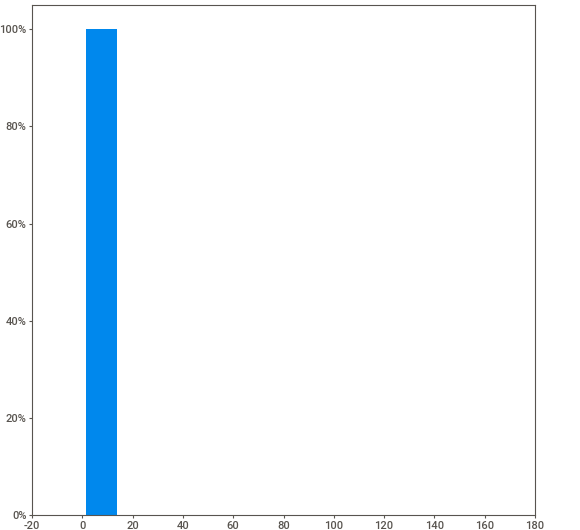
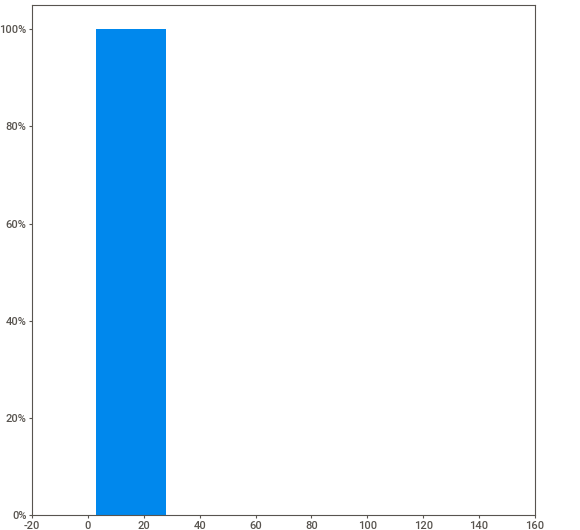
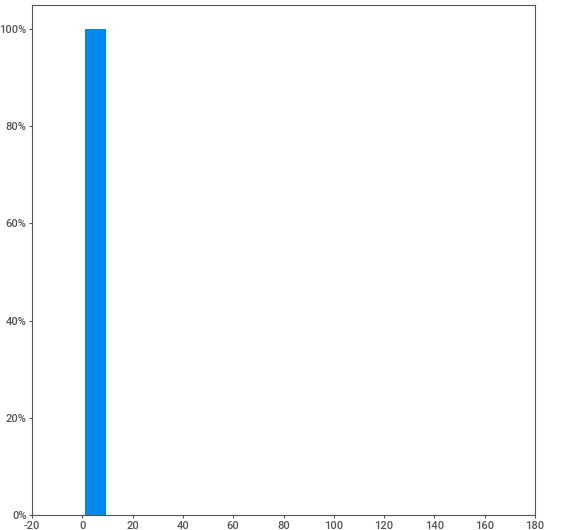
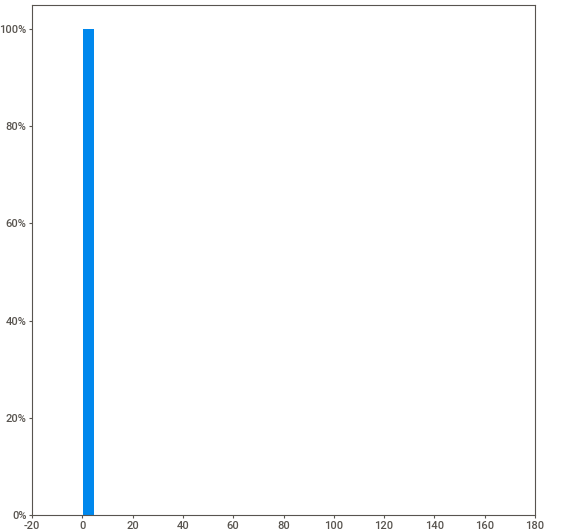
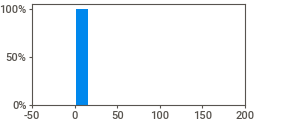
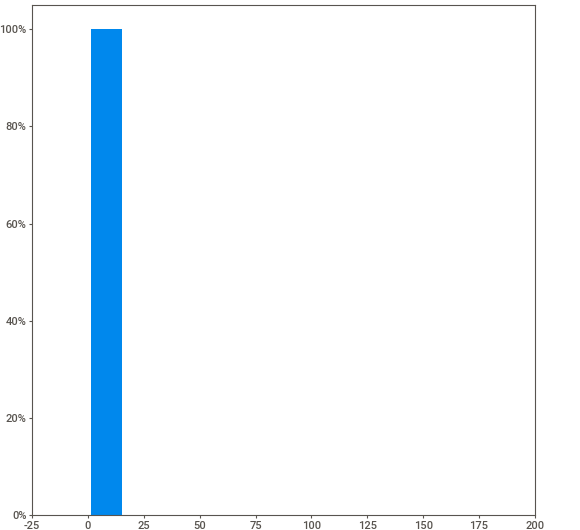
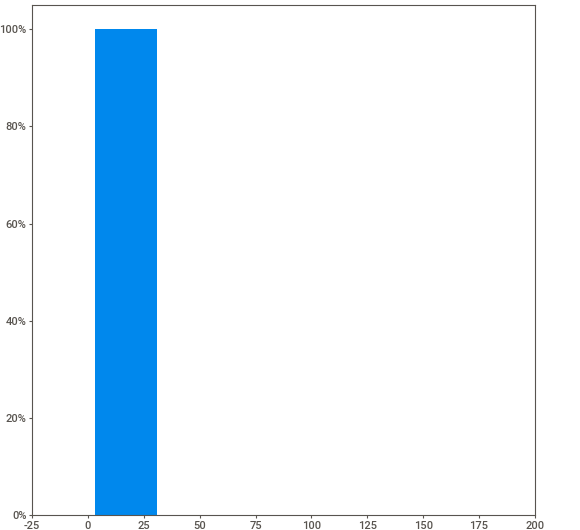
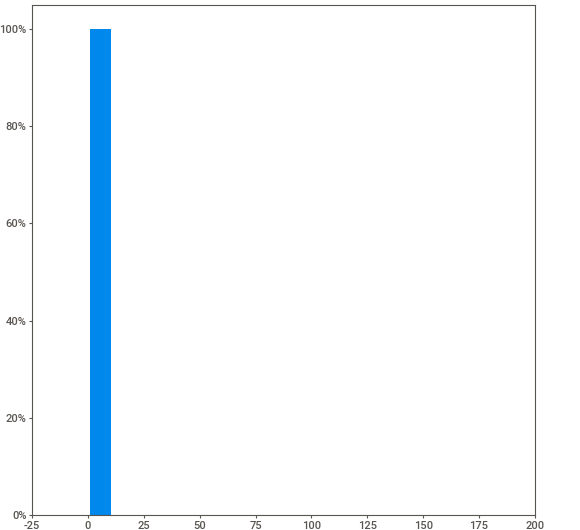
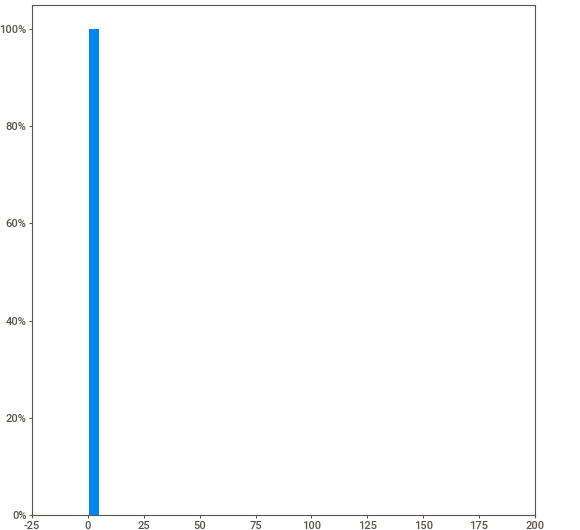
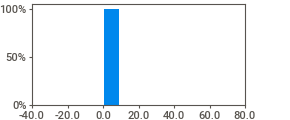
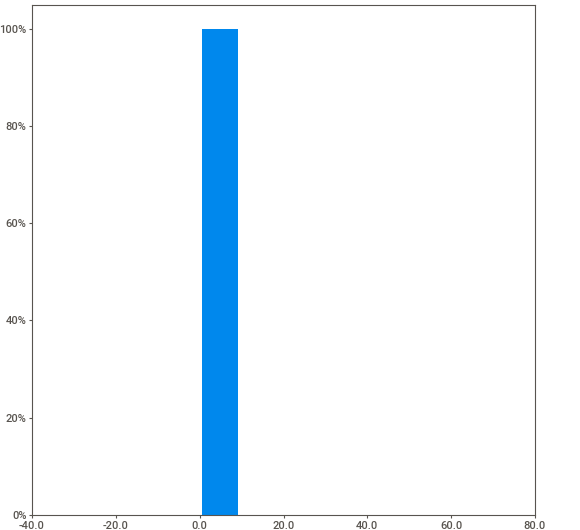
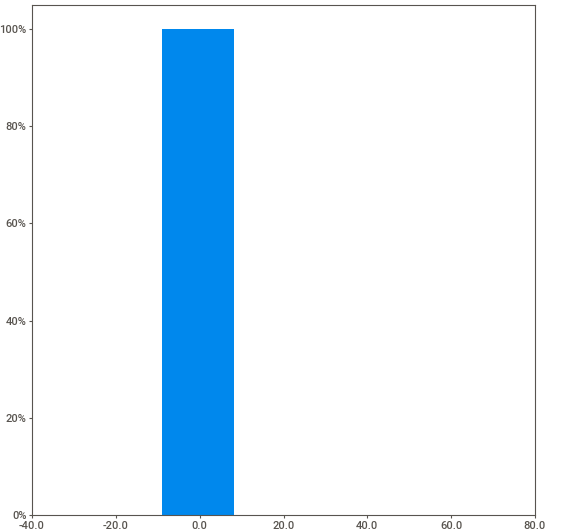
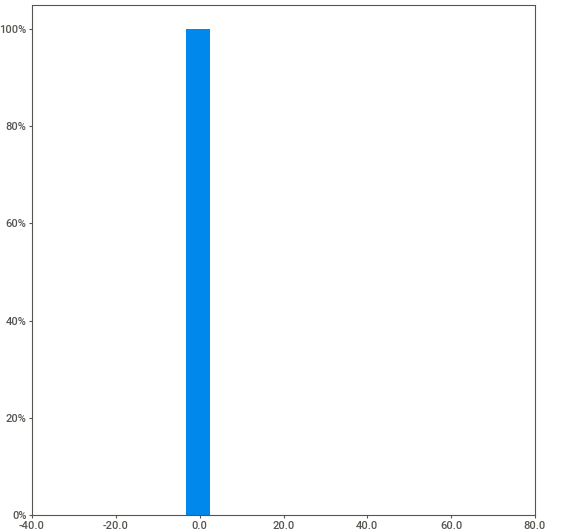
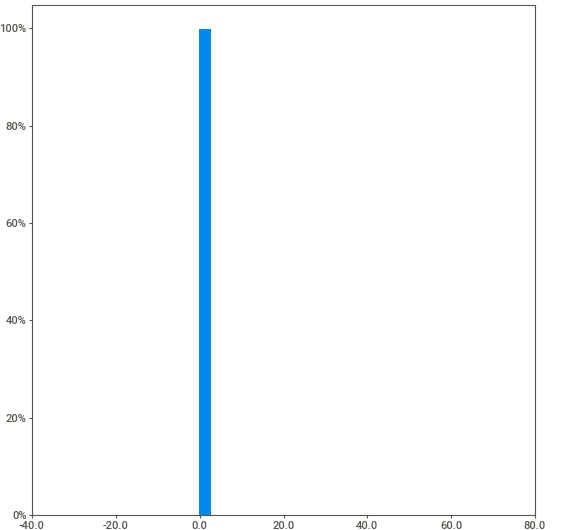
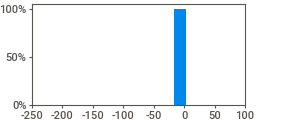
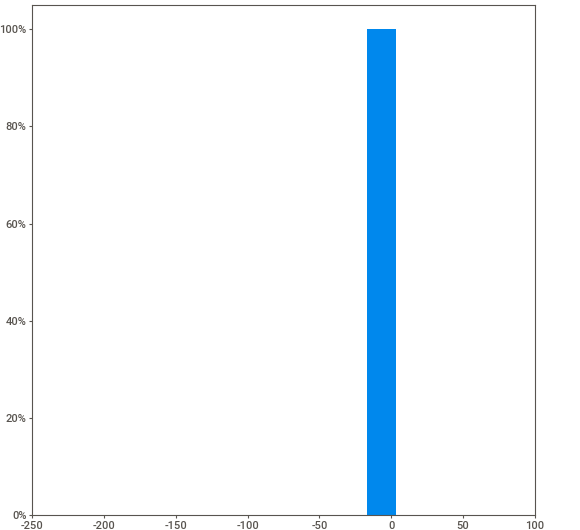
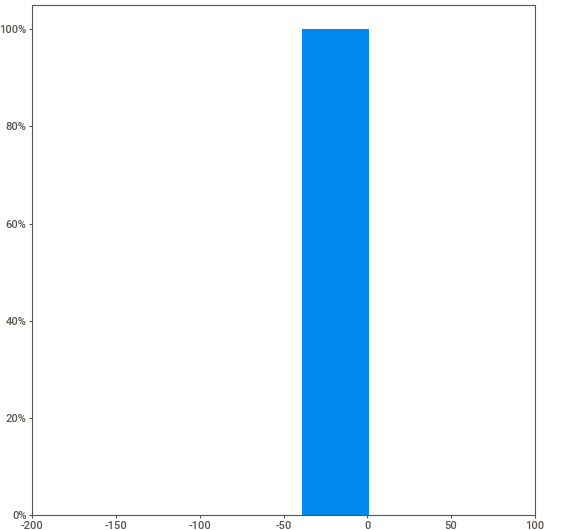
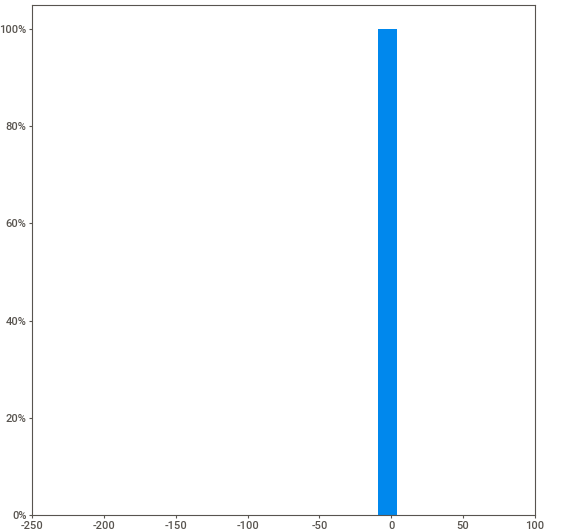
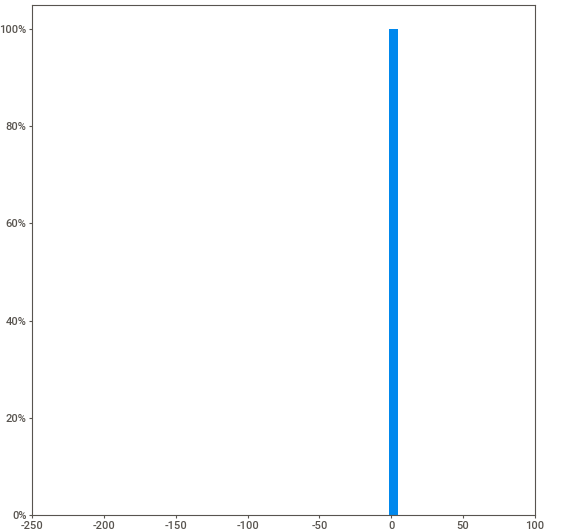
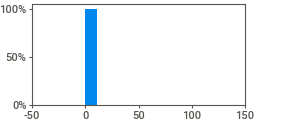
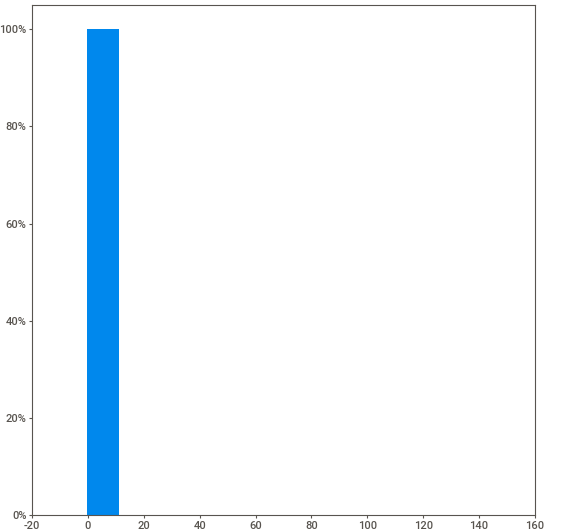
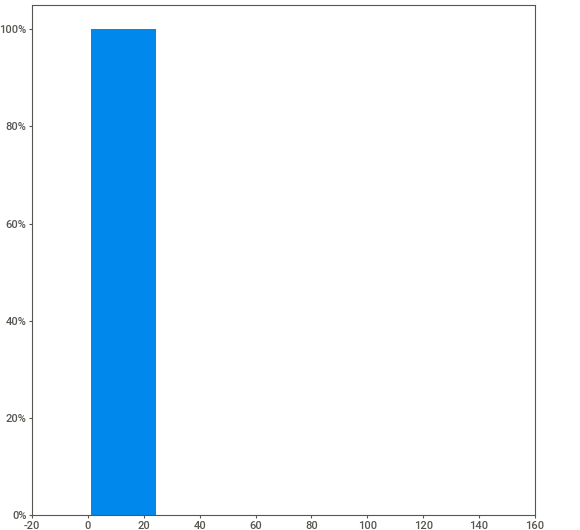
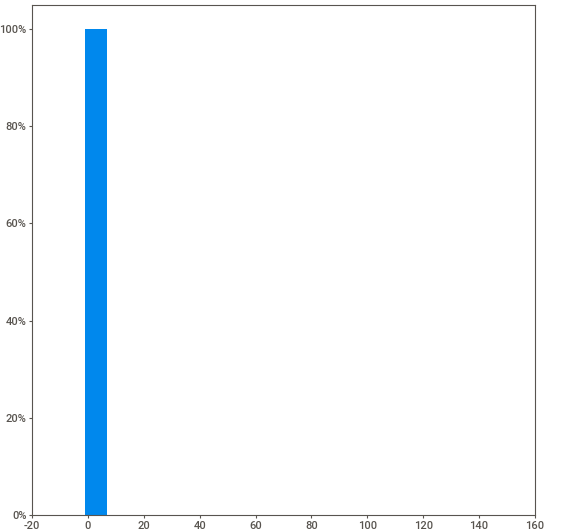
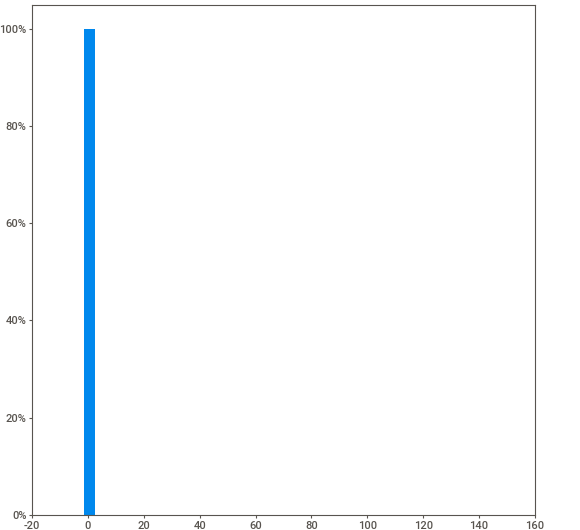
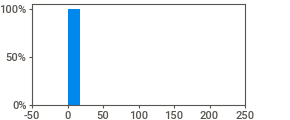
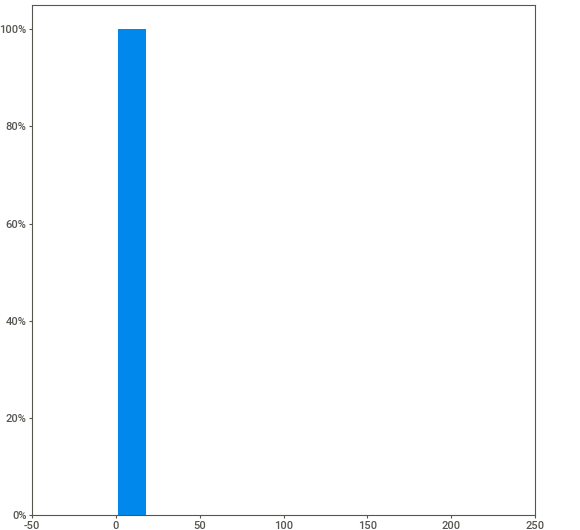
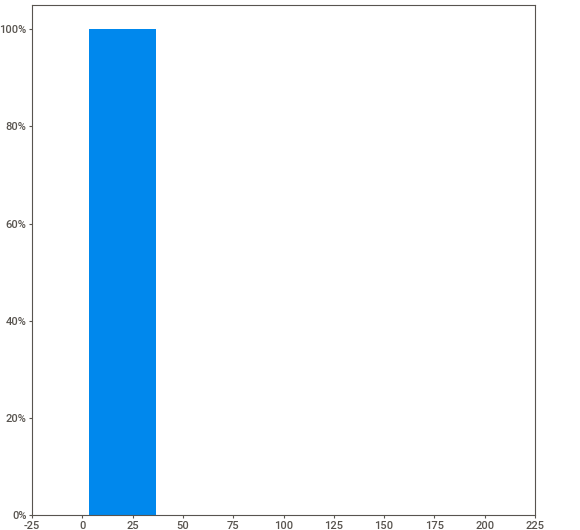
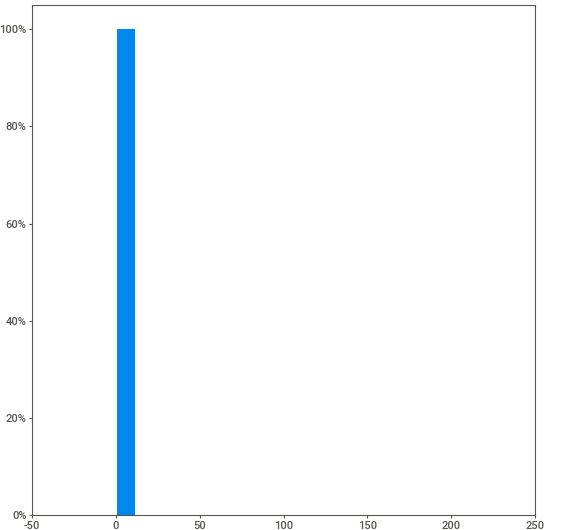
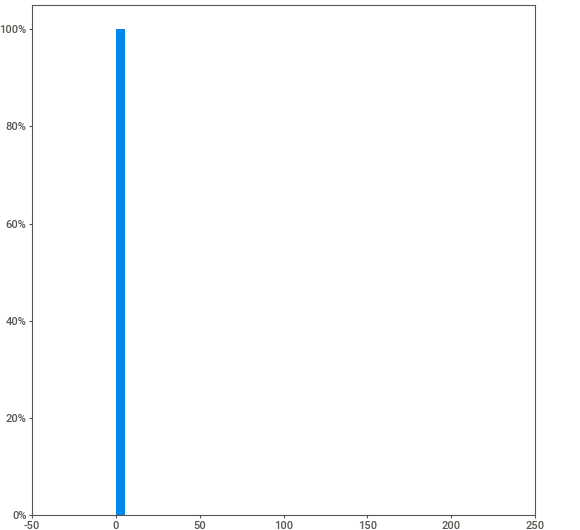
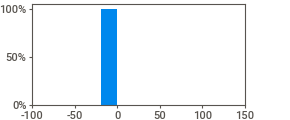
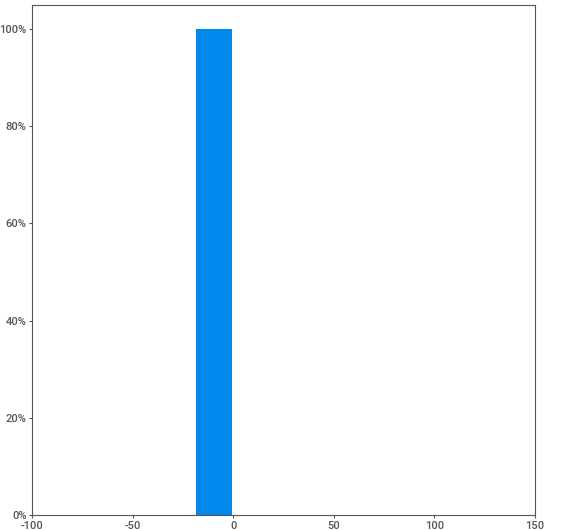
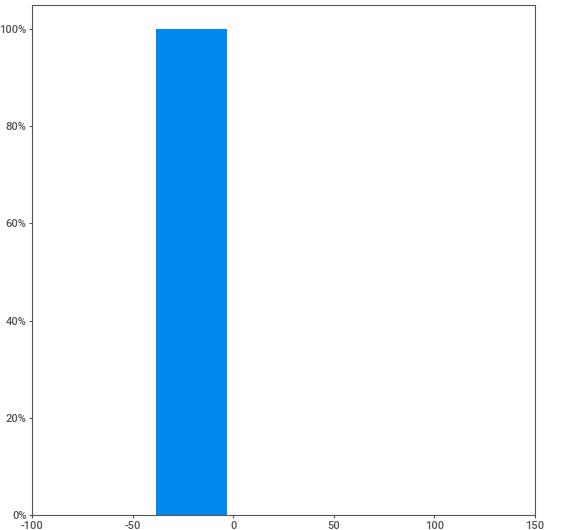
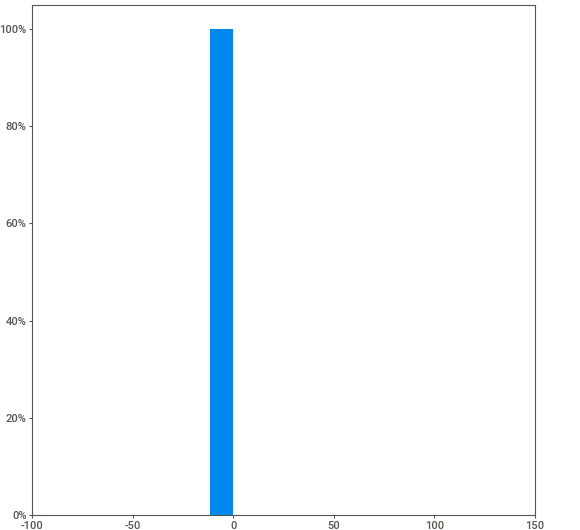
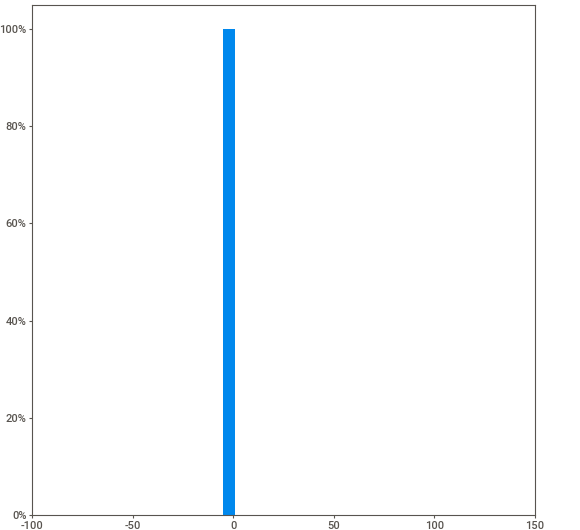
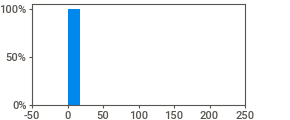
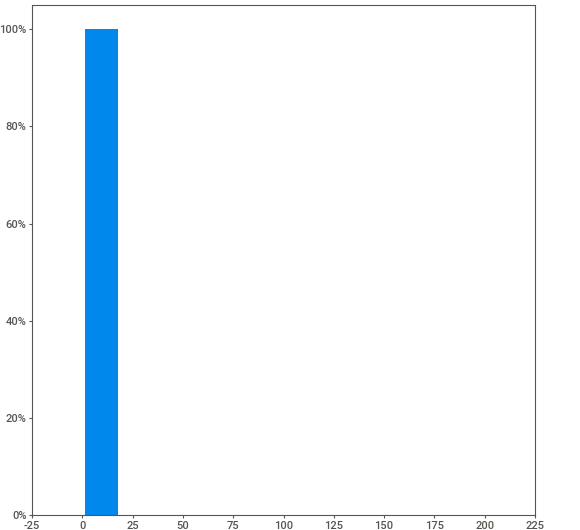
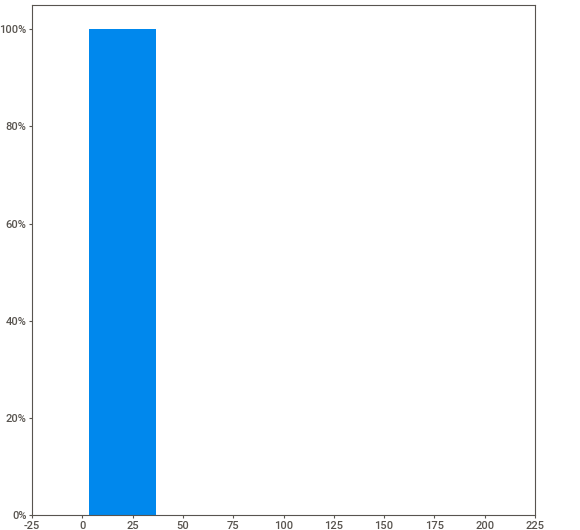
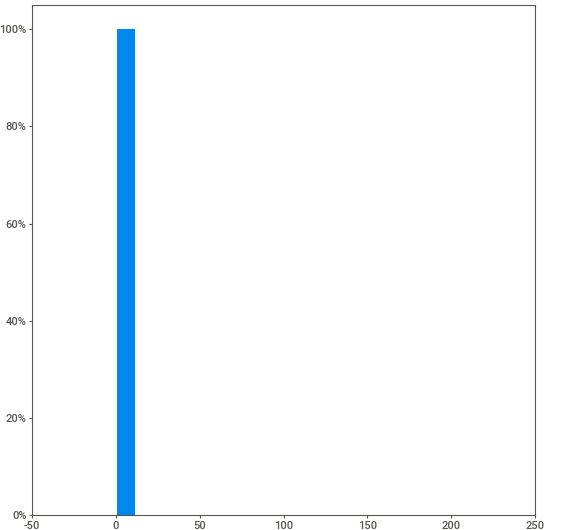
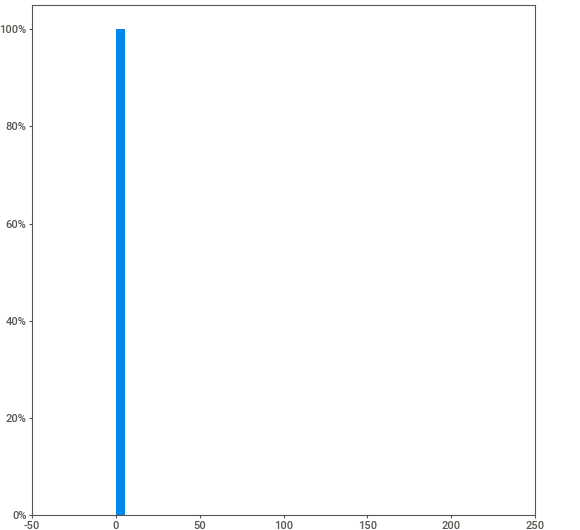
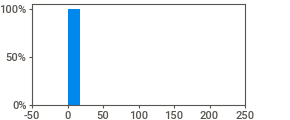
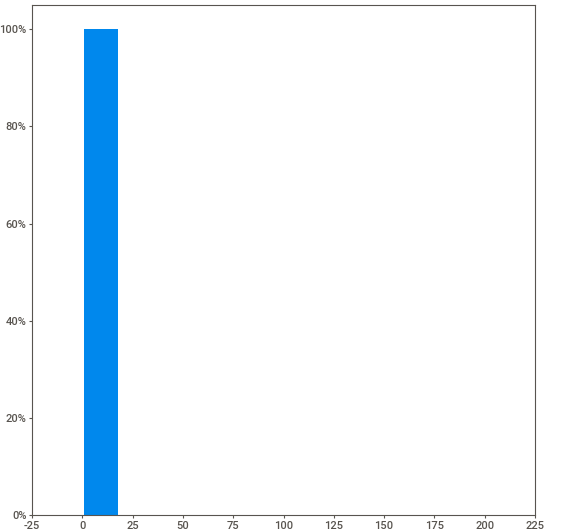
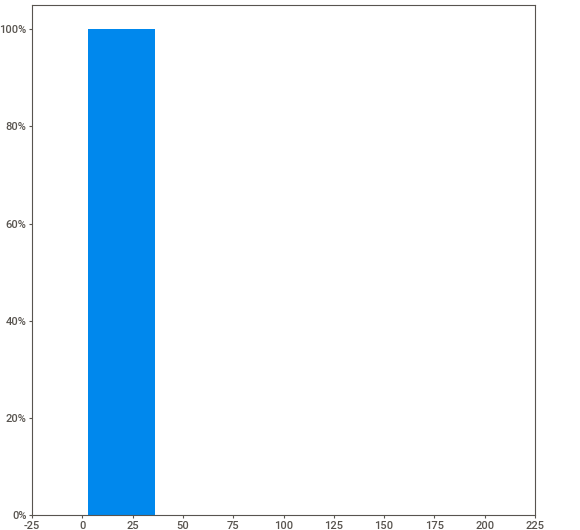
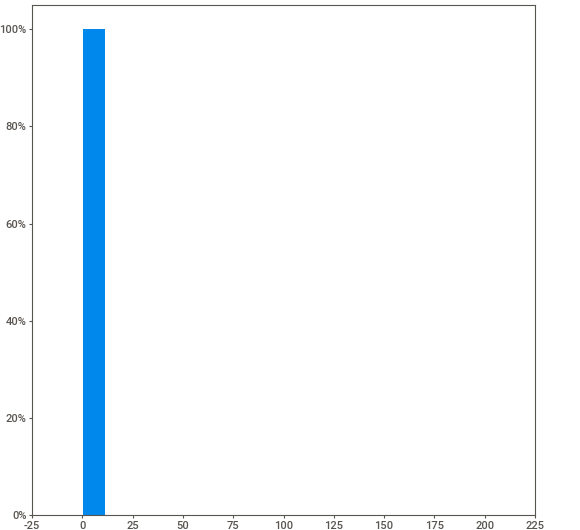
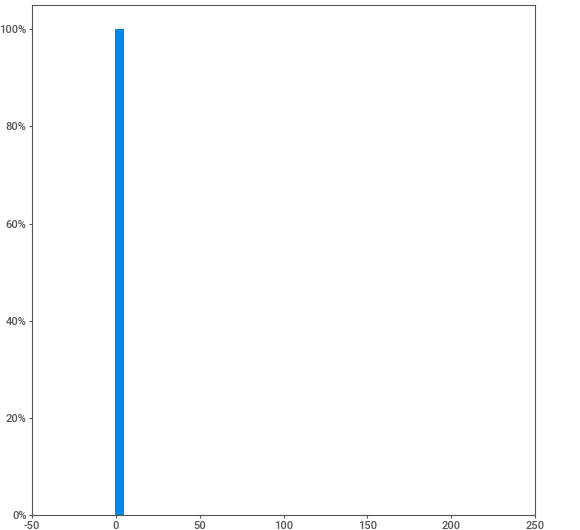
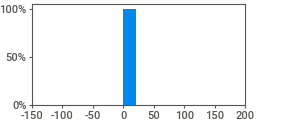
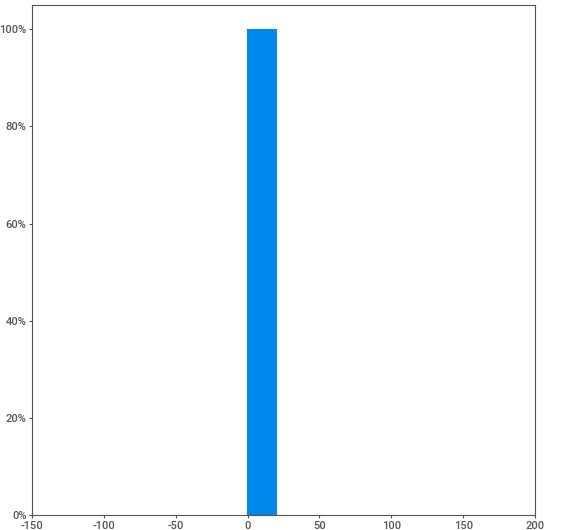
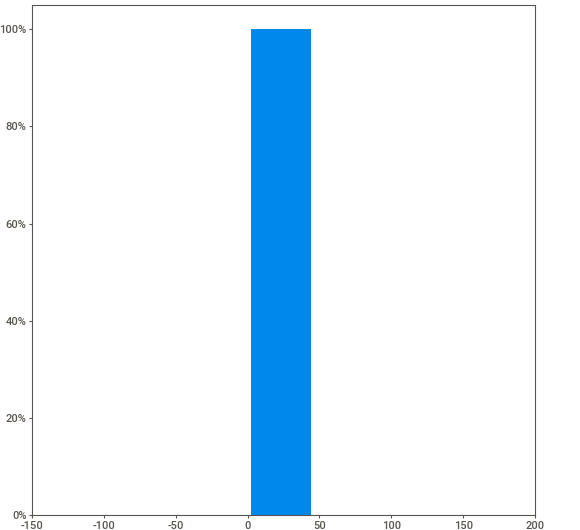
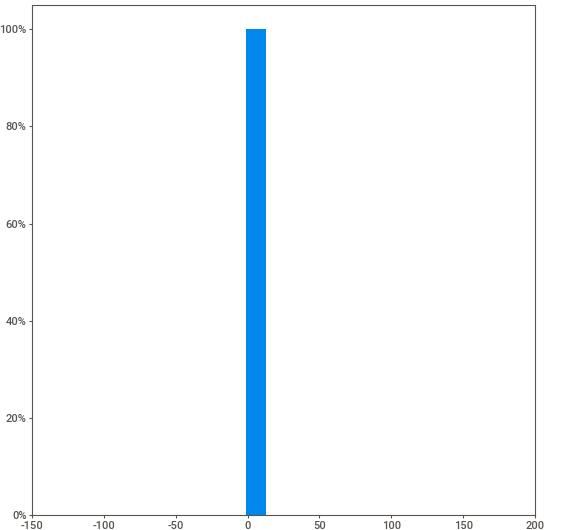
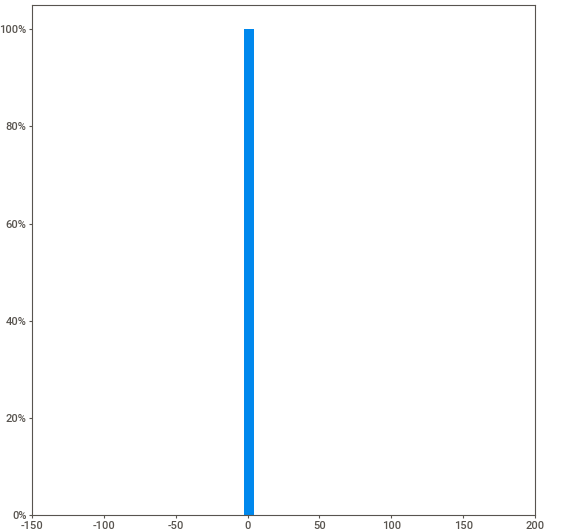
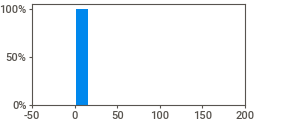
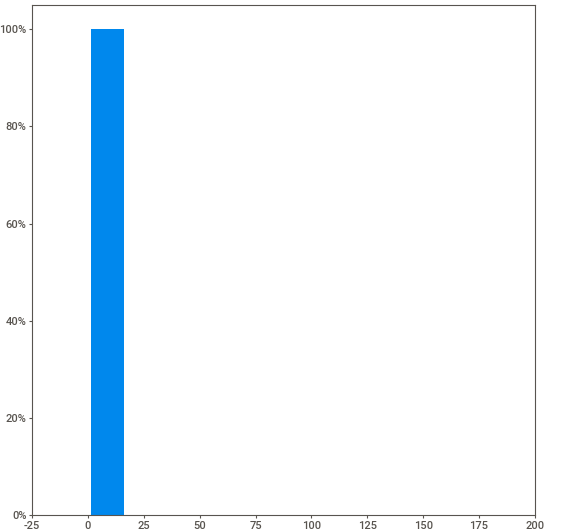
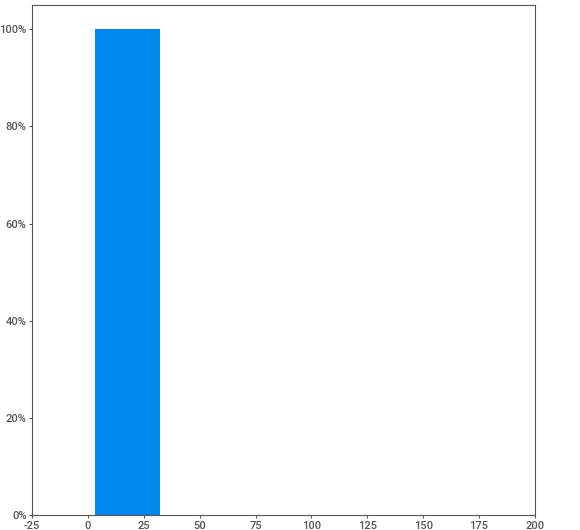
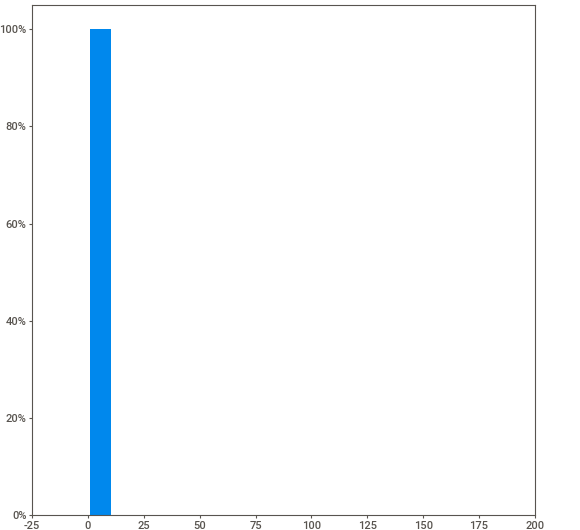
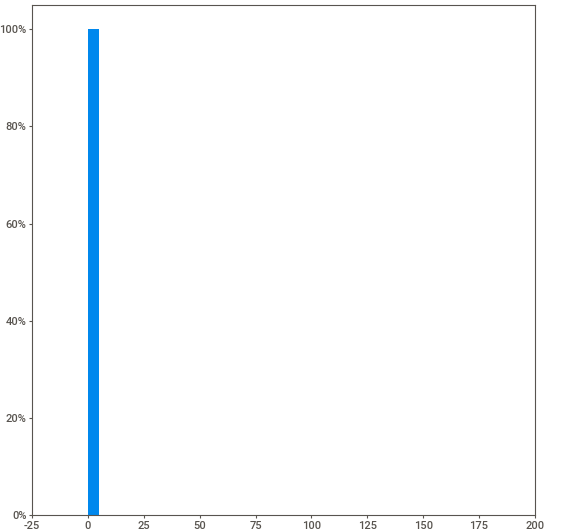
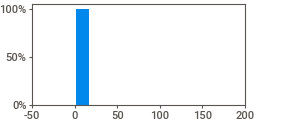
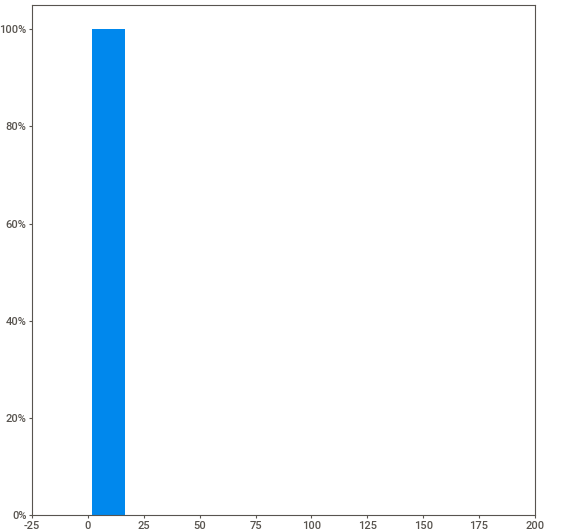
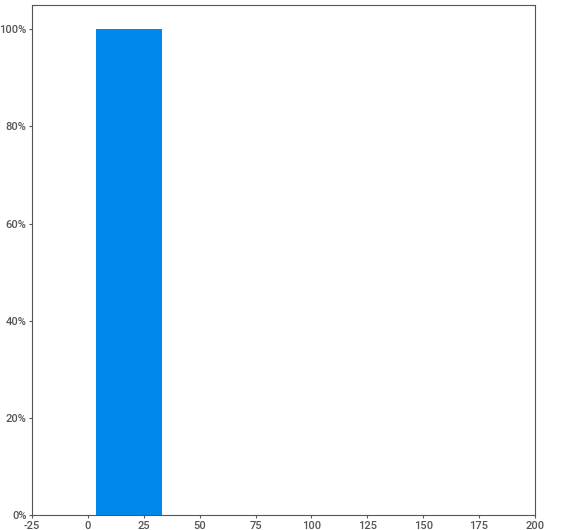
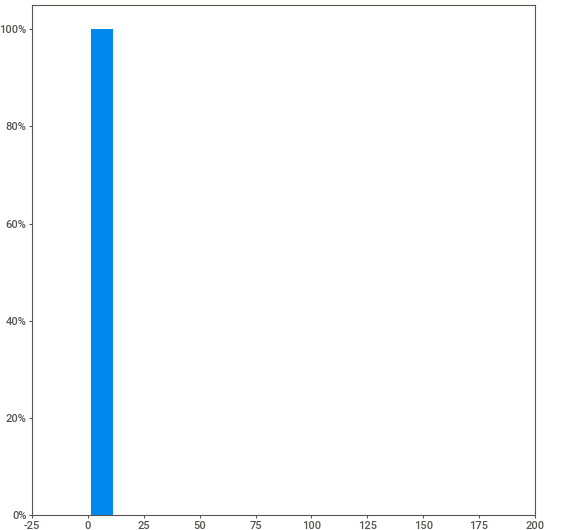
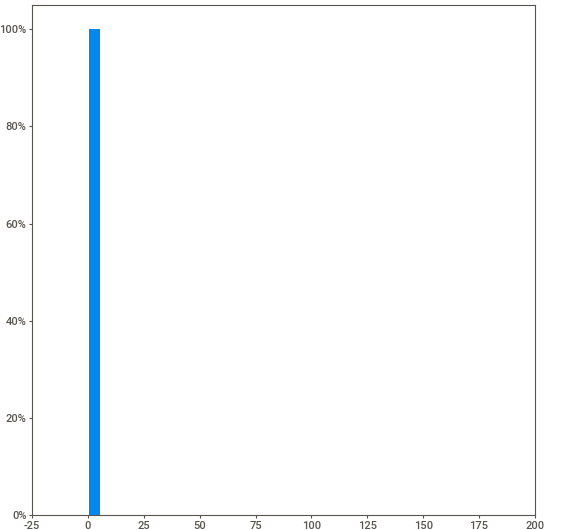
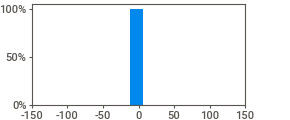
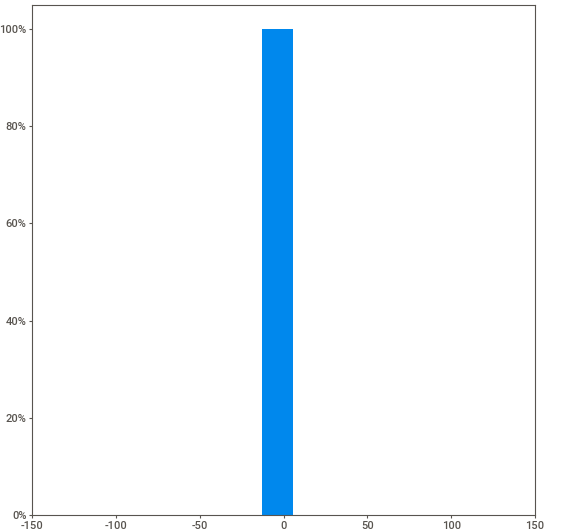
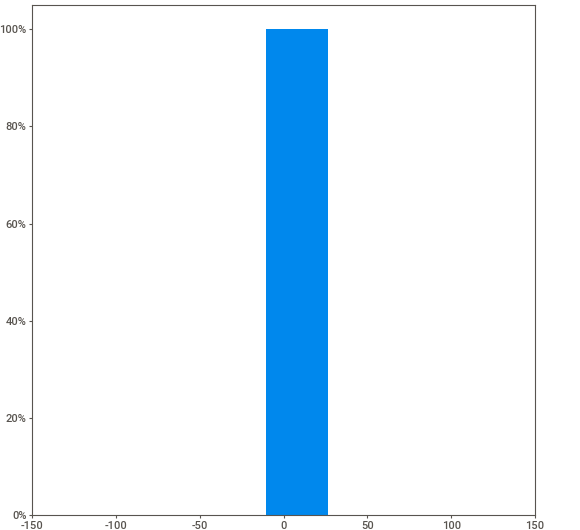
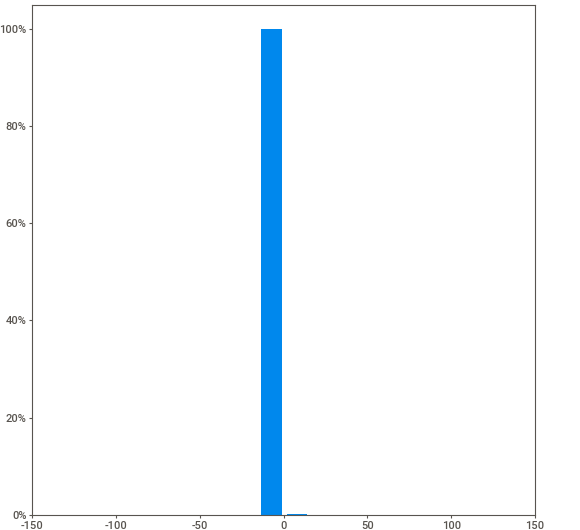
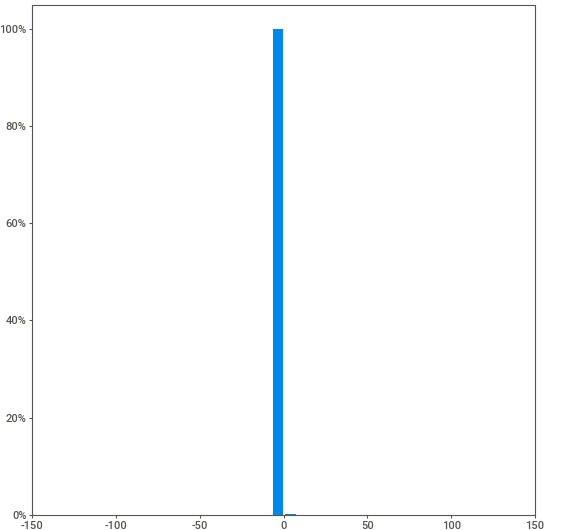
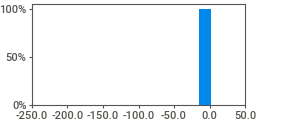
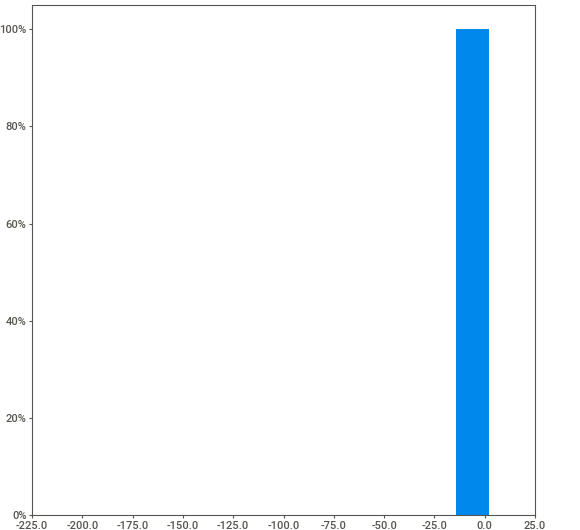
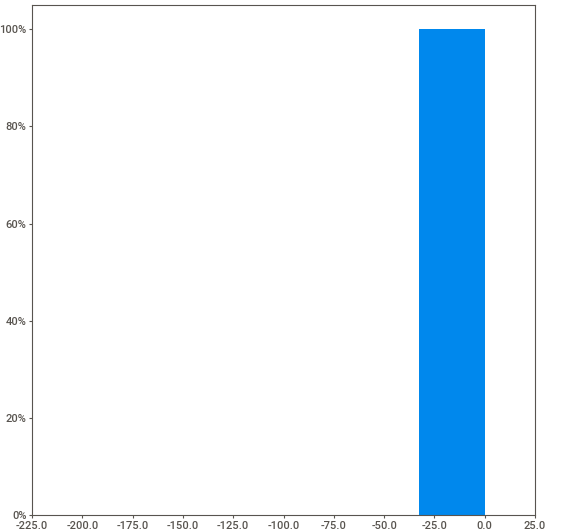
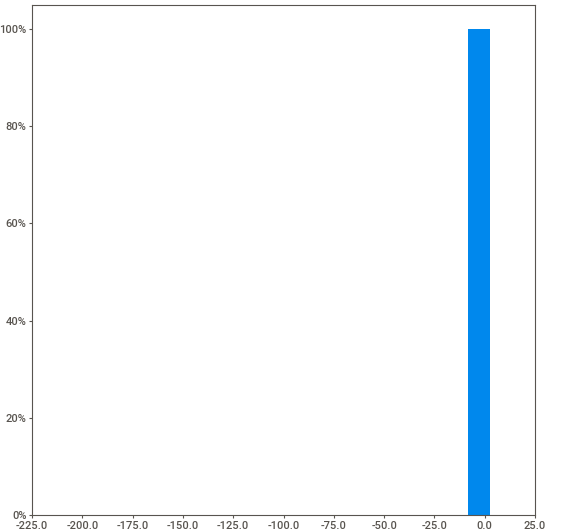
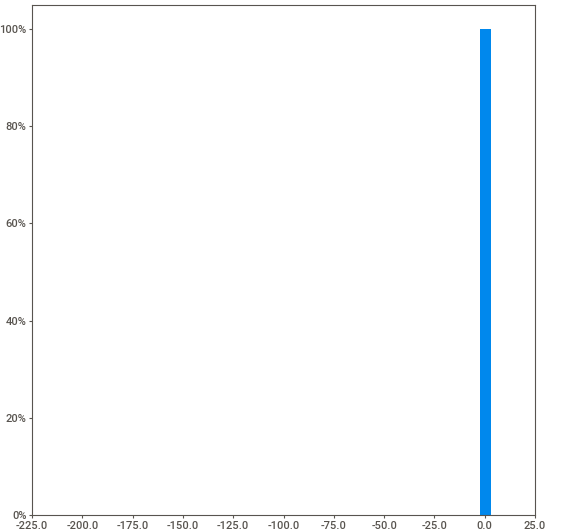
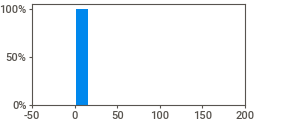
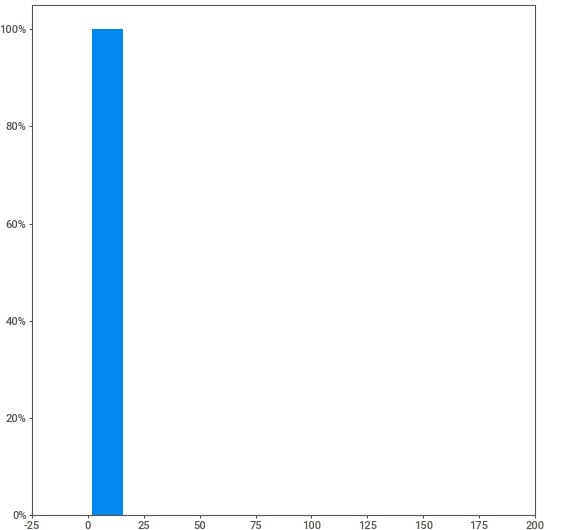
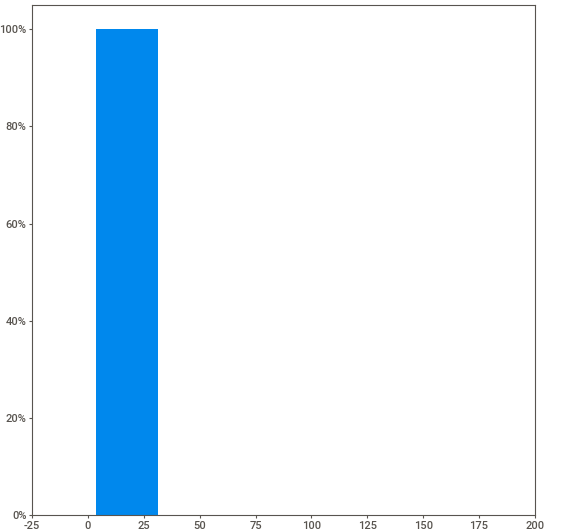
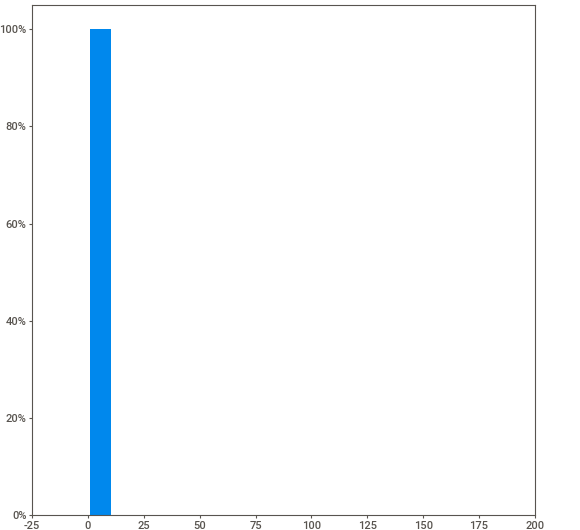
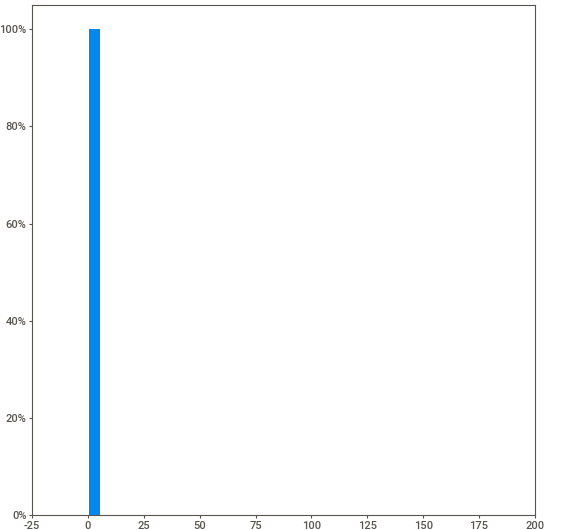
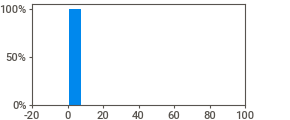
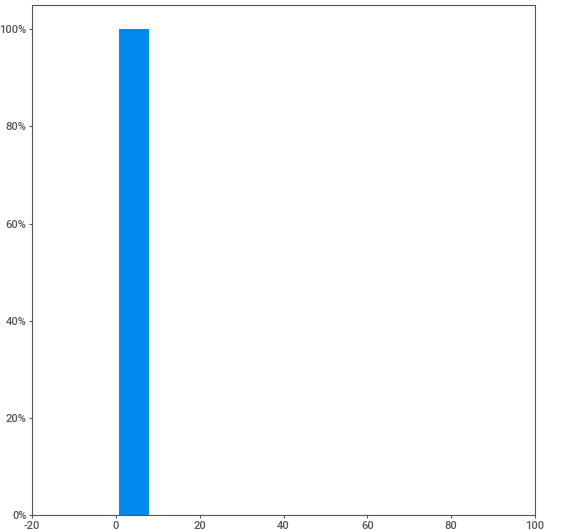
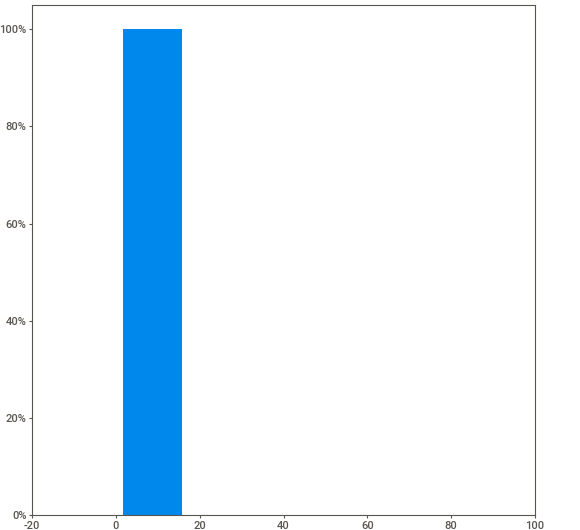
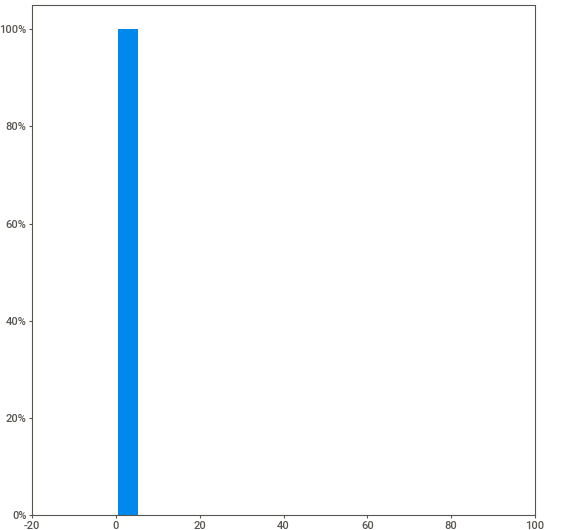
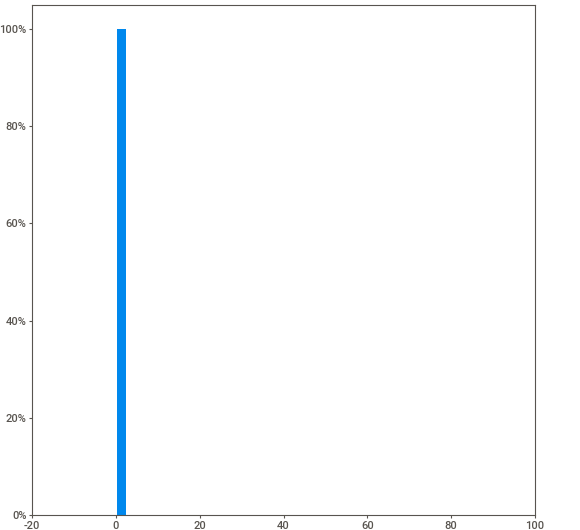
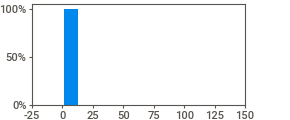
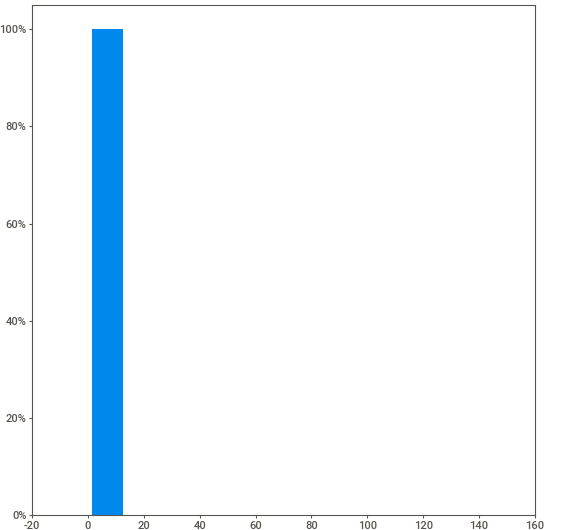
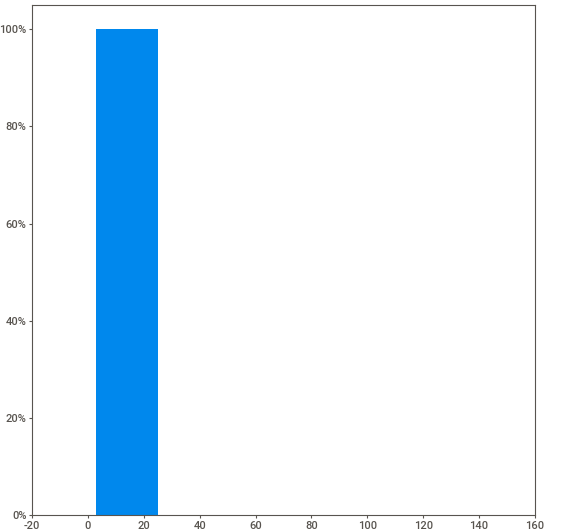
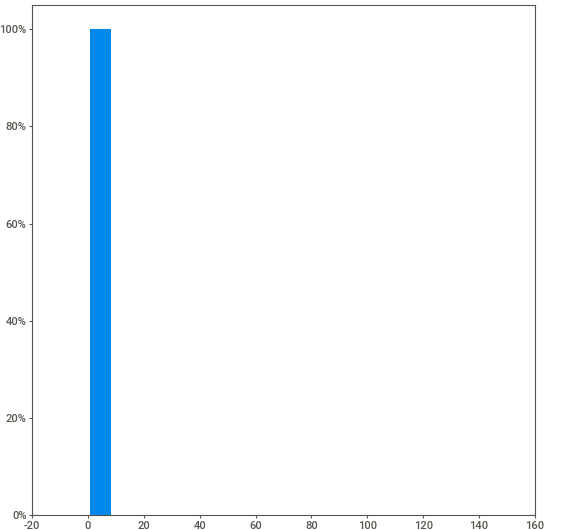
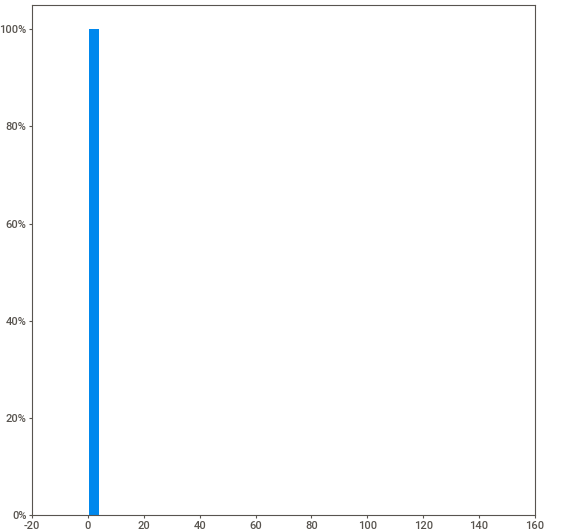
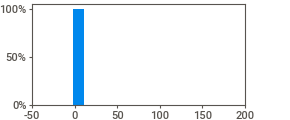
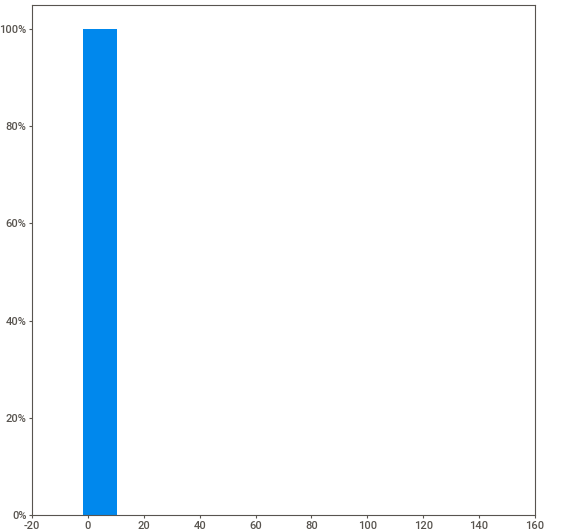
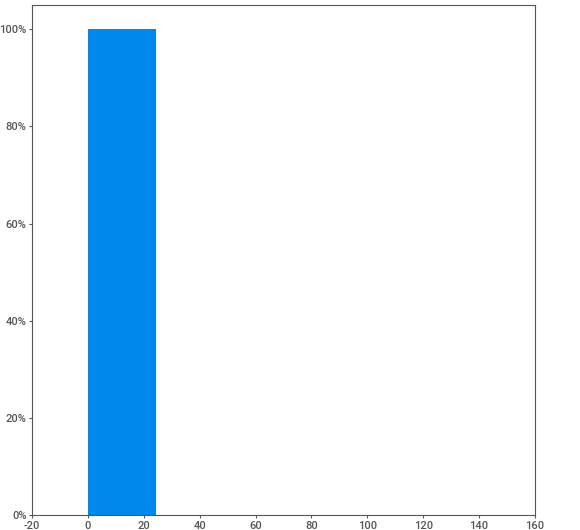
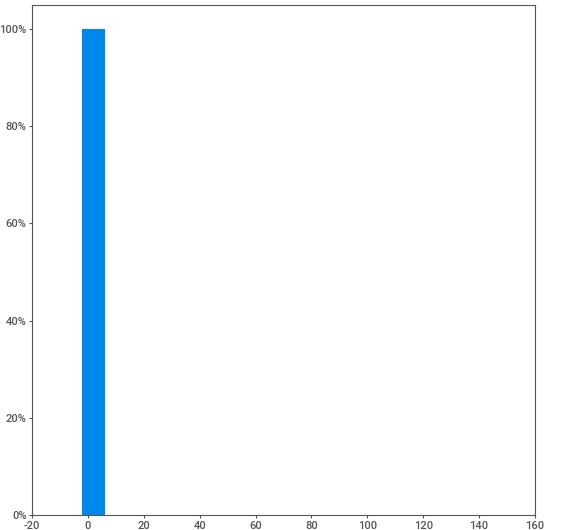
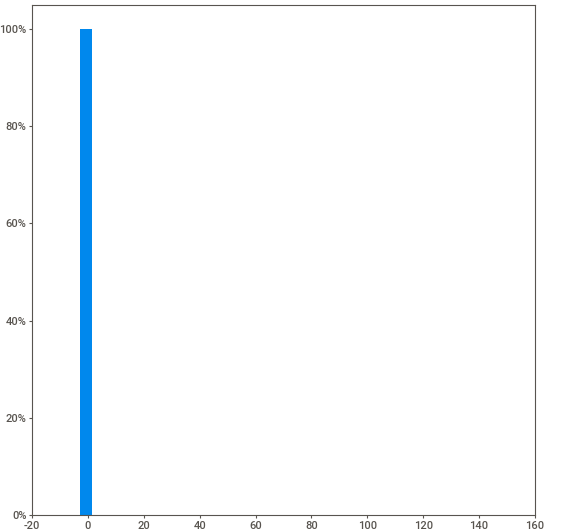
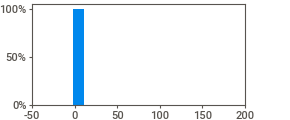
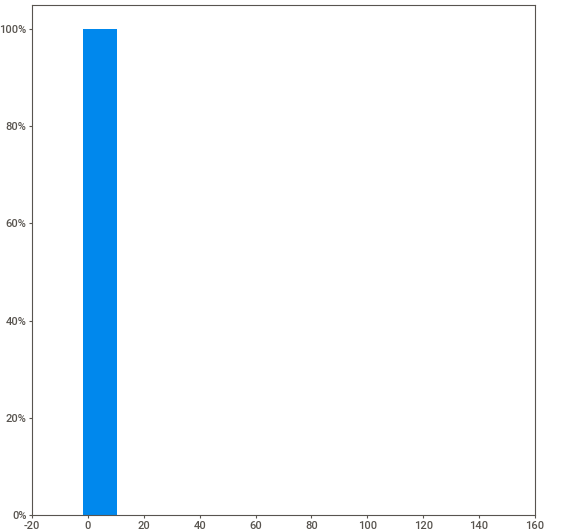
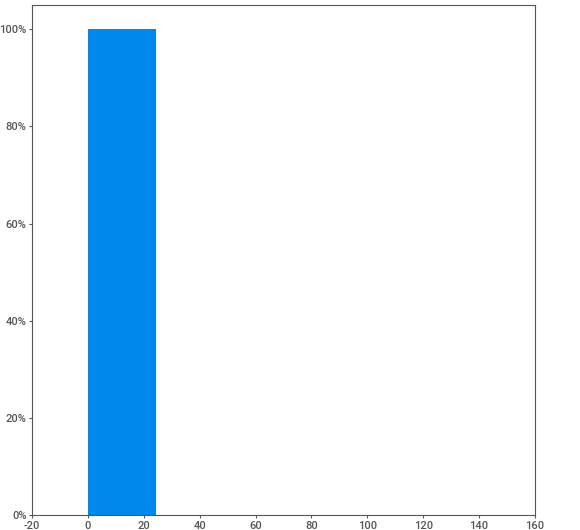
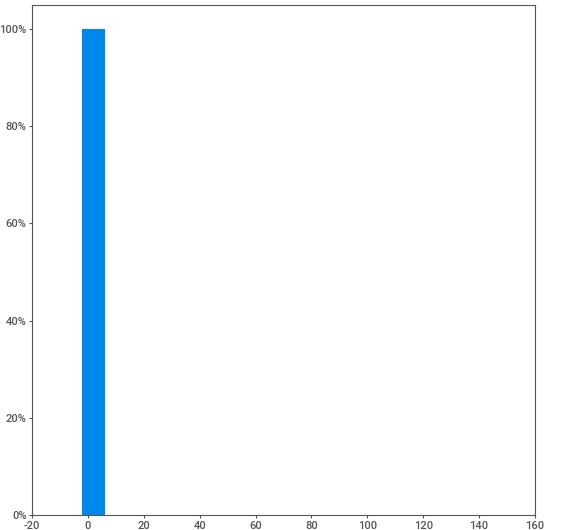
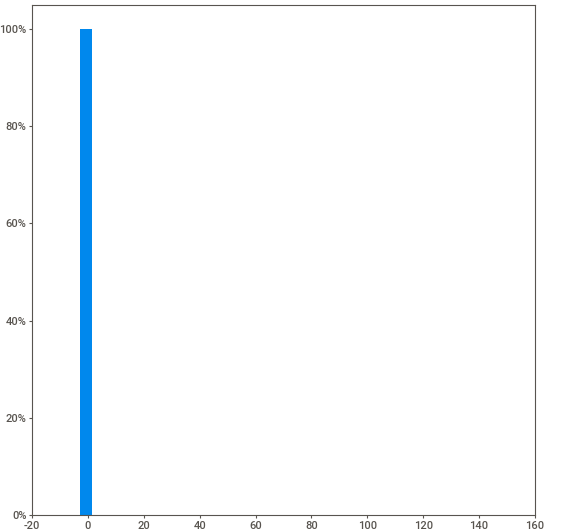
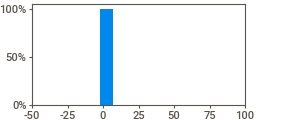
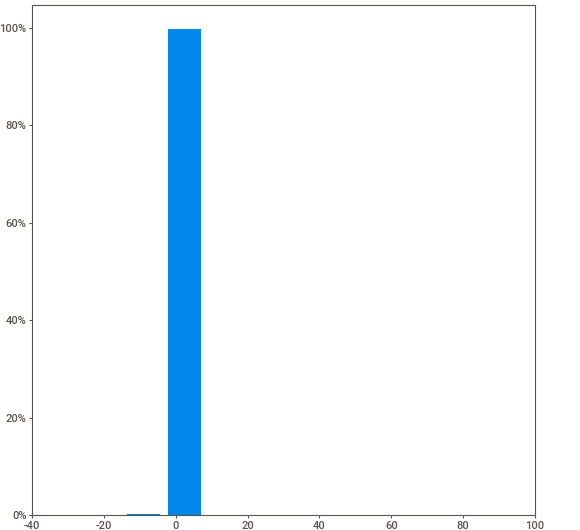
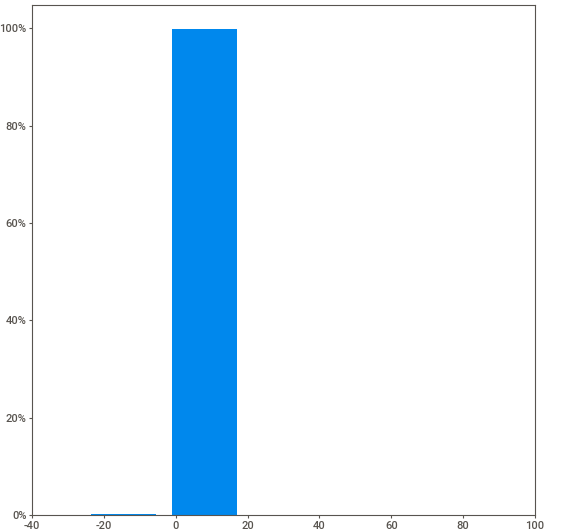
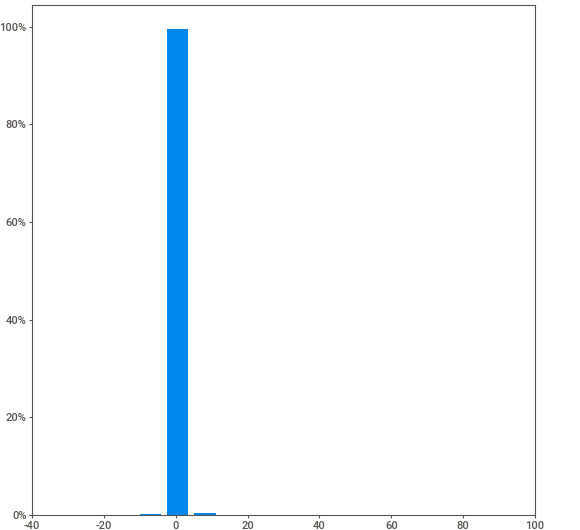
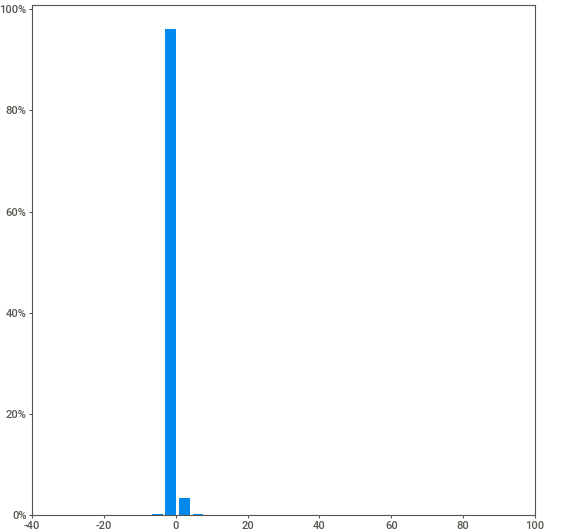
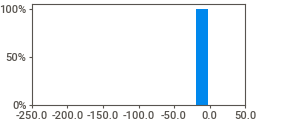
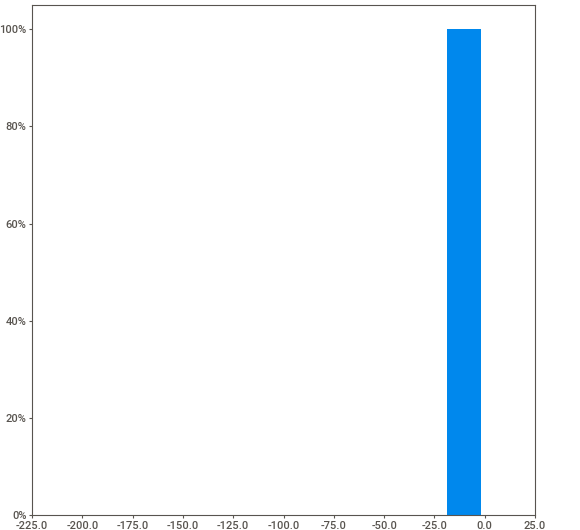
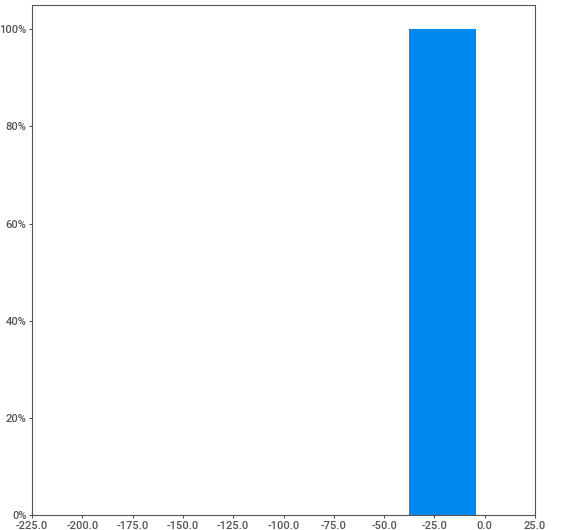
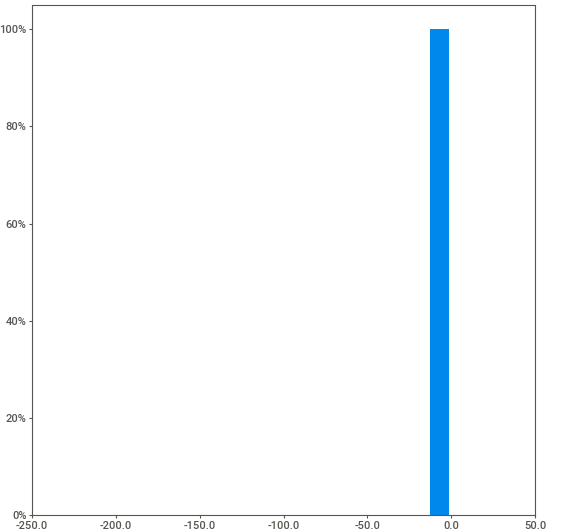
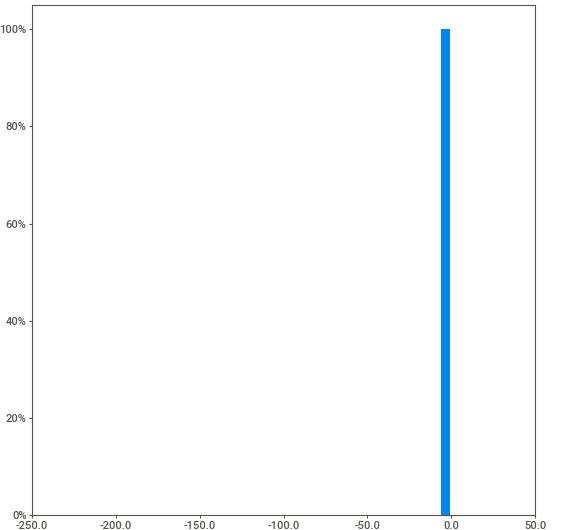
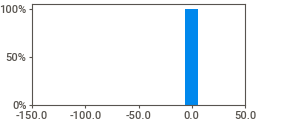
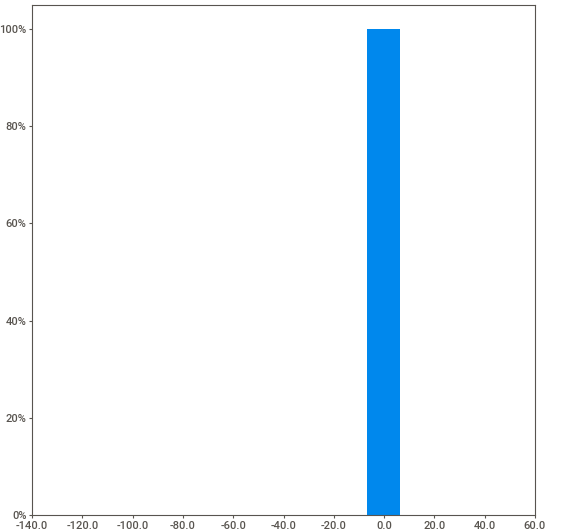
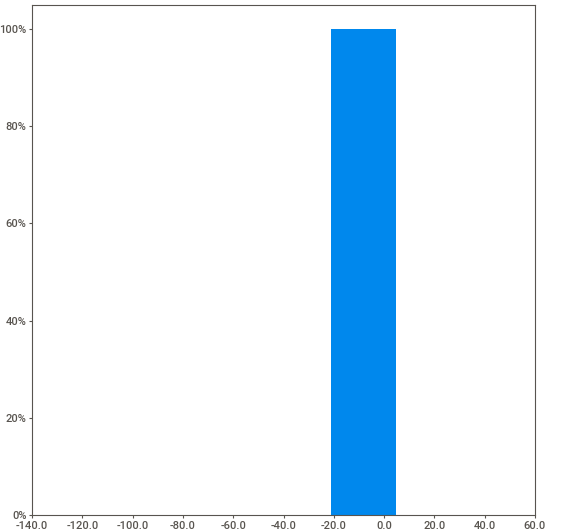
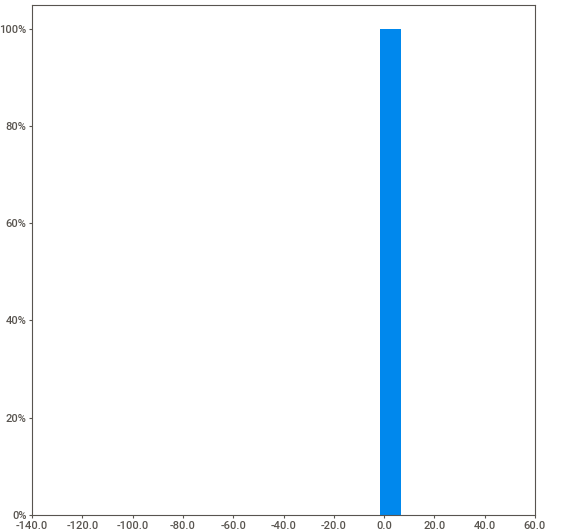
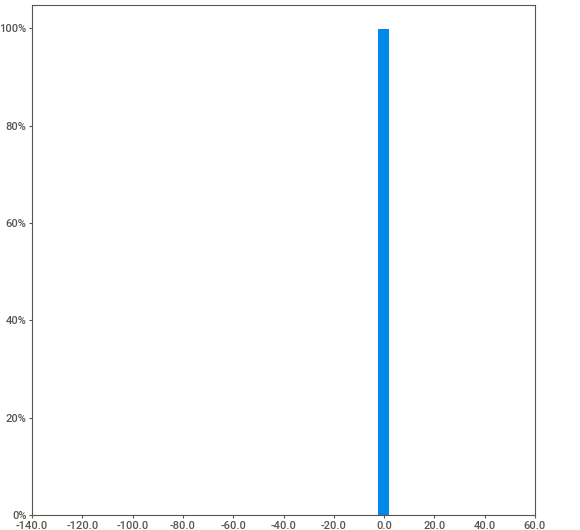
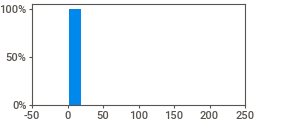
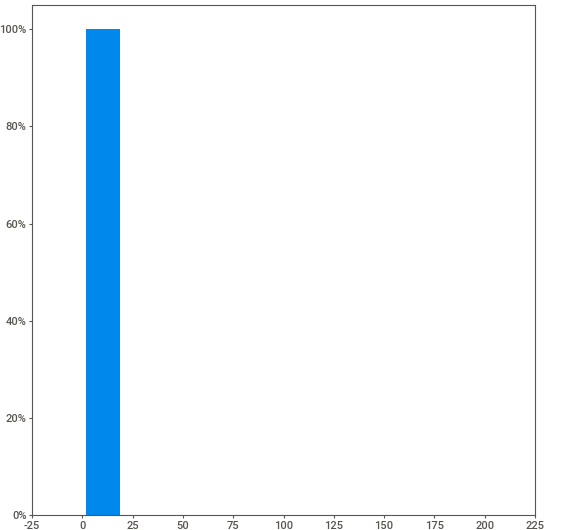
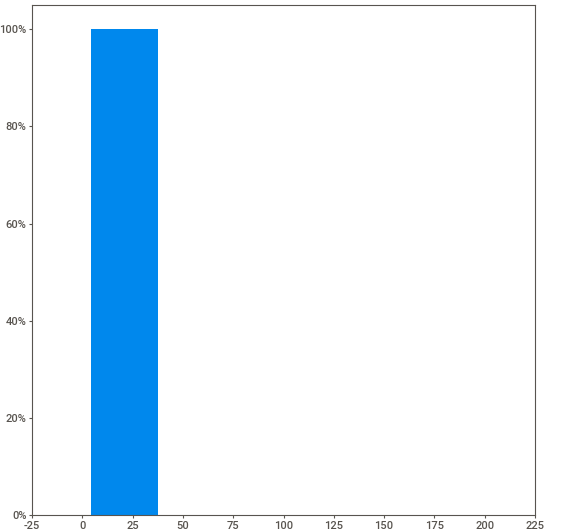
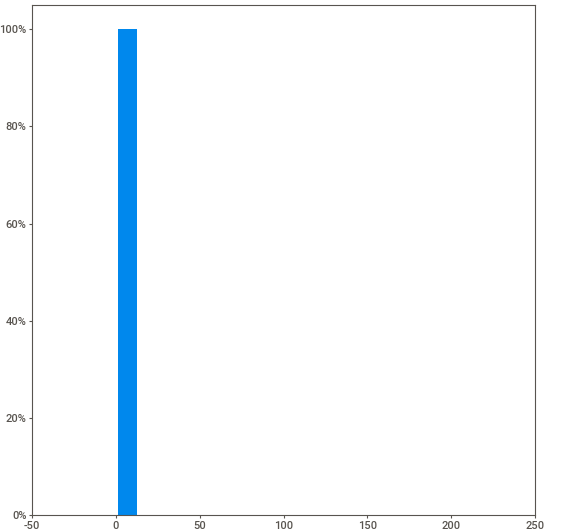
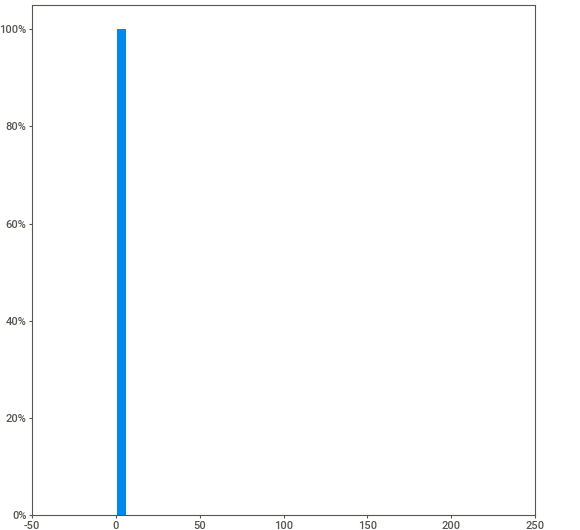
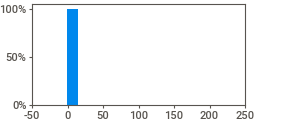
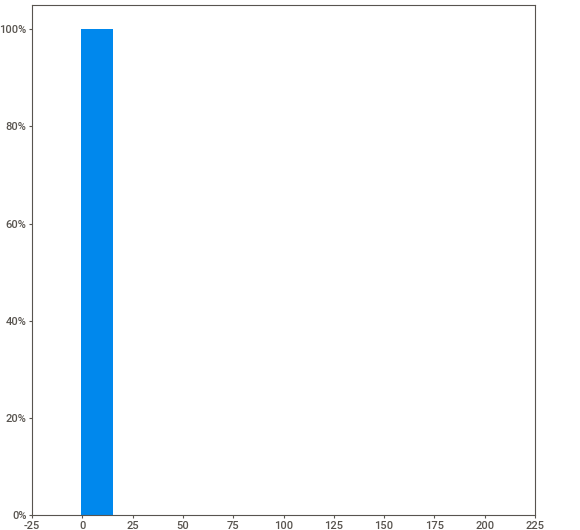
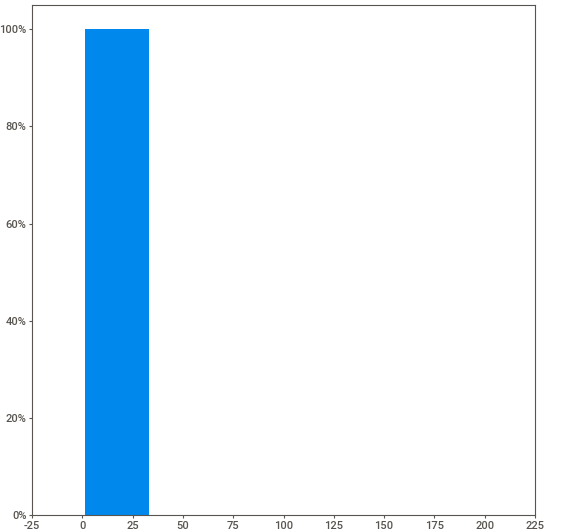
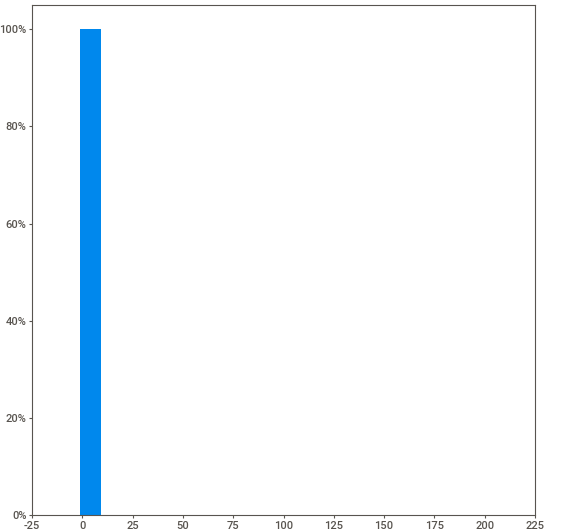
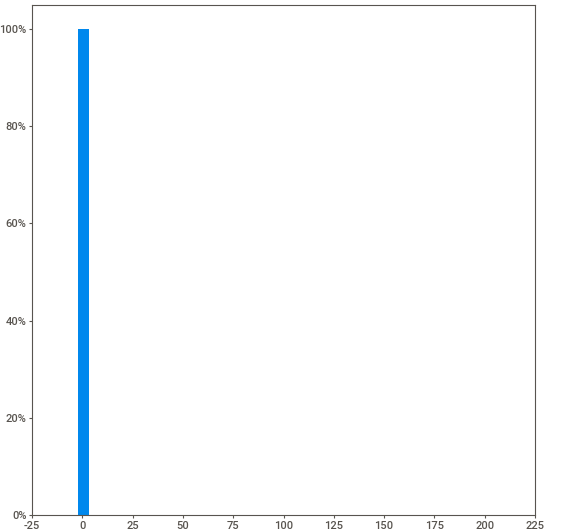
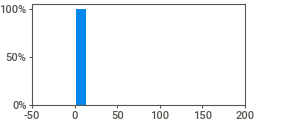
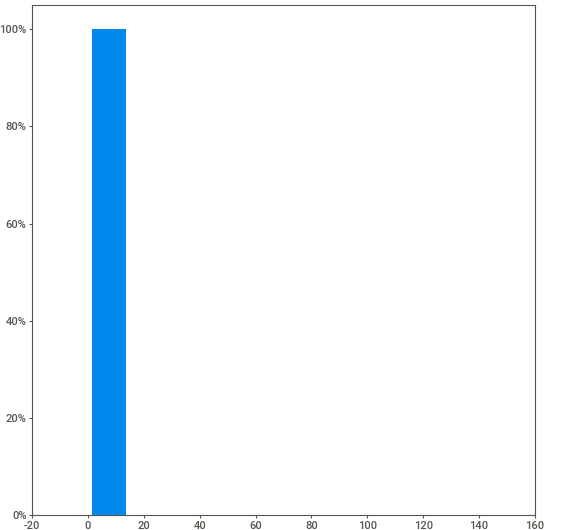
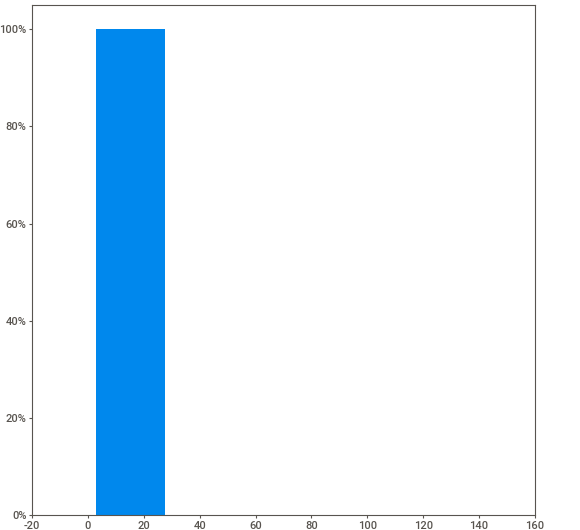
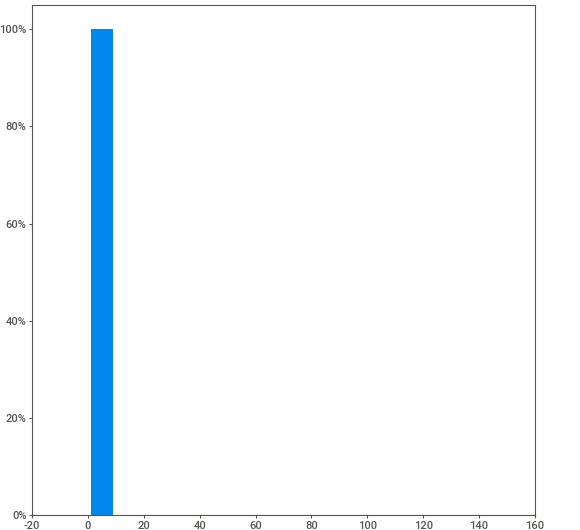
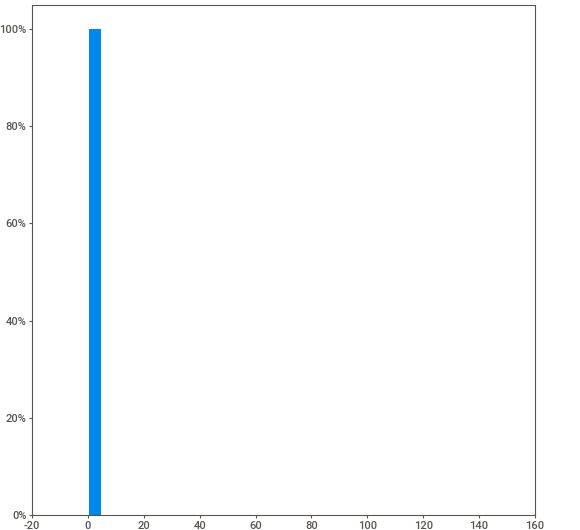
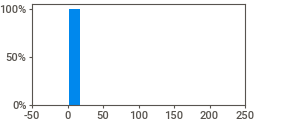
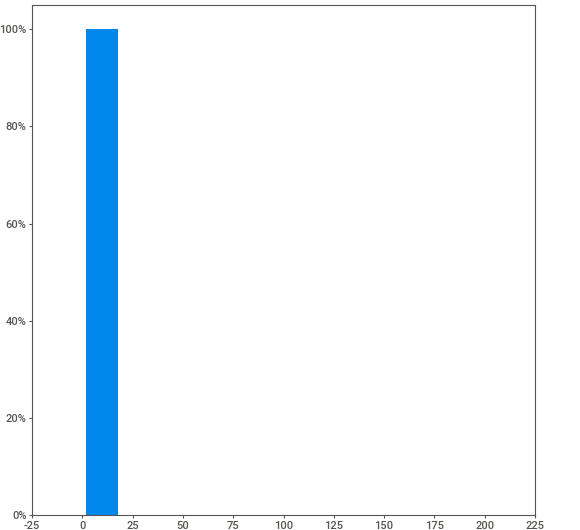
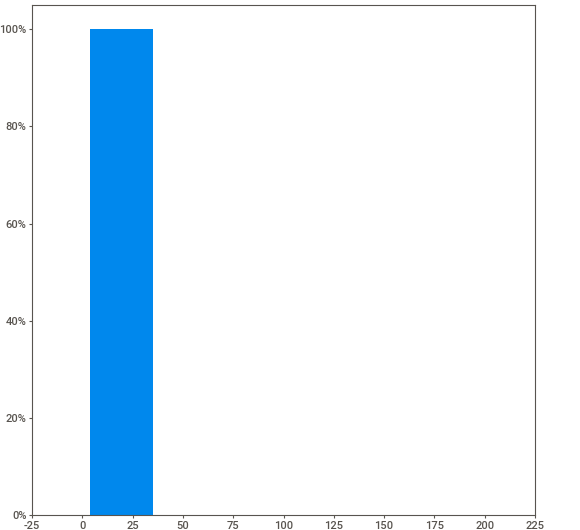
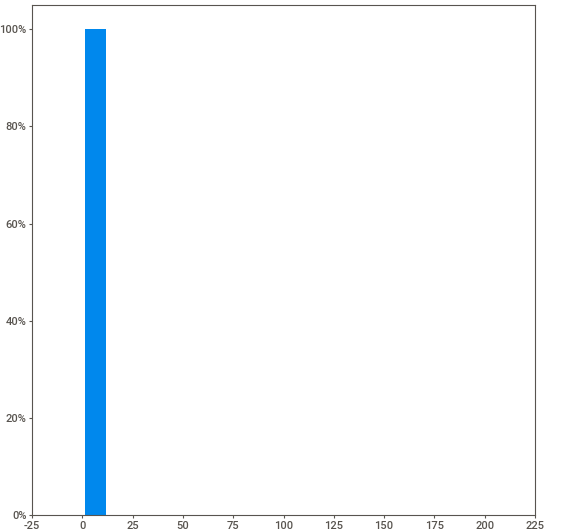
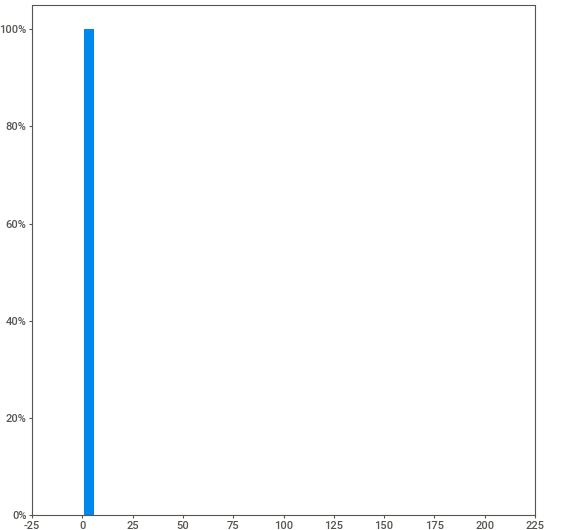
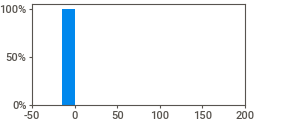
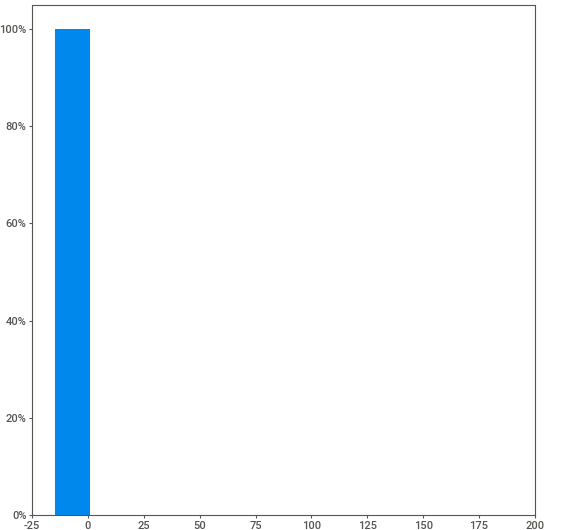
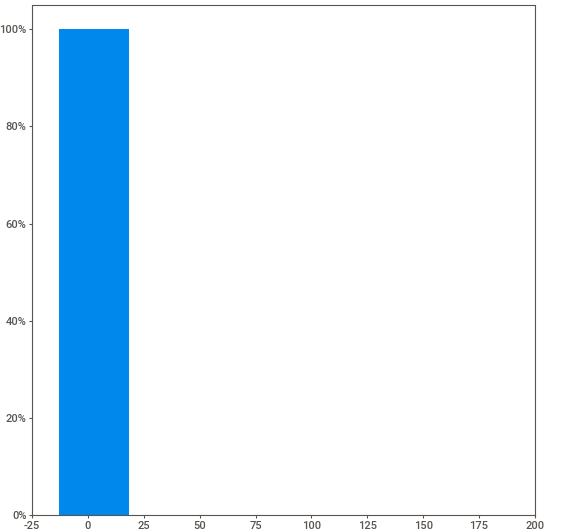
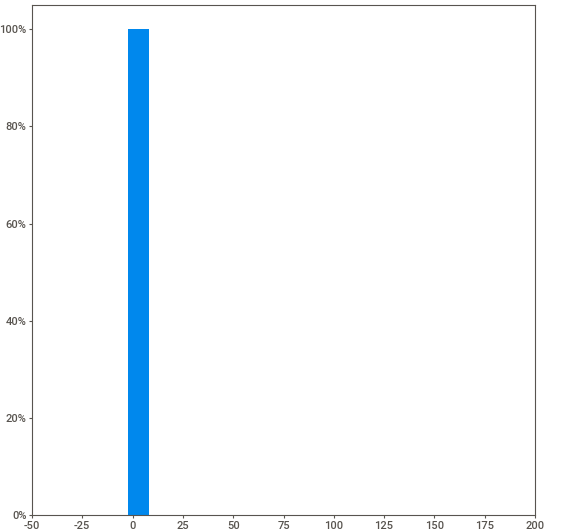
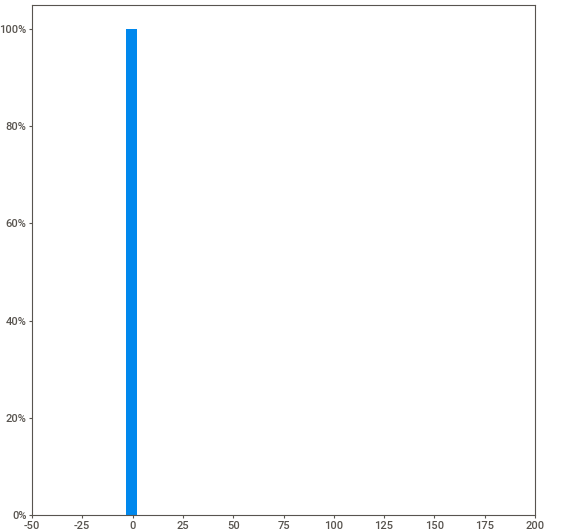
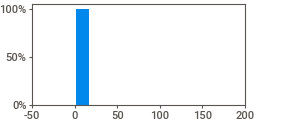
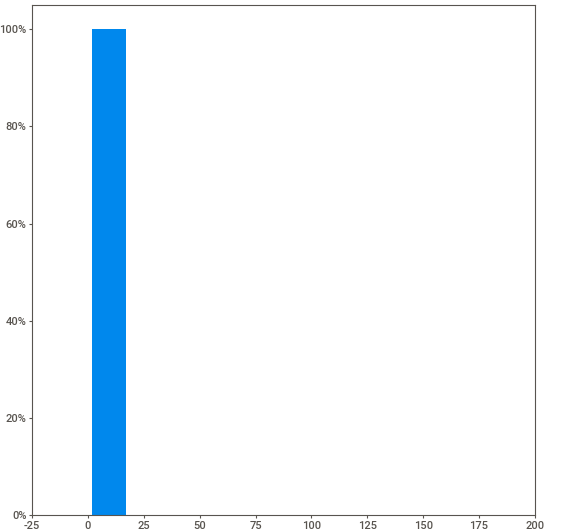
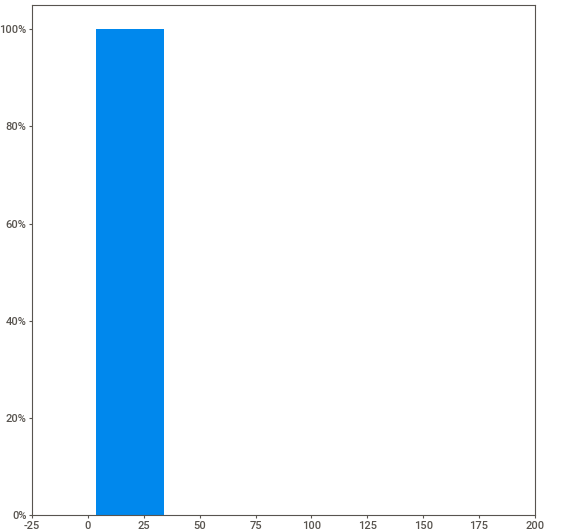
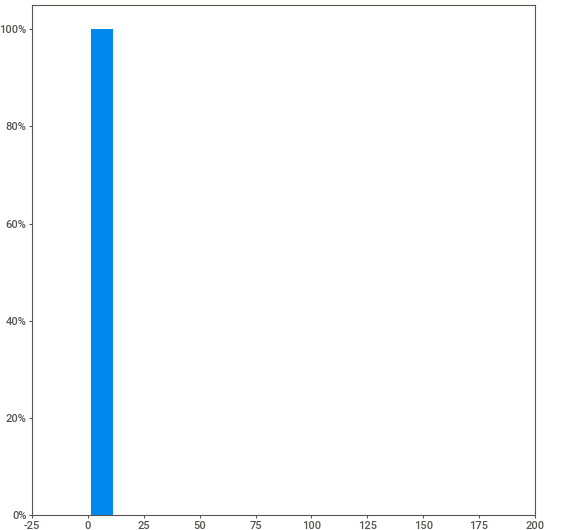
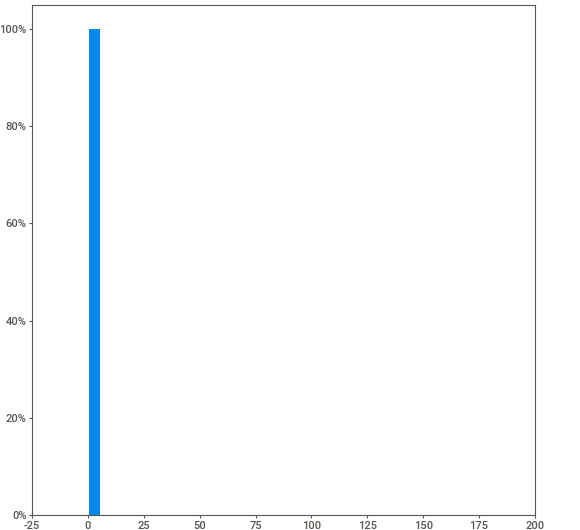
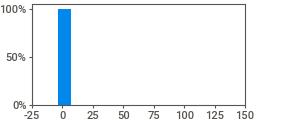
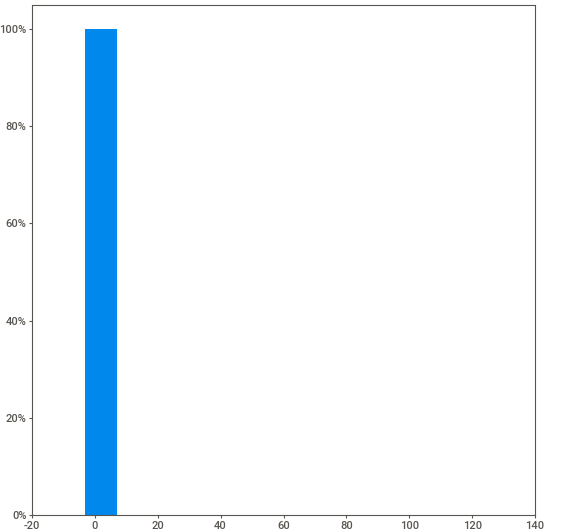
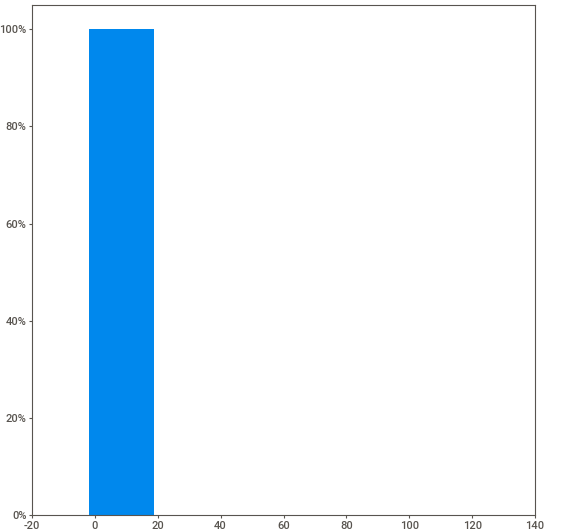
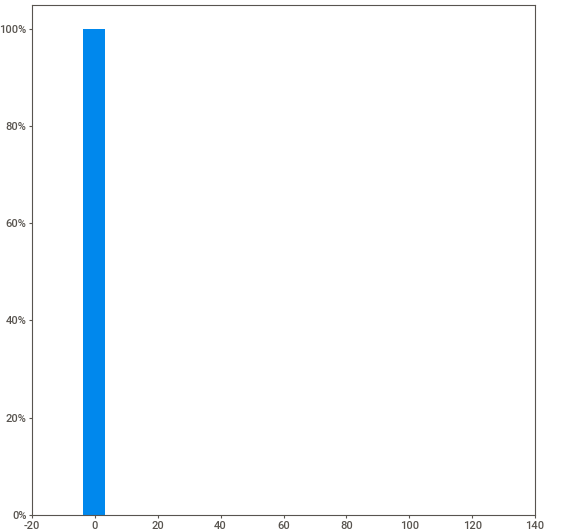
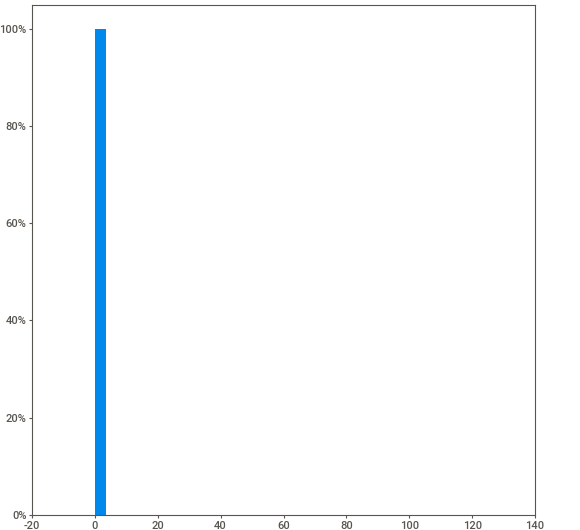
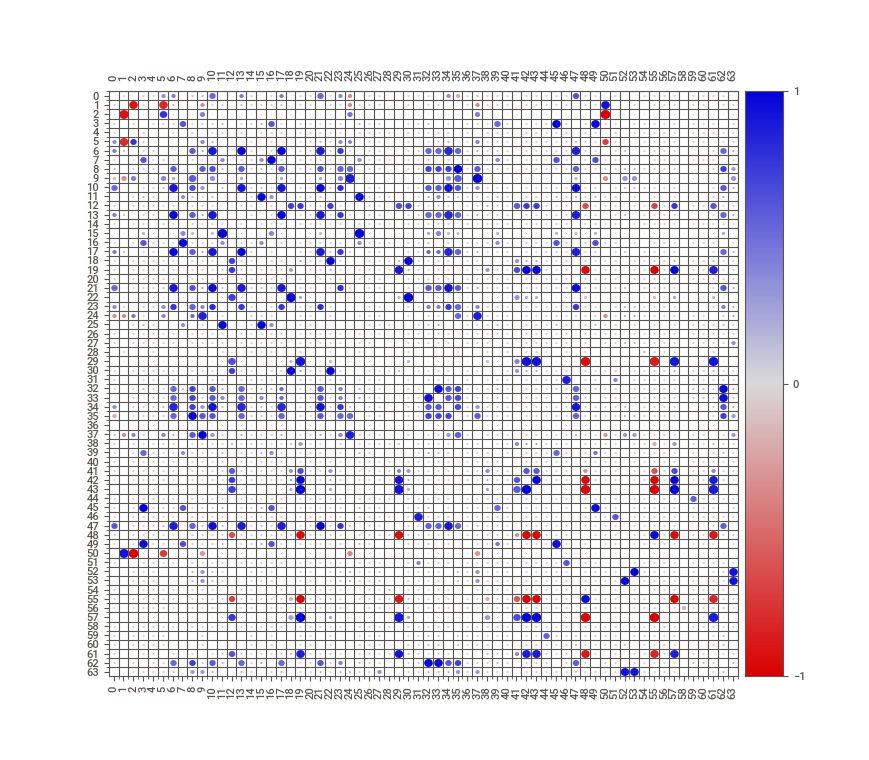
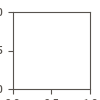

In [126]:
# Generate the report using SweetViz package, it takes a few minutes to run but provides a comprehensive report on the data
import sweetviz as sv

report = sv.analyze(X_scaled)
report.show_notebook()

## Modeling 

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, average_precision_score, make_scorer
from sklearn.exceptions import NotFittedError


In [146]:
# Define the parameter distributions to sample from (Your original code)
params = {
    'n_estimators': [500],# 'n_estimators': [50],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 3, 5, 8, 10],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_weight_fraction_leaf': [0.0, 0.1, 0.2, 0.3, 0.4],  
    'min_samples_leaf': [2, 4, 5],
    'max_features': [ 1, 2, 'sqrt', None],
}
# Create a random forest classifier (Your original code)
rf = RandomForestClassifier(random_state=42)

# Define scoring metrics (Your original code)
scoring = {
    'accuracy': make_scorer(accuracy_score), 
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'roc_auc': make_scorer(roc_auc_score),
    'average_precision': make_scorer(average_precision_score)
}

# Setup RandomizedSearchCV with try-except block
random_search = RandomizedSearchCV(
    estimator=rf, 
    param_distributions=params, 
    n_iter=10, 
    scoring=scoring,  
    refit='roc_auc',  
    n_jobs=-1, 
    cv=5, 
    random_state=42,
    error_score='raise',  # Raise error to trigger the except block
    return_train_score=True
)


In [147]:
try:
    random_search.fit(X_scaled, y)
except NotFittedError:
    print("Warning: Some hyperparameter combinations resulted in errors (e.g., min_samples_leaf < min_samples_split). These have been skipped.")

/Users/tmc/opt/anaconda3/envs/PythonData/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/tmc/opt/anaconda3/envs/PythonData/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/tmc/opt/anaconda3/envs/PythonData/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

In [148]:
# Get the best parameters for each metric
best_params_per_metric = {}
for metric in scoring:
    best_index = np.argmax(random_search.cv_results_['mean_test_' + metric])
    best_params_per_metric[metric] = random_search.cv_results_['params'][best_index]

# Display the best parameters for each metric
print("\nBest Parameters per Metric:")
for metric, params in best_params_per_metric.items():
    print(f"- {metric}: {params}")

# Create a DataFrame to store the results
results_df = pd.DataFrame(random_search.cv_results_)

# Get the mean and standard deviation of the cross-validation scores for each metric
for metric in scoring:
    mean_score = results_df['mean_test_' + metric].mean()
    std_score = results_df['std_test_' + metric].mean()
    print(f"\n{metric}: {mean_score:.4f} +/- {std_score:.4f}")


Best Parameters per Metric:
- accuracy: {'n_estimators': 50, 'min_weight_fraction_leaf': 0.0, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 8, 'criterion': 'gini'}
- precision: {'n_estimators': 50, 'min_weight_fraction_leaf': 0.0, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 8, 'criterion': 'gini'}
- recall: {'n_estimators': 50, 'min_weight_fraction_leaf': 0.0, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 8, 'criterion': 'gini'}
- roc_auc: {'n_estimators': 50, 'min_weight_fraction_leaf': 0.0, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 8, 'criterion': 'gini'}
- average_precision: {'n_estimators': 50, 'min_weight_fraction_leaf': 0.0, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 8, 'criterion': 'gini'}

accuracy: 0.9560 +/- 0.0005

precision: 0.2850 +/- 0.0197

recall: 0.0941 +/- 0.0071

roc_auc: 0.546

# Final Random Model -- taking the highest accuracy scored model from the grid search and plotting the ROC-AUC curve using cross-validation on the random forest model with the best tuned hyperparameters 

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     41314
           1       0.91      0.38      0.54      2091

    accuracy                           0.97     43405
   macro avg       0.94      0.69      0.76     43405
weighted avg       0.97      0.97      0.96     43405

Confusion Matrix:
 [[41230    84]
 [ 1286   805]]


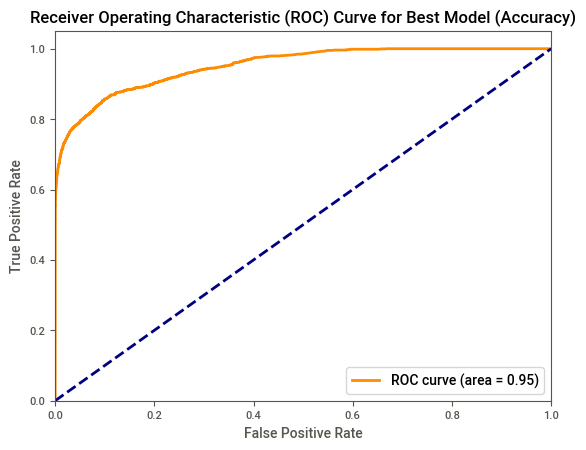

In [150]:
# Can we create a classification report/ confusion matrix from this not sure but try if not dont worry cause he didnt say anything about it. 
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


# Get the best model based on accuracy 
best_index = np.argmax(random_search.cv_results_['mean_test_accuracy'])
best_params = random_search.cv_results_['params'][best_index]

# Retrain the best model on the full training set
best_rf_model = RandomForestClassifier(**best_params, random_state=42)
best_rf_model.fit(X_scaled, y)

# Cross-validate the final model
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix

y_pred = cross_val_predict(best_rf_model, X_scaled, y, cv=5)

# Print classification report and confusion matrix
print("Classification Report:\n", classification_report(y, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y, y_pred))


# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Best Model (Accuracy)')
plt.legend(loc="lower right")
plt.show()

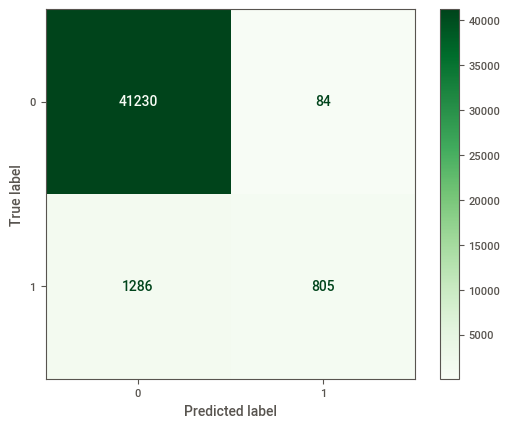

In [152]:

ConfusionMatrixDisplay.from_predictions(y, y_pred, cmap='Greens')
plt.show()

## XGBOOST Random Grid Search 
## Best model crossvalidated 50 estimators and 500 estimators for final comparison

In [71]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, average_precision_score, make_scorer
from sklearn.exceptions import NotFittedError


In [50]:
y.shape
X_scaled.shape

(43405, 64)

In [54]:
# DMatrix Required for XGBoost
dmat_data = xgb.DMatrix(X_scaled, label = y.ravel()) # convert to a 1D array so that we can select the number of classes to be 2 - hence bianaary classification
# dmat_data = xgb.DMatrix(X_scaled, label=y, num_class=2) 


In [56]:
# RandomizedSearchCV for XGBoost

params = {
    'booster': 'gbtree',
    'objective':'binary:logistic', #,'binary:hinge' this will turn to a binary 0 or 1
    # 'num_class': 2, not necessary for binary classification in XGBoost
    "eta": 0.1, # you can go as high as 0.3 and as low as 0.01 but requires more trees 
    "subsample": 0.8,
    "colsample_bytree": 0.5, # lower to prevent overfitting
    # "max_depth": 6, # you will need to increase to 1000, 6 is default, use early stopping greater than 50 
    'reg_lambda': 2, # L2 regularization term on weights, values between 1 and 3 
}

max_depth = [3,5,10,15,20,40]
sub_s = np.random.random(10)
cols = np.random.random(10)
md = np.random.randint(0,6,10)

results = []  # Store results here

for i in range(10):
    params['subsample']=sub_s[i]
    params['colsample_bytree']=cols[i]
    params['max_depth']=max_depth[md[i]]    # FIX for final model num_boost_round=1000
    tmp = xgb.cv(params, dmat_data, num_boost_round=10, nfold=5, stratified=False,metrics=(['auc']),verbose_eval=False,early_stopping_rounds=200,show_stdv=True, seed=0)
    print("_______________done_______________")
    print(params)
    print(tmp.loc[tmp.shape[0]-1:,:])
    print("=====================================")
    results.append((params.copy(), tmp.loc[tmp.shape[0]-1,:]))  # Store params and result
    tmp = 0 # for some reason if I don't zero this out it causes issues.
    
xgb.cv(params, dmat_data, num_boost_round=2000, nfold=5, stratified=False,metrics=(['auc']),verbose_eval=True,early_stopping_rounds=5,show_stdv=True, seed=0)

_______________done_______________
{'booster': 'gbtree', 'objective': 'binary:logistic', 'eta': 0.1, 'subsample': 0.5726045094068731, 'colsample_bytree': 0.8142795758435973, 'reg_lambda': 2, 'max_depth': 40}
   train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
9        0.986026       0.001492       0.934034      0.004801
_______________done_______________
{'booster': 'gbtree', 'objective': 'binary:logistic', 'eta': 0.1, 'subsample': 0.7681758783608563, 'colsample_bytree': 0.24444474667436922, 'reg_lambda': 2, 'max_depth': 15}
   train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
9        0.971714       0.002644       0.857498      0.004136
_______________done_______________
{'booster': 'gbtree', 'objective': 'binary:logistic', 'eta': 0.1, 'subsample': 0.7683539192401541, 'colsample_bytree': 0.20800709143314888, 'reg_lambda': 2, 'max_depth': 15}
   train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
9        0.970754       0.001867        0.85568      0.004519
__

train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0         0.737735       0.018013       0.689966      0.025899
1         0.812581       0.008993       0.762068      0.004378
2         0.836132       0.010130       0.777508      0.008544
3         0.855778       0.008505       0.797138      0.005816
4         0.872532       0.003744       0.807928      0.007546
5         0.886343       0.002925       0.822508      0.007296
6         0.891988       0.002232       0.826329      0.007576
7         0.897601       0.001844       0.830289      0.004189
8         0.899956       0.001885       0.829259      0.003942
9         0.903173       0.001949       0.830332      0.002764
10        0.909598       0.002335       0.836598      0.005762
11        0.914023       0.001804       0.838840      0.006906
12        0.918958       0.002698       0.842468      0.007628
13        0.923106       0.003132       0.845933      0.008915
14        0.924264       0.003606       0.845652      0.009880
15        0.925775       0.003587       0.844300      0.010835
16        0.944618       0.002273       0.877672      0.007328
17        0.946547       0.002078       0.877973      0.007307
18        0.948138       0.001921       0.879263      0.007422
19        0.950630       0.002049       0.880560      0.007974
20        0.952196       0.001668       0.881081      0.007580
21        0.953261       0.001709       0.880373      0.007818
22        0.959810       0.001912       0.893337      0.007584
23        0.961699       0.001767       0.895506      0.007048

In [60]:
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_auc_score, make_scorer, roc_curve, auc
from sklearn.model_selection import RandomizedSearchCV, cross_val_predict
from sklearn.exceptions import NotFittedError

# Define the parameter distributions to sample from
params = {
    'booster': 'gbtree',
    'objective': 'binary:logistic', 
    "eta": 0.1, 
    "subsample": 0.8,
    "colsample_bytree": 0.5, 
    'reg_lambda': 2, 
}
max_depth = [3, 5, 10, 15, 20, 40]
sub_s = np.random.random(10)
cols = np.random.random(10)
md = np.random.randint(0, 6, 10)

results = []  # Store results here

for i in range(10):
    params['subsample'] = sub_s[i]
    params['colsample_bytree'] = cols[i]
    params['max_depth'] = max_depth[md[i]]
    
    # Perform cross-validation with 'error' metric
    cv_results = xgb.cv(
        params, 
        dmat_data, 
        num_boost_round=10, 
        nfold=5, 
        stratified=True,
        metrics=['error', 'auc'],  # Add 'error' metric
        early_stopping_rounds=200, 
        seed=0
    )

    print("_______________done_______________")
    print(params)
    print(cv_results.tail(1))
    print("=====================================")
    results.append((params.copy(), cv_results.tail(1)))

# Find best parameters and corresponding results based on accuracy
best_params, best_cv_result = min(results, key=lambda x: x[1]['test-error-mean'].iloc[-1]) 
best_auc = best_cv_result['test-auc-mean'].iloc[-1]
best_accuracy = 1 - best_cv_result['test-error-mean'].iloc[-1]

print(f"Best parameters: {best_params}")
print(f"Best accuracy: {best_accuracy:.4f}")

# Train the best model
best_xgb_model = xgb.train(best_params, dmat_data, num_boost_round=10)  # Use num_boost_round from CV


_______________done_______________
{'booster': 'gbtree', 'objective': 'binary:logistic', 'eta': 0.1, 'subsample': 0.5488135039273248, 'colsample_bytree': 0.7917250380826646, 'reg_lambda': 2, 'max_depth': 10}
   train-error-mean  train-error-std  train-auc-mean  train-auc-std  \
9           0.03158         0.000337        0.975502       0.002133   

   test-error-mean  test-error-std  test-auc-mean  test-auc-std  
9         0.033683        0.001118       0.930423      0.006639  
_______________done_______________
{'booster': 'gbtree', 'objective': 'binary:logistic', 'eta': 0.1, 'subsample': 0.7151893663724195, 'colsample_bytree': 0.5288949197529045, 'reg_lambda': 2, 'max_depth': 15}
   train-error-mean  train-error-std  train-auc-mean  train-auc-std  \
9          0.035255         0.000337        0.988166       0.002144   

   test-error-mean  test-error-std  test-auc-mean  test-auc-std  
9         0.042438        0.000464       0.929139      0.007335  
_______________done_______________

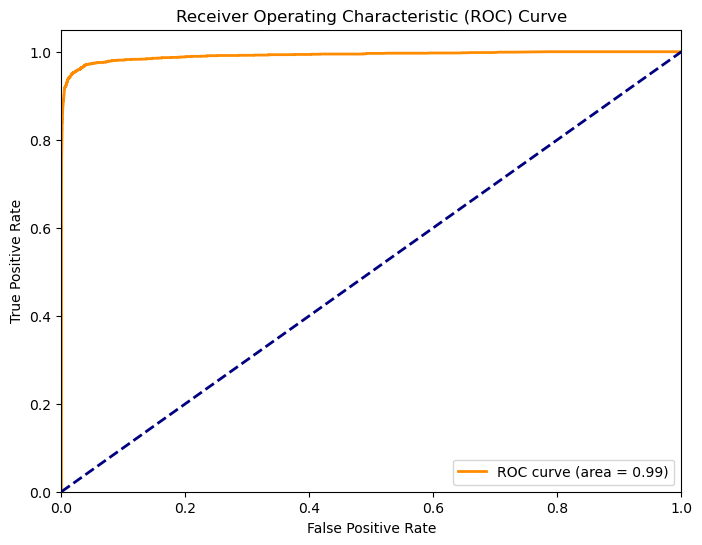

In [69]:
# Predict probabilities for the positive class
y_pred_proba = best_xgb_model.predict(dmat_data)  # Use dmat_data for predictions

# Get true labels from DMatrix
y_true = dmat_data.get_label()

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# NEED TO FIGURE OUT how to run get classification report confusion matrix. 

# after we need to go back and pump up the iterations for the final runs and let them run for a while.

In [73]:
# Cross-validation on the best model to get predictions
y_pred = cross_val_predict(best_xgb_model, X_scaled, y, cv=5)

# Classification report
print("Classification Report:\n", classification_report(y, y_pred))

# Confusion matrix
cm = confusion_matrix(y, y_pred)
print("Confusion Matrix:\n", cm)

# Display the confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_xgb_model.classes_)
disp.plot(cmap='Greens')  # You can change the colormap if desired
plt.show()




# Print classification report and confusion matrix
# print("Classification Report:\n", classification_report(y, y_pred))
# print("Confusion Matrix:\n", confusion_matrix(y, y_pred))
# ConfusionMatrixDisplay.from_predictions(y, y_pred, cmap='Greens')
# plt.show()


InvalidParameterError: The 'estimator' parameter of cross_val_predict must be an object implementing 'fit' and 'predict'. Got <xgboost.core.Booster object at 0x169189210> instead.

In [ ]:
# # RANDOM SEARCH CV ON XGBOOST MODEL
# dmat_data = xgb.DMatrix(X_scaled, label = y)

# params = {
#     'booster': 'gbtree',
#     'objective':'binary:logistic', #,'binary:hinge' this will turn to a binary 0 or 1
#     'num_class': 2,
#     "eta": 0.1, # you can go as high as 0.3 and as low as 0.01 but requires more trees 
#     "subsample": 0.8,
#     "colsample_bytree": 0.5, # lower to prevent overfitting
#     # "max_depth": 6, # you will need to increase to 1000, 6 is default, use early stopping greater than 50 
#     'reg_lambda': 2, # L2 regularization term on weights, values between 1 and 3 
# }
# max_depth = [3,5,10,15,20,40]
# sub_s = np.random.random(10)
# cols = np.random.random(10)
# md = np.random.randint(0,6,10)
# for i in range(10):
#     params['subsample']=sub_s[i]
#     params['colsample_bytree']=cols[i]
#     params['max_depth']=max_depth[md[i]]    # FIX for final model num_boost_round=1000
#     tmp = xgb.cv(params, dmat_data, num_boost_round=10, nfold=5, stratified=False,metrics=(['auc']),verbose_eval=False,early_stopping_rounds=200,show_stdv=True, seed=0)
#     print("_______________done_______________")
#     print(params)
#     print(tmp.loc[tmp.shape[0]-1:,:])
#     print("=====================================")
#     tmp = 0 # for some reason if I don't zero this out it causes issues.
    
# xgb.cv(params, dmat_data, num_boost_round=2000, nfold=5, stratified=False,metrics=(['auc']),verbose_eval=True,early_stopping_rounds=5,show_stdv=True, seed=0)

In [ ]:
# import copy 
# from sklearn.model_selection import KFold
# flds = KFold(n_splits=5, shuffle=True, random_state=42)

# params = {
#     'booster': 'gbtree',
#     'objective': 'multi:softmax',
#     'num_class': 10,
#     'eta': 0.1,
#     'subsample': 0.8,
#     'colsample_bytree': 0.8,
#     'max_depth': 5,
# }

# results = []
# hyper = []
# max_depth = [3, 5]
# sub_s = [0.5, 1]
# cols = [0.9, 1]
# best = 1E6
# best_p = []
# scores = []


# # Model 
# my_model = xgb.train(param, dtrain, num_round, evallist, early_stopping_rounds = 2)
# # Cross Validation 
# out = xgb.train(params=params, dmat_data=dmat_data, num_boost_round=100, early_stopping_rounds = 5)
# out.tail(10)


In [ ]:
# my_model.predict(dmat_data)
# from sklearn.metrics import accuracy_score
# accuracy_score(my_model.predict(dtest),y_test)

In [ ]:

# for d in max_depth: 
#     for s in sub_s: 
#         for c in cols: 
#             params['subsample']=s
#             params['colsample_bytree']=c
#             params['max_depth']=d
#             tmp = xgb.cv(params, dtrain, num_boost_round=100, nfold=5, metrics='merror', early_stopping_rounds=10, as_pandas=True, seed=42)
#             print('_______Done________')
#             print(params)
#             print(tmp.loc[tmp.shape[0]-1:,:])
#             results.append(tmp.loc[tmp.shape[0]-1:,:])
#             hyper.append(params)
#             if tmp.iloc[tmp.shape[0]-1:,2].values < best:
#                 best = tmp.iloc[tmp.shape[0]-1:,2].values
#                 best_p = copy.deepcopy(params)
#             print('_______________')
#             tmp=0

# X_scaled 
# y



# Next XGBOOST 
# Results/Conclustion 
# Github push
# Submit 
# Done
# Capstone Work due ASAP 

In [ ]:






# # Define the parameter distributions to sample from
# params = {
#     'n_estimators': 100,  # Number of trees in the forest
#     'criterion': ['gini', 'entropy'],  # disorder in the data 
#     'max_depth': [None, 3, 5, 8, 10],  # Maximum depth of each tree
#     'min_samples_split': np.linspace(0.1, 2.0, 10, dtype=float),  # 2 through 10 linspace
#     'min_samples_leaf': np.linspace(0.1, 0.5, 5, dtype=float),  # Minimum samples required to be at a leaf node
#     'max_features': ['auto', 'sqrt', 8, 10 ],  # Number of features to consider when looking for the best split
#     'criterion': ['gini', 'entropy']  # Function to measure the quality of a split
# }
# # Create a random forest classifier
# rf = RandomForestClassifier(random_state=42)

# scoring = {
#     'accuracy': make_scorer(accuracy_score), # stakeholder requested accuracy and ROC-AUC as most important but wants to record all metrics , greatest value for accuracy is best 
#     'precision': make_scorer(precision_score, average='macro'),  # Assuming multi-class classification
#     'recall': make_scorer(recall_score),
#     'roc_auc': make_scorer(roc_auc_score), # the closest to the corner and smoother the better 
#     'average_precision': make_scorer(average_precision_score)
# }


# # Setup RandomizedSearchCV
# # random_search = RandomizedSearchCV(
# #     estimator=rf, param_distributions=param_dist, n_iter=10, scoring='accuracy', n_jobs=-1, cv=5, random_state=42
# # )
# # Setup RandomizedSearchCV (updated with 'refit' to get the best model)
# random_search = RandomizedSearchCV(
#     estimator=rf, # our model
#     param_distributions=params, # our params to search over
#     n_iter=20, # number of iterations
#     scoring=scoring,  # Use multiple scoring metrics
#     refit='roc_auc',  # Choose which metric to optimize for (in this case, ROC-AUC)
#     n_jobs=-1, # use all my processors
#     cv=5, # we use five fold cross validation 
#     random_state=42 # random state so my friends can duplicate results 
# )

# # Fit the random search to the data
# random_search.fit(X_scaled, y)


In [ ]:


# # Get the best model
# best_rf_model = random_search.best_estimator_

# # Perform cross-validation with the best model to get multiple metric scores
# cv_results = cross_validate(best_rf_model, X_scaled, y, cv=5, scoring=scoring)

# # Print results (mean and standard deviation for each metric)
# for metric_name in scoring:
#     scores = cv_results['test_' + metric_name]
#     print(f"{metric_name}: {np.mean(scores):.2f} +/- {np.std(scores):.2f}")

# # (Optional) You can access individual scores for each fold if needed
# print("Detailed Results:")
# for metric_name in scoring:
#     print(f"{metric_name} Scores:", cv_results['test_' + metric_name])




# # # we dont want the bias so we want to get the outerfold predictions 
# # from sklearn.model_selection import cross_val_score
# # cross_val_score[rf_model, iris_data, y, cv=5] # 5 fold cross validation
# # for i in [1, 5,10,20,50,100]:
# #     rf_model = n_estimators = i
# #     print(i, cross_val_score(rf_model, iris_data, y, cv=5, scoring='accuracy'))

In [ ]:
# Random Forest Classifier 
# randomizedgridsearchcv
# collect accuracy and auc scores for each model
# collect feature importance for each model
# collect confusion matrix for each model
# collect classification report for each model
# collect roc curve for each model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
cross_val_score(rf,X_train,y_train,scoring='accuracy')
params = {
    'objective':'multi:softmax',
    'num_class':10,
    "eta": 0.05,
    "subsample": 0.5,
    "colsample_bytree": 0.5,
    "max_depth": 3,
}
max_depth = [3,5,10,15,20,40]
sub_s = np.random.random(10)
cols = np.random.random(10)
md = np.random.randint(0,6,10)
for i in range(10):
    params['subsample']=sub_s[i]
    params['colsample_bytree']=cols[i]
    params['max_depth']=max_depth[md[i]]
    tmp = xgb.cv(params, dtrain, num_boost_round=2000, nfold=5, stratified=False,metrics=(['mlogloss']),verbose_eval=False,early_stopping_rounds=5,show_stdv=True, seed=0)
    print("_______________done_______________")
    print(params)
    print(tmp.loc[tmp.shape[0]-1:,:])
    print("=====================================")
    tmp = 0 # for some reason if I don't zero this out it causes issues.


In [ ]:
# XGBOOST
# randomizedgridsearchcv
# collect accuracy and auc scores for each model
# collect feature importance for each model
# collect confusion matrix for each model
# collect classification report for each model
# collect roc curve for each model
import xgboost as xgb
dtest = xgb.DMatrix(X_test, label=y_test)
num_round = 100
param = {
    'max_depth':5,
    'objective':'multi:softmax',
    'num_class':10,
    'eta': 0.1
}
my_model = xgb.train(param, dtrain, num_round, evallist, early_stopping_rounds = 5)
xgb.cv(params=param, dtrain=dtrain, num_boost_round = 10, nfold=5, verbose_eval=True, early_stopping_rounds=2)
out = xgb.cv(params=param, dtrain=dtrain, num_boost_round = 700, nfold=5, verbose_eval=True, early_stopping_rounds=2)

In [ ]:
# compare results did we beat the scores
# record hyperaparamters 
# Compare curves and classification reports in final results / conclusion table 

In [ ]:
# what is target 
# RandomForestClassifier 
# when doing search keep 
# n_estimators = more is better use 50 or 100 not hyperparamter number of trees -- boost on final fit at 500 dont search for it 
# 8 HYPERPARAMTERS TO SERACH -- CRIRETION, MAX_DEPTH, MIN_SAMPLES_SPLIT, MIN_SAMPLES_LEAF, MAX_FEATURES, MAX_LEAF_NODES, MIN_IMPURITY_DECREASE
# USE RANDOM SEARCH - TRADING ACCURACY FOR SPEED
# USE RANDOIMIZED SEARCH CV
# MODEL IS YOUR estimator 
# param_distributions is the hyperparamters you want to search
# n_iter 20 
# best for AUC and ACCURACY
# greateset value for accuracy is the best 
# set multiple job use -1 not a hyperparamter 
# 5folds or randomized splitter
# scoring = 'roc_auc' or 'accuracy'
# max_depth 3-10 none dont really see overfitting in RF 
# min_samples_split 2-10 do a try and except this can be 2 or 3
# min_sample_leaf (has to be smaller than min_samples_split)--  canb be 1 you need to use a try and except and skip over
# max_weigh_fraction_Leaf = analogoes to information gain, max_features - you can pick 5 8 10 10 sqrt is default and see which one is better -- grid search where you find a reasonable number 
# min_impurity_decrease - dont worry about it 
# no bagging nkot required. 
# random_state should be set 
# random forest (1)
# beat it with XGB boost to tune against 
# XGB boost (2)
# List Best AUC , ACCRUACY show ROC / AUC curve
# show feature importance
# classification report 
# confusion matrix
# randomized search where you playh with n-iter 10 then crank up 
# max_features - experiemnt 
# max_features - 
class sklearn.ensemble.RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None, monotonic_cst=None)[source]





# ROC CUrve 


import matplotlib.pyplot as plt

from sklearn.metrics import RocCurveDisplay

fig, [ax_roc, ax_det] = plt.subplots(1, 2, figsize=(11, 5))

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)

    RocCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax_roc, name=name)
  

ax_roc.set_title("Receiver Operating Characteristic (ROC) curves")
ax_det.set_title("Detection Error Tradeoff (DET) curves")

ax_roc.grid(linestyle="--")
ax_det.grid(linestyle="--")

plt.legend()
plt.show()


# Dont run AUC or ROC score on predictions, you run on probabilities - use predict_proba if you not it will be wrong!! 

# look for a curve can be jagged should be smoother closer to 1 .945 or better is what you should be scoring 


# true positive rate / false positive weigtht
# 